# Credit Card Default

1. [Data Description](#1.-Data-Description)
2. [Importing Packages](#2.-Importing-Packages)
3. [Importing Dataset](#3.-Importing-Dataset)
4. [Exploratory Data Analysis (EDA)](#4.-Exploratory-Data-Analysis-(EDA))
    - [4.1 Data Exploration](#4.1-Data-Exploration)
        - [Categorical Variables](#Categorical-Variables)
        - [Numerical Variables](#Numerical-Variables)
    - [4.2 Data Cleaning](#4.2-Data-Cleaning)
5. [Data Manipulation](#5.-Data-Manipulation)
    - [5.1 Feature Engineering](#5.1-Feature-Engineering)
        - [Spearman Correlation of Engineered Features](#Spearman-Correlation-of-Engineered-Features)
6. [Machine Learning Algorithms](#6.-Machine-Learning-Algorithms)
    - [6.1 Setting Dataset](#6.1-Setting-Dataset)
        - [6.1.1 Unadjusted Dataset](#6.1.1-Unadjusted-Dataset)
            - [PCA - Unadjusted Dataset](#PCA---Unadjusted-Dataset)
        - [6.1.2 Adjusted Dataset](#6.1.2-Adjusted-Dataset)
            - [df_adj5 (50% Target = 1, 100% Target = 0)](#df_adj5-(50%-Target-=-1,-100%-Target-=-0))
            - [df_adj2 (20% Target = 1, 100% Target = 0)](#df_adj2-(20%-Target-=-1,-100%-Target-=-0))
    - [6.2 Decision Tree](#6.2-Decision-Tree)
        - [6.2.1 Blind Run](#6.2.1-Blind-Run)
        - [6.2.2 Cross validating](#6.2.2-Cross-validating)
        - [6.2.3 GridSearch using Accuracy](#6.2.3-GridSearch-using-Accuracy)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
        - [6.2.4 GridSearch using F1 Score](#6.2.4-GridSearch-using-F1-Score)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
            - [Exploring Statistical Distribution between the Classes](#Exploring-Statistical-Distribution-between-the-Classes)
    - [6.3 Random Forest](#6.3-Random-Forest)
        - [6.3.1 Blind Run](#6.3.1-Blind-Run)
        - [6.3.2 Cross Validating](#6.3.2-Cross-Validating)
        - [6.3.3 GridSearch using Accuracy](#6.3.3-GridSearch-using-Accuracy)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
        - [6.3.4 GridSearch using F1 Score](#6.3.4-GridSearch-using-F1-Score)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
            - [Exploring Statistical Distribution between the Classes](#Exploring-Statistical-Distribution-between-the-Classes)
    - [6.4 Gradient Boosting](#6.4-Gradient-Boosting)
        - [6.4.1 Blind Run](#6.4.1-Blind-Run)
        - [6.4.2 Cross Validating](#6.4.2-Cross-Validating)
        - [6.4.3 GridSearch using Accuracy](#6.4.3-GridSearch-using-Accuracy)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
        - [6.4.4 GridSearch using F1 Score](#6.4.4-GridSearch-using-F1-Score)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
            - [Exploring Statistical Distribution between the Classes](#Exploring-Statistical-Distribution-between-the-Classes)
    - [6.5 XGB](#6.5-XGB)
        - [6.5.1 Blind Run](#6.5.1-Blind-Run)
        - [6.5.2 Cross Validating](#6.5.2-Cross-Validating)
        - [6.5.3 GridSearch using Accuracy](#6.5.3-GridSearch-using-Accuracy)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
        - [6.5.4 GridSearch using F1 Score](#6.5.4-GridSearch-using-F1-Score)
            - [Checking Feature Importance & Mutual Info](#Checking-Feature-Importance-&-Mutual-Info)
            - [Exploring Statistical Distribution between the Classes](#Exploring-Statistical-Distribution-between-the-Classes)

## 1. Data Description

### Variables
There are 25 variables:

* ID: ID of each client
* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* SEX: Gender (1=male, 2=female)
* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* default.payment.next.month: Default payment (1=yes, 0=no)


## 2. Importing Packages

In [42]:
# importing basic librbaries
import numpy as np
import pandas as pd

# importing visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,6)


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from xgboost import XGBClassifier

# Score Plotting
def plot_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

## 3. Importing Dataset

In [43]:
df = pd.read_csv('UCI_Credit_Card.csv')
df.sample(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
6015    6016    60000.0    2          2         1   49      1     -2     -2   
5651    5652    20000.0    2          2         2   27     -1      2     -1   
9993    9994   120000.0    2          2         1   29     -1     -1     -1   
15083  15084   420000.0    1          1         2   32     -2     -2     -2   
20613  20614    90000.0    1          2         1   29     -1     -1     -1   

       PAY_4  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  \
6015      -2  ...        0.0        0.0        0.0       0.0       0.0   
5651       2  ...     2863.0     1583.0     1320.0       0.0    4294.0   
9993      -1  ...        0.0     2777.0        0.0    3179.0    5463.0   
15083     -2  ...    12181.0     7597.0    17772.0    8904.0    4866.0   
20613      0  ...    28146.0        0.0     2000.0     715.0   26854.0   

       PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
6015        0.0       0.0       0.0       0.0                           1  
5651        0.0       0.0     150.0       0.0                           0  
9993        0.0    2777.0       0.0       0.0                           1  
15083   12241.0    7635.0   17858.0   10057.0                           0  
20613    3000.0       0.0    2000.0       0.0                           0  

[5 rows x 25 columns]

## 4. Exploratory Data Analysis (EDA)

### 4.1 Data Exploration

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [45]:
# Describing categorical variables
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

SEX     EDUCATION      MARRIAGE
count  30000.000000  30000.000000  30000.000000
mean       1.603733      1.853133      1.551867
std        0.489129      0.790349      0.521970
min        1.000000      0.000000      0.000000
25%        1.000000      1.000000      1.000000
50%        2.000000      2.000000      2.000000
75%        2.000000      2.000000      2.000000
max        2.000000      6.000000      3.000000

No missing data

In [46]:
df.LIMIT_BAL.describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

Large range may be clients with a lot of money but should be noted for scales elating to the algorithm.

In [47]:
# Payment delay description
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

              PAY_6  
count  30000.000000  
mean      -0.291100  
std        1.149988  
min       -2.000000  
25%       -1.000000  
50%        0.000000  
75%        0.000000  
max        8.000000

In [48]:
# Bill Statement description
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

BILL_AMT1      BILL_AMT2     BILL_AMT3      BILL_AMT4  \
count   30000.000000   30000.000000  3.000000e+04   30000.000000   
mean    51223.330900   49179.075167  4.701315e+04   43262.948967   
std     73635.860576   71173.768783  6.934939e+04   64332.856134   
min   -165580.000000  -69777.000000 -1.572640e+05 -170000.000000   
25%      3558.750000    2984.750000  2.666250e+03    2326.750000   
50%     22381.500000   21200.000000  2.008850e+04   19052.000000   
75%     67091.000000   64006.250000  6.016475e+04   54506.000000   
max    964511.000000  983931.000000  1.664089e+06  891586.000000   

           BILL_AMT5      BILL_AMT6  
count   30000.000000   30000.000000  
mean    40311.400967   38871.760400  
std     60797.155770   59554.107537  
min    -81334.000000 -339603.000000  
25%      1763.000000    1256.000000  
50%     18104.500000   17071.000000  
75%     50190.500000   49198.250000  
max    927171.000000  961664.000000

In [49]:
#Previous Payment Description
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

PAY_AMT1      PAY_AMT2      PAY_AMT3       PAY_AMT4  \
count   30000.000000  3.000000e+04   30000.00000   30000.000000   
mean     5663.580500  5.921163e+03    5225.68150    4826.076867   
std     16563.280354  2.304087e+04   17606.96147   15666.159744   
min         0.000000  0.000000e+00       0.00000       0.000000   
25%      1000.000000  8.330000e+02     390.00000     296.000000   
50%      2100.000000  2.009000e+03    1800.00000    1500.000000   
75%      5006.000000  5.000000e+03    4505.00000    4013.250000   
max    873552.000000  1.684259e+06  896040.00000  621000.000000   

            PAY_AMT5       PAY_AMT6  
count   30000.000000   30000.000000  
mean     4799.387633    5215.502567  
std     15278.305679   17777.465775  
min         0.000000       0.000000  
25%       252.500000     117.750000  
50%      1500.000000    1500.000000  
75%      4031.500000    4000.000000  
max    426529.000000  528666.000000

Updated two column names: default.payment.next.month and PAY_0

In [50]:
df = df.rename(columns={'default.payment.next.month': 'def_pay', 
                        'PAY_0': 'PAY_1'})
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  def_pay  
0       0.0       0.0       0.0        1  
1    1000.0       0.0    2000.0        1  
2    1000.0    1000.0    5000.0        0  
3    1100.0    1069.0    1000.0        0  
4    9000.0     689.0     679.0        0  

[5 rows x 25 columns]

In [51]:
# Getting a general idea of the probability of default
df.def_pay.sum() / len(df.def_pay)

0.2212

### Categorical Variables

In [52]:
df.SEX.value_counts() #this is fine, more women than men

2    18112
1    11888
Name: SEX, dtype: int64

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


<AxesSubplot:>

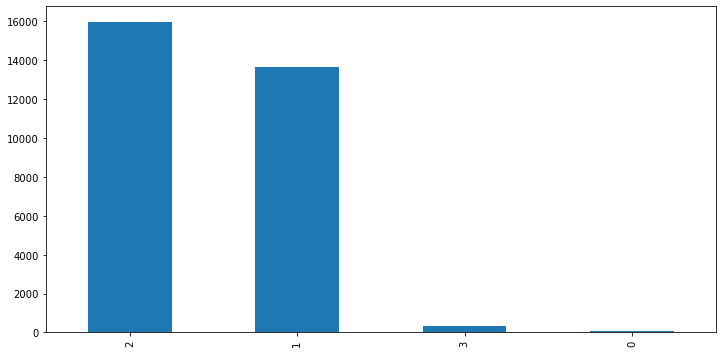

In [53]:
print(df['MARRIAGE'].value_counts())
df.MARRIAGE.value_counts().plot(kind = 'bar')

# 0 undocumented

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


<AxesSubplot:>

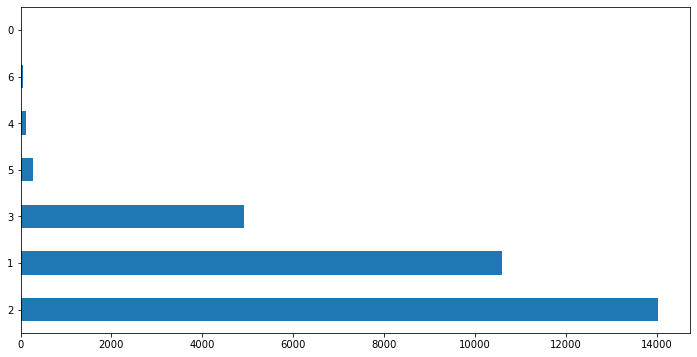

In [54]:
print(df.EDUCATION.value_counts())
df.EDUCATION.value_counts().plot(kind = "barh")

# 0, 5, 6 undocumented

### Numerical Variables

In [55]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()
    plt.show()

In [56]:
df['AGE'].describe()

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

<AxesSubplot:>

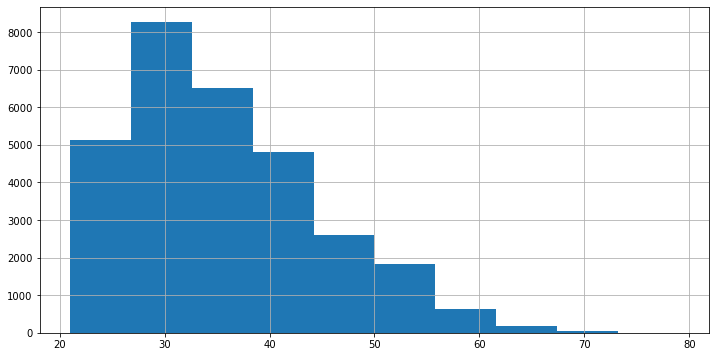

In [57]:
df.AGE.hist()

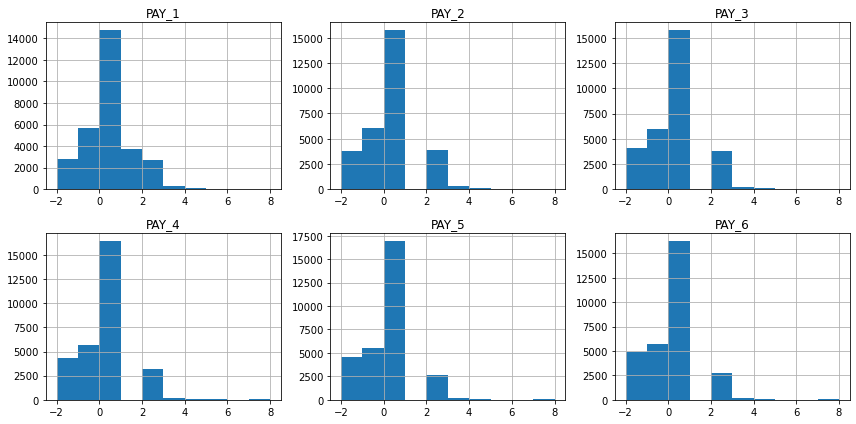

In [58]:
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

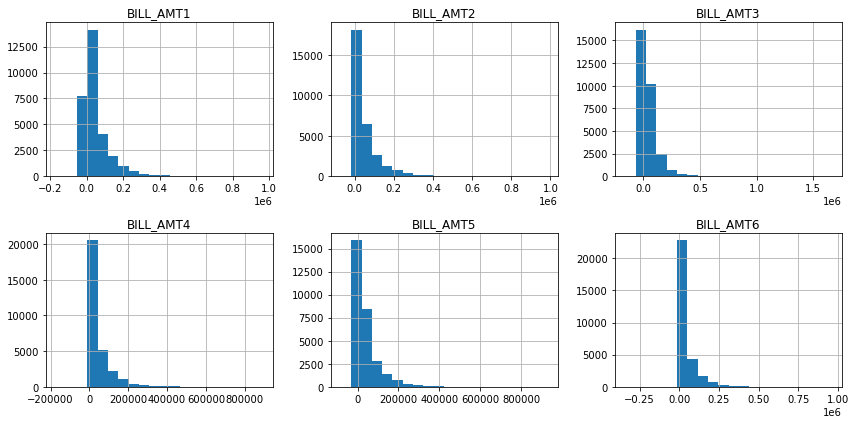

In [59]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

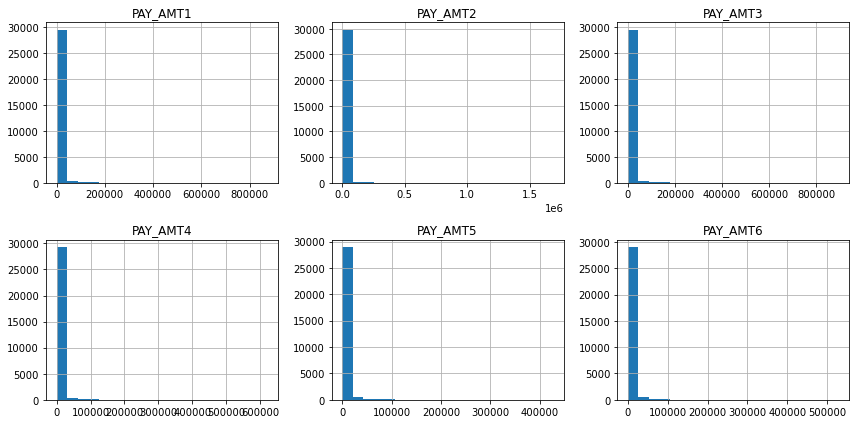

In [60]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

<AxesSubplot:>

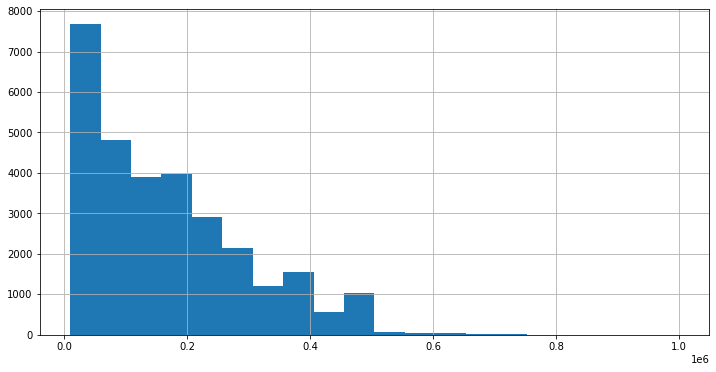

In [61]:
df.LIMIT_BAL.hist(bins = 20)

## 4.2 Data Cleaning

Some categories are mislabeled or undocumented.

The 0 in MARRIAGE can be safely categorized as 'Other' (thus 3). 
* "Other" in marriage could be, for example, "divorced".

In [62]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can also be put in a 'Other' cathegory (thus 4).
* "Other" in education can be an education lower than the high school level.

In [63]:
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

According to the documentation, the PAY_n variables indicate the number of months of delay and indicates "pay duly" with -1.
For entries like -2 and 0, the label has to be adjusted to 0 for pay duly.

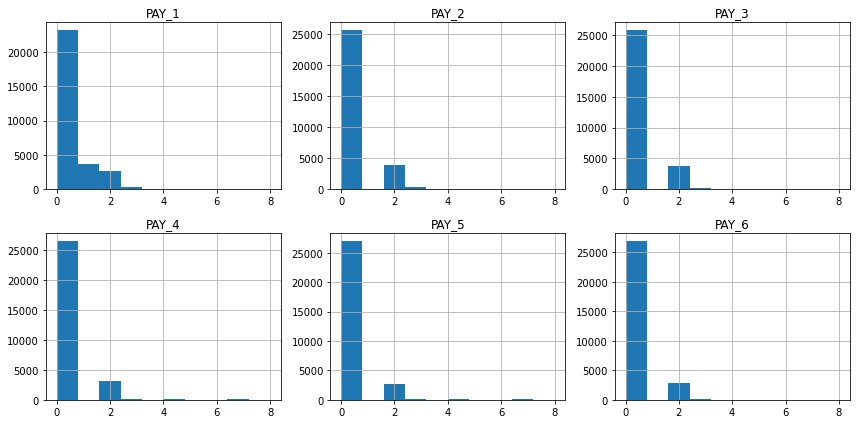

In [64]:
fil = (df.PAY_1 == -2) | (df.PAY_1 == -1) | (df.PAY_1 == 0)
df.loc[fil, 'PAY_1'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0
late = df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

def_pay      0     1
SEX                 
1         9015  2873
2        14349  3763


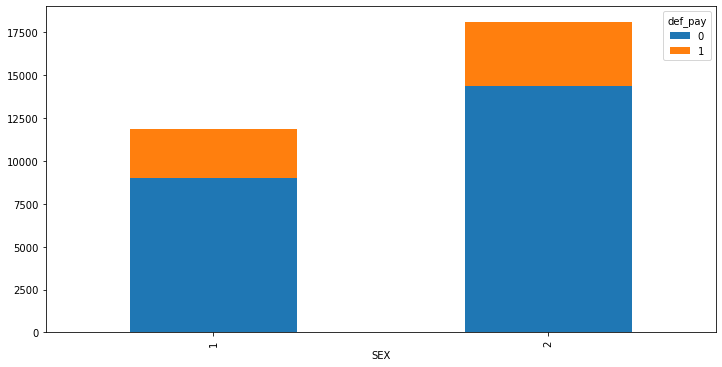

In [65]:
gender = df.groupby(['SEX', 'def_pay']).size().unstack(1)
gender.plot(kind='bar', stacked = True)
print(gender)

In [66]:
df[["SEX", "def_pay"]].groupby(['SEX']).mean().sort_values(by='def_pay', 
    ascending=False)

def_pay
SEX          
1    0.241672
2    0.207763

Considering that about 22% of the customers will default,:
* there are significantly more women than men
* men are most likely going to default the next month

In [67]:
def corr_2_cols(Col1, Col2):
    # count by group
    res = df.groupby([Col1, Col2]).size().unstack()
    # calc percentage
    res['perc'] = (res[res.columns[1]]/(res[res.columns[0]] + res[res.columns[1]]))
    return res

In [68]:
corr_2_cols('EDUCATION', 'def_pay')

def_pay        0     1      perc
EDUCATION                       
1           8549  2036  0.192348
2          10700  3330  0.237349
3           3680  1237  0.251576
4            435    33  0.070513

It seems that the higher is the education, the lower is the probability of defaulting the next month. Only exception is for the category labeled "Other" that, if we stick to the documentation, would be lower than high school. However, numerically they will not have much weight in the final result.

Let's see with MARRIAGE.

In [69]:
corr_2_cols('MARRIAGE', 'def_pay')

def_pay       0     1      perc
MARRIAGE                       
1         10453  3206  0.234717
2         12623  3341  0.209283
3           288    89  0.236074

Here it seems that married people are most likely to default as well as the misterious category "Other" ( which is again numerically less relevant than the others)

All considered, these three categories seem to affect the result we want to predict. Thus we keep them in mind for later. 

In [70]:
corr_2_cols('MARRIAGE', 'SEX')

SEX          1     2      perc
MARRIAGE                      
1         5190  8469  0.620031
2         6553  9411  0.589514
3          145   232  0.615385

In [71]:
corr_2_cols('EDUCATION', 'SEX')

SEX           1     2      perc
EDUCATION                      
1          4354  6231  0.588663
2          5374  8656  0.616964
3          1990  2927  0.595282
4           170   298  0.636752

In [72]:
df[['PAY_AMT6', 'BILL_AMT6', 'PAY_AMT5', 
     'BILL_AMT5', 'PAY_AMT4', 'BILL_AMT4', 'PAY_AMT3', 'BILL_AMT3', 
     'PAY_AMT2', 'BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1',
     'LIMIT_BAL', 'def_pay']].sample(10)

PAY_AMT6  BILL_AMT6  PAY_AMT5  BILL_AMT5  PAY_AMT4  BILL_AMT4  \
9100        0.0    17740.0     355.0    17719.0     354.0    17365.0   
9368     2945.0    78046.0    2771.0    81849.0    5834.0    77140.0   
12663      91.0     9992.0     282.0     9956.0    9956.0     1170.0   
20081    5052.0    14586.0       0.0    26092.0    5080.0    25638.0   
20840    1500.0      529.0       0.0      679.0     800.0     -121.0   
4007       80.0        0.0       0.0     2483.0    2483.0        0.0   
22788    6100.0   163005.0   12300.0   162681.0    6100.0   164310.0   
5453     1200.0    28652.0   28939.0    24967.0    1500.0    24788.0   
23606       0.0      394.0       0.0      694.0     694.0        0.0   
5973     1005.0    12621.0    1004.0    20992.0    1045.0    32897.0   

       PAY_AMT3  BILL_AMT3  PAY_AMT2  BILL_AMT2  PAY_AMT1  BILL_AMT1  \
9100      347.0    17618.0    1600.0    16432.0    1500.0    15972.0   
9368     2645.0    96867.0    4262.0   111431.0    3796.0   110778.0   
12663    1170.0        0.0    1600.0     6390.0    1000.0     6302.0   
20081   25646.0    61723.0   21903.0    60163.0   77225.0   121427.0   
20840       0.0     2015.0       0.0    63485.0    2608.0    62289.0   
4007        0.0        0.0       0.0        0.0       0.0        0.0   
22788       0.0   168541.0       0.0   172632.0   15000.0   161771.0   
5453     1000.0    36445.0    2500.0    49446.0    2009.0    49170.0   
23606       0.0        0.0     694.0     -694.0       0.0     -694.0   
5973     1005.0   159556.0    7063.0   221336.0   10236.0   250121.0   

       LIMIT_BAL  def_pay  
9100     20000.0        1  
9368    200000.0        1  
12663    10000.0        1  
20081   120000.0        0  
20840   500000.0        0  
4007    100000.0        0  
22788   160000.0        0  
5453     50000.0        0  
23606   300000.0        0  
5973    300000.0        0

In [73]:
df[df.def_pay == 1][['BILL_AMT2',
     'PAY_AMT1', 'BILL_AMT1', 'PAY_1',
     'LIMIT_BAL']].sample(10)

BILL_AMT2  PAY_AMT1  BILL_AMT1  PAY_1  LIMIT_BAL
18277    37196.0    2000.0    36086.0      2   180000.0
28261    18464.0     900.0    18162.0      2    20000.0
12597     1392.0    1392.0      696.0      0   150000.0
7721         0.0       0.0        0.0      1   360000.0
8185     13655.0    1700.0    13225.0      0    20000.0
16495    92262.0      70.0   117160.0      1   120000.0
16294    93862.0    7900.0    87418.0      0   110000.0
15757    81521.0    4400.0    79026.0      2    80000.0
26534    17160.0    1308.0    16120.0      0    20000.0
5117      2326.0    2326.0        0.0      0   500000.0

To me it seems that it goes like that:
* I have a BILL of X, I pay Y
* The month after I have to pay X-Y + X', being X' my new expenses, I pay Y'
* The month after I have to pay X+X' - Y - Y' + X'' , I pay Y''
* So on so forth

On top of that I may or may not have months of delay.

It seems that if by september I have a bill too close to my limit, I generally fail. However, I can already see some dramatic exceptions.

Moreover, I can spot some clients that joined our dataset at a later month: they have 0 in BILL and PAY AMT for a while and then they start. I have to keep that in mind as well.

Now I want to see how the month of delay gets assigned. To this end, I will consider only people with no delays 6 months ago and see how their payments go.

In [74]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']].sample(10)

BILL_AMT6  PAY_AMT5  BILL_AMT5  PAY_5
3713     19053.0    3000.0    16427.0      2
22691      249.0       0.0    27231.0      2
16403    15261.0    2000.0    13490.0      2
2701     21682.0     923.0    21262.0      2
26124    50806.0    1836.0    50690.0      2
15959    55512.0    2000.0    57755.0      2
13689    81246.0    3200.0    79311.0      2
9054     55732.0    2500.0    70252.0      2
19956    24782.0    1058.0    24262.0      2
20661    18660.0     765.0    63835.0      2

In [75]:
fil = ((df.PAY_6 == 0) & (df.BILL_AMT6 > 0) & (df.PAY_5 > 0) & (df.PAY_AMT5 == 0))
df[fil][['BILL_AMT6', 'PAY_AMT5', 'BILL_AMT5', 'PAY_5']]

BILL_AMT6  PAY_AMT5  BILL_AMT5  PAY_5
2272       244.0       0.0      244.0      2
13895      950.0       0.0     1340.0      2
18795    20000.0       0.0    20000.0      2
19933     2240.0       0.0     2825.0      2
20737    18767.0       0.0    18767.0      2
22212      702.0       0.0      802.0      2
22691      249.0       0.0    27231.0      2
23887    25000.0       0.0    26000.0      2
27196     1170.0       0.0     1573.0      2

I am puzzled by a few things:
* why there is no PAY_5 at 1 but only at 2? This is the first month the client doesn't pay (or doesn't pay enough)
* Sometimes the client did pay but still got a delay value bigger than 0

In [76]:
fil = ((df.PAY_AMT1 > df.BILL_AMT2) & (df.PAY_1 > 0) & (df.PAY_2 == 0))
df[fil][['BILL_AMT2', 'PAY_2', 'PAY_AMT2', 'BILL_AMT1', 'PAY_1', 'LIMIT_BAL', 'def_pay']].head(10)

BILL_AMT2  PAY_2  PAY_AMT2  BILL_AMT1  PAY_1  LIMIT_BAL  def_pay
26      -425.0      0    1000.0     -109.0      1    60000.0        1
68     -9850.0      0       0.0     -190.0      1   130000.0        0
109     -103.0      0       0.0     -103.0      1   360000.0        0
149    -1100.0      0   22500.0    -1100.0      1   260000.0        0
173     -709.0      0       0.0     -709.0      1    50000.0        1
186    57077.0      0    5295.0     2616.0      1   360000.0        0
216     -946.0      0       0.0     -946.0      1   240000.0        1
276     2715.0      0       0.0      171.0      2   460000.0        1
319       -2.0      0       0.0       -2.0      1   180000.0        0
330      505.0      0       0.0     -179.0      1   200000.0        1

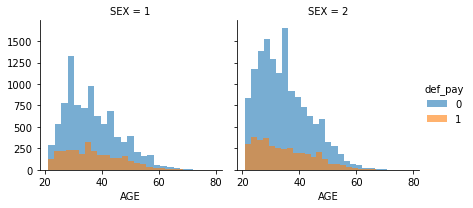

In [77]:
g = sns.FacetGrid(df, col='SEX', hue='def_pay')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()

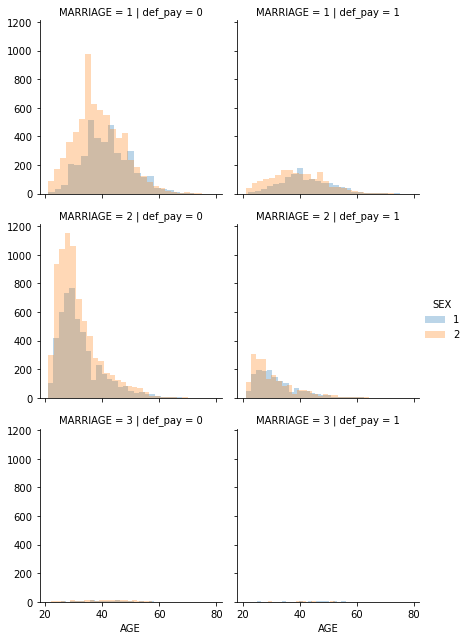

In [78]:
g = sns.FacetGrid(df, col='def_pay', row= "MARRIAGE", hue='SEX')
g.map(plt.hist, 'AGE', alpha=0.3, bins=25) 
g.add_legend()

## 5. Data Manipulation

### 5.1 Feature Engineering

men are most likely to default and also that married people are most likely to default. Thus why not combine them in a single variable given by the product of the two? I chose these two first because they are both labeled 1,2 and they both decrease the probability of defaulting if their value increase. According to our models, SEX and MARRIAGE are the least important variables, so it can be a good exercise to see if combining them is a waste of time.

This operation will create a category for married man, which I expect to be the one with high probability of defaulting, a combination of married women and single man, a category (expected to be numerically less populated) of "divorced" men (in other words, the "other" in marriage times the "male" in sex), one for single women and one for "divorced" women.

In [79]:
df['SE_MA_2'] = 0
df.loc[((df.SEX == 1) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 1 #married man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 2 #single man
df.loc[((df.SEX == 1) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 3 #divorced man
df.loc[((df.SEX == 2) & (df.MARRIAGE == 1)) , 'SE_MA_2'] = 4 #married woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 2)) , 'SE_MA_2'] = 5 #single woman
df.loc[((df.SEX == 2) & (df.MARRIAGE == 3)) , 'SE_MA_2'] = 6 #divorced woman
corr_2_cols('SE_MA_2', 'def_pay')

def_pay     0     1      perc
SE_MA_2                      
1        3844  1346  0.259345
2        5068  1485  0.226614
3         103    42  0.289655
4        6609  1860  0.219625
5        7555  1856  0.197216
6         185    47  0.202586

can see clearly that married men have a higher probability of defaulting, single men have nothing special with respect to the all population and single women have a lowe probability of defaulting. Among the divorced, men have more troubles (but these categories are not very much populated).

It can be useful to create age categories.

<AxesSubplot:>

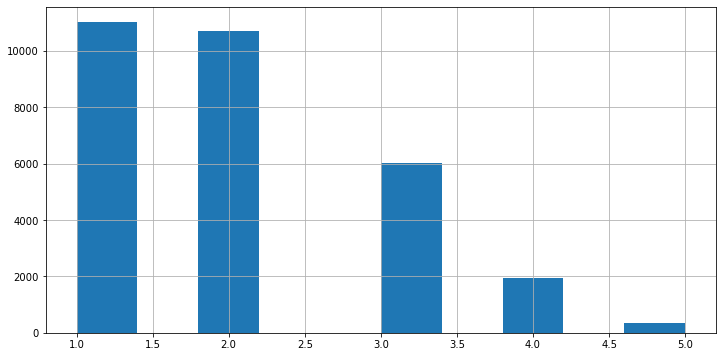

In [80]:
df['AgeBin'] = pd.cut(df['AGE'], 6, labels = [1,2,3,4,5,6])
#because 1 2 3 ecc are "categories" so far and we need numbers
df['AgeBin'] = pd.to_numeric(df['AgeBin'])
df.loc[(df['AgeBin'] == 6) , 'AgeBin'] = 5
df.AgeBin.hist()

In [81]:
corr_2_cols('AgeBin', 'def_pay')

def_pay     0     1      perc
AgeBin                       
1        8542  2471  0.224371
2        8524  2189  0.204331
3        4606  1399  0.232973
4        1449   481  0.249223
5         243    96  0.283186

In [82]:
corr_2_cols('AgeBin', 'SEX')

SEX        1     2      perc
AgeBin                      
1       3842  7171  0.651140
2       4363  6350  0.592738
3       2587  3418  0.569192
4        917  1013  0.524870
5        179   160  0.471976

I see that default probability goes down in your 30's and then goes higher and higher. At the same time, the percentage of men is growing with the age category. Thus I want to combine the two as before and create a combination of the two.

In [83]:
df['SE_AG'] = 0
df.loc[((df.SEX == 1) & (df.AgeBin == 1)) , 'SE_AG'] = 1 #man in 20's
df.loc[((df.SEX == 1) & (df.AgeBin == 2)) , 'SE_AG'] = 2 #man in 30's
df.loc[((df.SEX == 1) & (df.AgeBin == 3)) , 'SE_AG'] = 3 #man in 40's
df.loc[((df.SEX == 1) & (df.AgeBin == 4)) , 'SE_AG'] = 4 #man in 50's
df.loc[((df.SEX == 1) & (df.AgeBin == 5)) , 'SE_AG'] = 5 #man in 60's and above
df.loc[((df.SEX == 2) & (df.AgeBin == 1)) , 'SE_AG'] = 6 #woman in 20's
df.loc[((df.SEX == 2) & (df.AgeBin == 2)) , 'SE_AG'] = 7 #woman in 30's
df.loc[((df.SEX == 2) & (df.AgeBin == 3)) , 'SE_AG'] = 8 #woman in 40's
df.loc[((df.SEX == 2) & (df.AgeBin == 4)) , 'SE_AG'] = 9 #woman in 50's
df.loc[((df.SEX == 2) & (df.AgeBin == 5)) , 'SE_AG'] = 10 #woman in 60's and above
corr_2_cols('SE_AG', 'def_pay')

def_pay     0     1      perc
SE_AG                        
1        2929   913  0.237637
2        3350  1013  0.232180
3        1939   648  0.250483
4         666   251  0.273719
5         131    48  0.268156
6        5613  1558  0.217264
7        5174  1176  0.185197
8        2667   751  0.219719
9         783   230  0.227048
10        112    48  0.300000

Now it is time to do something that indicates being a client at a given month or not. I would say that if PAY, BILL_AMT and PAY_AMT are 0, then we are not talking about a client

In [84]:
df['Client_6'] = 1
df['Client_5'] = 1
df['Client_4'] = 1
df['Client_3'] = 1
df['Client_2'] = 1
df['Client_1'] = 1
df.loc[((df.PAY_6 == 0) & (df.BILL_AMT6 == 0) & (df.PAY_AMT6 == 0)) , 'Client_6'] = 0
df.loc[((df.PAY_5 == 0) & (df.BILL_AMT5 == 0) & (df.PAY_AMT5 == 0)) , 'Client_5'] = 0
df.loc[((df.PAY_4 == 0) & (df.BILL_AMT4 == 0) & (df.PAY_AMT4 == 0)) , 'Client_4'] = 0
df.loc[((df.PAY_3 == 0) & (df.BILL_AMT3 == 0) & (df.PAY_AMT3 == 0)) , 'Client_3'] = 0
df.loc[((df.PAY_2 == 0) & (df.BILL_AMT2 == 0) & (df.PAY_AMT2 == 0)) , 'Client_2'] = 0
df.loc[((df.PAY_1 == 0) & (df.BILL_AMT1 == 0) & (df.PAY_AMT1 == 0)) , 'Client_1'] = 0
pd.Series([df[df.Client_6 == 1].def_pay.count(),
          df[df.Client_5 == 1].def_pay.count(),
          df[df.Client_4 == 1].def_pay.count(),
          df[df.Client_3 == 1].def_pay.count(),
          df[df.Client_2 == 1].def_pay.count(),
          df[df.Client_1 == 1].def_pay.count()], [6,5,4,3,2,1])

6    26700
5    27247
4    27572
3    27810
2    28183
1    29477
dtype: int64

I will need these variables if I want to see how my predictions will change if I anticipate them (i. e. if I use data up to june instead of up to september)

Next, I want something to describe the expenses of a client, following the idea I have expressed before when I looked at the BILL AMT and the PAY AMT. I am thinking of something like average expenses at any given month (again, for this first prediction I will just care about the last month but I might need the others later). Moreover, I want to give some context to it, so I will divide that number by LIMIT_BAL, so that we have a sort of extimation of how "careless" a client is.

In [85]:
df['Avg_exp_5'] = ((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5']))) / df['LIMIT_BAL']
df['Avg_exp_4'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4']))) / 2) / df['LIMIT_BAL']
df['Avg_exp_3'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3']))) / 3) / df['LIMIT_BAL']
df['Avg_exp_2'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2']))) / 4) / df['LIMIT_BAL']
df['Avg_exp_1'] = (((df['BILL_AMT5'] - (df['BILL_AMT6'] - df['PAY_AMT5'])) +
                 (df['BILL_AMT4'] - (df['BILL_AMT5'] - df['PAY_AMT4'])) +
                 (df['BILL_AMT3'] - (df['BILL_AMT4'] - df['PAY_AMT3'])) +
                 (df['BILL_AMT2'] - (df['BILL_AMT3'] - df['PAY_AMT2'])) +
                 (df['BILL_AMT1'] - (df['BILL_AMT2'] - df['PAY_AMT1']))) / 5) / df['LIMIT_BAL']
df[['LIMIT_BAL', 'Avg_exp_5', 'BILL_AMT5', 'Avg_exp_4', 'BILL_AMT4','Avg_exp_3', 'BILL_AMT3',
    'Avg_exp_2', 'BILL_AMT2', 'Avg_exp_1', 'BILL_AMT1', 'def_pay']].sample(20)

LIMIT_BAL  Avg_exp_5  BILL_AMT5  Avg_exp_4  BILL_AMT4  Avg_exp_3  \
20981   230000.0   0.000000     -868.0   0.000000     -868.0   0.001493   
22897   100000.0   0.006950    42635.0   0.008485    43637.0   0.008970   
11031    20000.0   0.000000        0.0   0.490350    19614.0   0.330233   
20994    80000.0   0.038100    73025.0   0.041263    73572.0   0.041221   
4795     20000.0   0.014750    14711.0   0.064175    16400.0   0.076333   
29827   150000.0   0.336687   103050.0   0.271260   129725.0   0.246076   
28088   150000.0   0.034153     5024.0   0.151210    40215.0   0.137900   
15794    20000.0   0.113200    15237.0   0.128900    17623.0   0.092550   
17843   170000.0   0.104641    14285.0   0.167056    49734.0   0.137502   
8913     20000.0   0.019500      880.0   0.019500      390.0   0.047833   
9677    360000.0   0.018850     6786.0   0.010896     7845.0   0.014416   
18807    70000.0   0.033371    29672.0   0.319443    71058.0   0.233910   
22085   260000.0   0.404800   199611.0   0.221646   203532.0   0.161844   
3856    180000.0   0.005700    70409.0   0.005597    68398.0   0.005267   
14285   290000.0   0.385617   111765.0   0.208812   118253.0   0.151225   
23238    50000.0   0.036060    20062.0   0.328210    49978.0   0.231027   
27426    20000.0   0.219500    -7220.0   0.219500    -2830.0   0.250950   
5948    170000.0   0.008194    84388.0   0.007979    82608.0   0.015690   
24220   230000.0   0.013017    30821.0   0.013100    32653.0   0.042806   
15568   100000.0   0.012660    68990.0   0.031765    66077.0   0.030237   

       BILL_AMT3  Avg_exp_2  BILL_AMT2  Avg_exp_1  BILL_AMT1  def_pay  
20981      162.0   0.009687     7882.0   0.013414     6514.0        1  
22897    41131.0   0.009102    42081.0   0.009224    41052.0        1  
11031    18814.0   0.253275    17762.0   0.213120    17312.0        1  
20994    73744.0   0.040803    71896.0   0.039365    71578.0        0  
4795     17858.0   0.329825    37198.0   0.106630    20167.0        0  
29827   153981.0   0.205242   160292.0   0.180792   165441.0        1  
28088    16465.0   0.171957    41036.0   0.141897     3042.0        0  
15794    16520.0   0.072563    14772.0   0.060390    13506.0        0  
17843    57061.0   0.141950    78411.0   0.134211    85914.0        0  
8913      2480.0   0.139175     8264.0   0.219610    10827.0        0  
9677     15369.0   0.011333      751.0   0.009202     -507.0        0  
18807    72457.0   0.184879    71602.0   0.157286    72286.0        0  
22085   209805.0   0.128337   205105.0   0.109976   207593.0        0  
3856     67227.0   0.006894    66747.0   0.007797    64800.0        0  
14285    10409.0   0.135859    25980.0   0.120375    22681.0        0  
23238    49811.0   0.182530    49163.0   0.164028    50664.0        0  
27426     2006.0   0.198662      836.0   0.167290      836.0        0  
5948     84897.0   0.053096   109889.0   0.044991   108426.0        0  
24220    36163.0   0.035577    36348.0   0.057505    33400.0        0  
15568    60737.0   0.101947    87442.0   0.127948    95600.0        0

One last thing: how far the bill is from the limit should matter, thus I will create that variable. Since the result can vary a lot from one client to the other (the LIMIT_BAL variable has a very wide range), I will again weight this difference on the LIMIT_BAL feature (in my mind it has more meaning, maybe I am wrong). Again, I want to keep the historical trend of the variable

In [86]:
df['Closeness_6'] = (df.LIMIT_BAL - df.BILL_AMT6) / df.LIMIT_BAL
df['Closeness_5'] = (df.LIMIT_BAL - df.BILL_AMT5) / df.LIMIT_BAL
df['Closeness_4'] = (df.LIMIT_BAL - df.BILL_AMT4) / df.LIMIT_BAL
df['Closeness_3'] = (df.LIMIT_BAL - df.BILL_AMT3) / df.LIMIT_BAL
df['Closeness_2'] = (df.LIMIT_BAL - df.BILL_AMT2) / df.LIMIT_BAL
df['Closeness_1'] = (df.LIMIT_BAL - df.BILL_AMT1) / df.LIMIT_BAL
df[['Closeness_6', 'Closeness_5', 'Closeness_4', 'Closeness_3', 'Closeness_2',
   'Closeness_1', 'def_pay']].sample(20)

Closeness_6  Closeness_5  Closeness_4  Closeness_3  Closeness_2  \
4864      1.000000     1.000000     1.000000     1.000000     1.000000   
12773     0.281873     0.239583     0.196567     0.068100     0.083617   
12812     0.035631     0.066423     0.018685     0.026685     0.033723   
20585     0.650460     0.607925     0.568170     0.572283     0.611703   
9300      1.000000     0.991000     1.000000     1.000000     0.933985   
14178     1.026267     1.026267     1.026267     1.026267     1.026267   
29456     1.000000     1.000000     0.521407     0.436843     0.260286   
25413     0.799380     0.816320     0.833480     0.854980     0.875360   
20364     0.265500     0.296550     0.270100     0.293650     0.494700   
27428     0.961000     0.519000     0.531200    -0.748200     0.055150   
26613     0.143600     0.131700    -0.004000     0.043200     0.115400   
6082      0.705220     0.691080     0.660760     0.670200     0.692600   
3020      0.166667     0.219967     0.242633     0.270367     0.248533   
1272      0.973973     0.918565     0.916889     0.967314     0.977965   
192       0.905322     0.904294     1.000000     1.000000     0.998894   
9556      0.162118     0.012846    -0.005196     0.011450     0.074511   
1654      0.782480     0.727100     0.603540     0.106240     0.024980   
26918     0.542983     0.534458     0.541975     0.544533     0.580117   
18115     0.021082     0.035059     0.017829     1.925082     0.941576   
27682     1.000000     1.000000     1.000000     0.974000     0.040667   

       Closeness_1  def_pay  
4864      1.000000        0  
12773     0.093573        1  
12812     0.006969        1  
20585     0.593650        0  
9300      0.924454        1  
14178     0.681822        1  
29456     0.354907        0  
25413     0.895700        1  
20364     0.528900        1  
27428     0.119350        1  
26613     0.024400        0  
6082      0.681800        0  
3020      0.378033        1  
1272      0.942811        0  
192       0.936744        0  
9556      0.088154        1  
1654     -0.010140        0  
26918     0.589950        0  
18115     0.963512        0  
27682     0.078000        0

### Spearman Correlation of Engineered Features

In [87]:
## FOR CORRELATION
corr_features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA_2', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1', 'def_pay']
corr_df = df[corr_features]

In [88]:
def corr_heatmap(data, idx_s, idx_e):
    y = data['def_pay']
    temp = data.iloc[:, idx_s:idx_e]
    if 'id' in temp.columns:
        del temp['id']
    temp['def_pay'] = y
    plt.subplots(figsize = (20,15)) # increasing plot size
    sns.heatmap(temp.corr(), annot=True, fmt='.2f')
    plt.show()

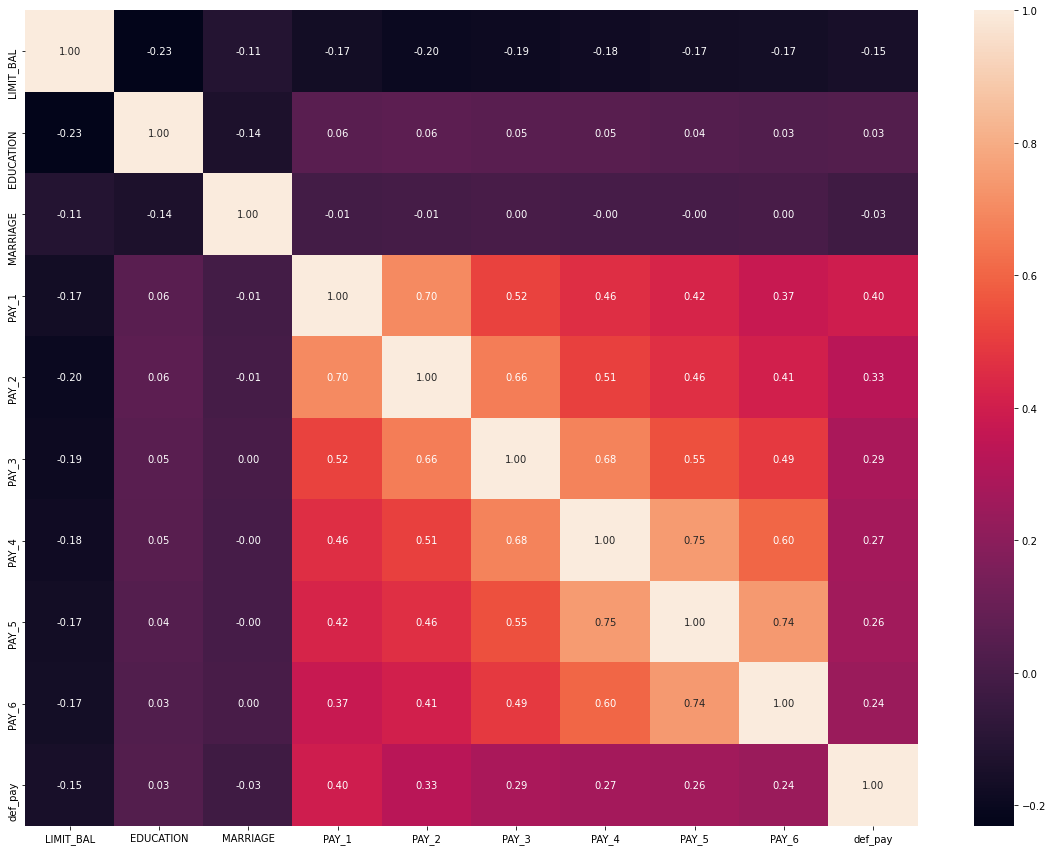

In [89]:
corr_heatmap(corr_df, 0, 9)

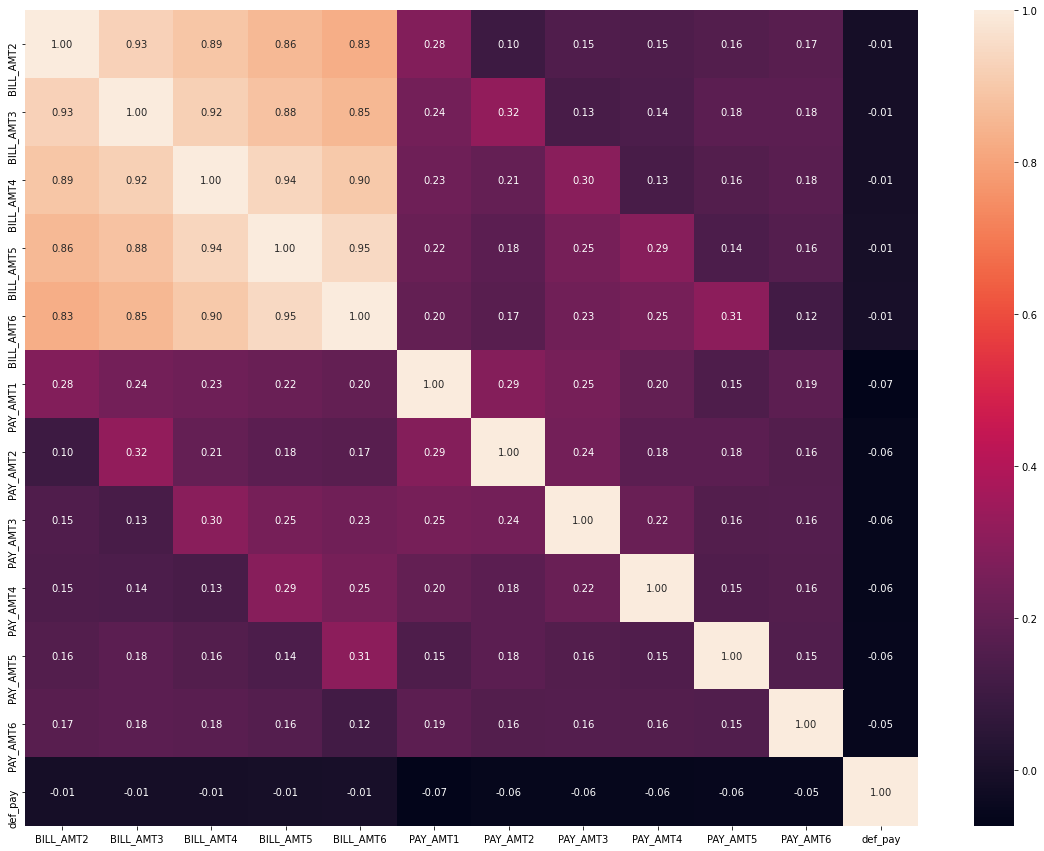

In [90]:
corr_heatmap(corr_df, 10,21)

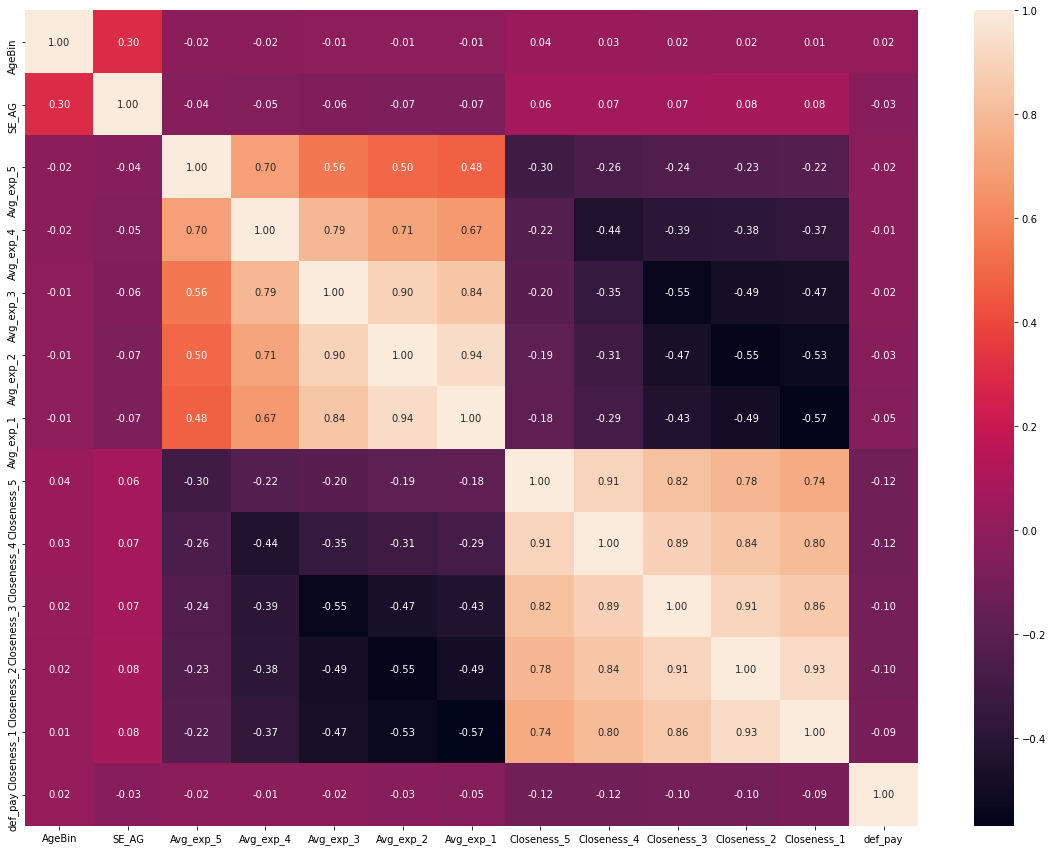

In [91]:
corr_heatmap(corr_df, 22,34)

## 6. Machine Learning Algorithms

In [92]:
features = ['LIMIT_BAL', 'EDUCATION', 'MARRIAGE', 'PAY_1','PAY_2', 'PAY_3', 
            'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2',
            'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
            'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
            'SE_MA_2', 'AgeBin', 'SE_AG', 'Avg_exp_5', 'Avg_exp_4',
            'Avg_exp_3', 'Avg_exp_2', 'Avg_exp_1', 'Closeness_5',
            'Closeness_4', 'Closeness_3', 'Closeness_2','Closeness_1']

### 6.1 Setting Dataset
### 6.1.1 Unadjusted Dataset

In [93]:
y = df['def_pay'].copy() # target
X = df[features].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [94]:
#check that the target is not far off
print("Target Distribution Across Datasets")
pd.DataFrame([df.def_pay.describe(),y_train.describe(),y_test.describe()], index = ['Original Target', 'Training Target', 'Testing Target'])

Target Distribution Across Datasets


count      mean       std  min  25%  50%  75%  max
Original Target  30000.0  0.221200  0.415062  0.0  0.0  0.0  0.0  1.0
Training Target  24000.0  0.221792  0.415460  0.0  0.0  0.0  0.0  1.0
Testing Target    6000.0  0.218833  0.413490  0.0  0.0  0.0  0.0  1.0

### PCA - Unadjusted Dataset

In [95]:
# Standardising the features
scaler = StandardScaler()

# Fit on training set only
scaler.fit(X_train)

# Apply transform to training & test set
X_train_standard = scaler.transform(X_train)
X_test_standard = scaler.transform(X_test)

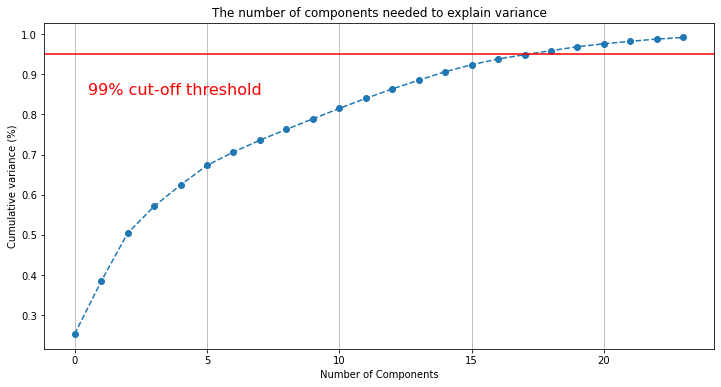

In [96]:
pca = PCA(n_components = 0.99)
pca.fit(X_train_standard)

fig, ax = plt.subplots()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker = 'o', linestyle = '--')
plt.ylabel('cumulative explained variance');
plt.xlabel('Number of Components')
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '99% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [97]:
# make an instance of the model
pca = PCA(n_components = 17)
pca.fit(X_train_standard)

PCA(n_components=17)

In [98]:
# Apply the mapping/transofrm to both training and test set
X_train_PCA = pca.transform(X_train_standard)
X_train_PCA = pd.DataFrame(X_train_PCA, columns = features[:17])

X_test_PCA = pca.transform(X_test_standard)
X_test_PCA = pd.DataFrame(X_test_PCA, columns = features[:17])

In [99]:
pd.DataFrame(X_train_standard, columns = features).head()

LIMIT_BAL  EDUCATION  MARRIAGE   PAY_1     PAY_2     PAY_3     PAY_4  \
0  -0.672359   0.210900  0.848301 -0.4682 -0.399773 -0.384148 -0.340674   
1  -1.057768   0.210900  0.848301 -0.4682 -0.399773 -0.384148 -0.340674   
2   0.098459   2.893256 -1.066779 -0.4682 -0.399773 -0.384148 -0.340674   
3  -0.826523  -1.130278  0.848301 -0.4682 -0.399773 -0.384148 -0.340674   
4  -0.286950   0.210900  0.848301 -0.4682 -0.399773 -0.384148 -0.340674   

      PAY_5     PAY_6  BILL_AMT1  ...  Avg_exp_5  Avg_exp_4  Avg_exp_3  \
0 -0.309049 -0.318521   0.329670  ...  -0.211276   1.703498   1.288404   
1 -0.309049 -0.318521  -0.295445  ...   5.108696   3.701463   3.012580   
2 -0.309049 -0.318521  -0.408879  ...  -0.078159  -0.350391  -0.490642   
3 -0.309049 -0.318521   0.107788  ...  -0.067547  -0.220627  -0.359828   
4 -0.309049 -0.318521   0.826432  ...  -0.251475  -0.389586  -0.483926   

   Avg_exp_2  Avg_exp_1  Closeness_5  Closeness_4  Closeness_3  Closeness_2  \
0   1.015447   0.783864    -0.462386    -1.521455    -1.476318    -1.370483   
1   2.434613   2.387970    -1.139018    -1.305635    -1.458271    -1.411523   
2  -0.586676  -0.365071     0.838676     0.970990     0.972886     1.012215   
3   0.322460   0.458890    -0.931188    -0.815649    -0.629669    -1.174176   
4  -0.540731  -0.554679    -1.697440    -1.480060    -1.233876    -1.117413   

   Closeness_1  
0    -1.249561  
1    -1.335997  
2     0.744377  
3    -1.350334  
4    -1.054008  

[5 rows x 34 columns]

In [100]:
X_train_PCA.head()

LIMIT_BAL  EDUCATION  MARRIAGE     PAY_1     PAY_2     PAY_3     PAY_4  \
0   2.813511   0.000117  2.210626 -1.446800  1.174927  1.015216  0.150928   
1   3.884348  -0.373104  6.819121  0.490357 -1.234831  1.207009 -1.877522   
2  -2.590218   0.687597  0.092813 -0.279296  0.840050 -2.596295  0.285538   
3   1.253085  -0.350952  0.933567 -1.657543 -1.684606  1.877794  0.490865   
4   3.093700   0.353116 -1.470810 -2.340971  1.048623  1.285851  0.663418   

      PAY_5     PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  0.358825 -0.288299   0.011759   0.016608   0.039507   0.135134  -0.089027   
1 -1.727345 -0.831063  -0.073380  -0.143576  -0.635619   0.823543   1.734045   
2 -0.254913  0.333506   0.876999   0.304124   1.724260   0.896599   0.836455   
3 -0.086679 -0.021115  -0.026982   0.032372  -0.468475  -0.606362  -0.764223   
4 -0.721864  0.407727   0.372301   0.487455   0.001261  -0.069292   0.231737   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  
0   0.131206 -0.252206  0.200046  
1  -0.609376  0.046731 -0.153087  
2  -0.178004 -0.299637  0.003633  
3   0.108357  0.101705  0.058569  
4   0.209165 -0.168382  0.126702

In [101]:
df_PCA = X_train_PCA.join(y_train.copy())
df_PCA['def_pay'] = df_PCA['def_pay'].fillna(0)
df_PCA.head()

LIMIT_BAL  EDUCATION  MARRIAGE     PAY_1     PAY_2     PAY_3     PAY_4  \
0   2.813511   0.000117  2.210626 -1.446800  1.174927  1.015216  0.150928   
1   3.884348  -0.373104  6.819121  0.490357 -1.234831  1.207009 -1.877522   
2  -2.590218   0.687597  0.092813 -0.279296  0.840050 -2.596295  0.285538   
3   1.253085  -0.350952  0.933567 -1.657543 -1.684606  1.877794  0.490865   
4   3.093700   0.353116 -1.470810 -2.340971  1.048623  1.285851  0.663418   

      PAY_5     PAY_6  BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0  0.358825 -0.288299   0.011759   0.016608   0.039507   0.135134  -0.089027   
1 -1.727345 -0.831063  -0.073380  -0.143576  -0.635619   0.823543   1.734045   
2 -0.254913  0.333506   0.876999   0.304124   1.724260   0.896599   0.836455   
3 -0.086679 -0.021115  -0.026982   0.032372  -0.468475  -0.606362  -0.764223   
4 -0.721864  0.407727   0.372301   0.487455   0.001261  -0.069292   0.231737   

   BILL_AMT6  PAY_AMT1  PAY_AMT2  def_pay  
0   0.131206 -0.252206  0.200046      1.0  
1  -0.609376  0.046731 -0.153087      1.0  
2  -0.178004 -0.299637  0.003633      0.0  
3   0.108357  0.101705  0.058569      0.0  
4   0.209165 -0.168382  0.126702      0.0

### 6.1.2 Adjusted Dataset

In [102]:
df_0 = df[df['def_pay'] == 0.0]
df_1 = df[df['def_pay'] == 1.0]

#### df_adj5 (50% Target = 1, 100% Target = 0)

In [103]:
df_adj5 = pd.concat([df_0, df_1.sample(frac = 0.5)], axis = 0)
df_adj5.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  26682.000000    26682.000000  26682.000000  26682.000000  26682.000000   
mean   15037.799116   172083.501986      1.607638      1.836332      1.560003   
std     8672.546982   130701.332043      0.488286      0.749205      0.520932   
min        1.000000    10000.000000      1.000000      1.000000      1.000000   
25%     7504.750000    60000.000000      1.000000      1.000000      1.000000   
50%    15051.500000   150000.000000      2.000000      2.000000      2.000000   
75%    22580.750000   240000.000000      2.000000      2.000000      2.000000   
max    29999.000000  1000000.000000      2.000000      4.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  26682.000000  26682.000000  26682.000000  26682.000000  26682.000000   
mean      35.461922      0.286410      0.259726      0.253654      0.214564   
std        9.154623      0.679116      0.730200      0.727092      0.692651   
min       21.000000      0.000000      0.000000      0.000000      0.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...     Avg_exp_4     Avg_exp_3     Avg_exp_2     Avg_exp_1  \
count  ...  26682.000000  26682.000000  26682.000000  26682.000000   
mean   ...      0.055810      0.061078      0.061966      0.061483   
std    ...      0.102723      0.093455      0.085291      0.078207   
min    ...     -0.660550     -0.429867     -0.271525     -0.213730   
25%    ...      0.006138      0.007954      0.009538      0.010787   
50%    ...      0.019175      0.024751      0.028916      0.032183   
75%    ...      0.055461      0.075553      0.084006      0.087641   
max    ...      2.472750      3.568125      3.204891      2.684365   

        Closeness_6   Closeness_5   Closeness_4   Closeness_3   Closeness_2  \
count  26682.000000  26682.000000  26682.000000  26682.000000  26682.000000   
mean       0.690849      0.676291      0.650446      0.617422      0.598281   
std        0.340158      0.346409      0.364922      0.394156      0.402392   
min       -2.885550     -3.935500     -4.146850     -9.688575     -5.380500   
25%        0.437018      0.414463      0.355630      0.265042      0.213243   
50%        0.828085      0.803398      0.778675      0.747080      0.723909   
75%        0.992200      0.988900      0.985873      0.984099      0.981980   
max        2.509530      1.876743      2.374500      1.925082      2.395540   

        Closeness_1  
count  26682.000000  
mean       0.584443  
std        0.410153  
min       -5.455300  
25%        0.184901  
50%        0.705555  
75%        0.978136  
max        1.619892  

[8 rows x 45 columns]

In [104]:
y_adj5 = df_adj5['def_pay'].copy() # target
X_adj5 = df_adj5[features].copy()
X_train_adj5, X_test_adj5, y_train_adj5, y_test_adj5 = train_test_split(X_adj5, y_adj5, test_size=0.20, random_state=42)

print("Target Distribution Across Datasets")
pd.DataFrame([df_adj5.def_pay.describe(),y_train_adj5.describe(),y_test_adj5.describe()], index = ['Original Target', 'Training Target', 'Testing Target'])

Target Distribution Across Datasets


count      mean       std  min  25%  50%  75%  max
Original Target  26682.0  0.124353  0.329991  0.0  0.0  0.0  0.0  1.0
Training Target  21345.0  0.125041  0.330773  0.0  0.0  0.0  0.0  1.0
Testing Target    5337.0  0.121604  0.326858  0.0  0.0  0.0  0.0  1.0

#### df_adj2 (20% Target = 1, 100% Target = 0)

In [105]:
df_adj2 = pd.concat([df_0, df_1.sample(frac = 0.2)], axis = 0)
df_adj2.describe()

ID       LIMIT_BAL           SEX     EDUCATION      MARRIAGE  \
count  24691.000000    24691.000000  24691.000000  24691.000000  24691.000000   
mean   15023.369041   175638.167753      1.611154      1.831801      1.562715   
std     8681.103636   131267.357454      0.487498      0.751143      0.520524   
min        2.000000    10000.000000      1.000000      1.000000      1.000000   
25%     7494.500000    60000.000000      1.000000      1.000000      1.000000   
50%    15014.000000   150000.000000      2.000000      2.000000      2.000000   
75%    22585.500000   250000.000000      2.000000      2.000000      2.000000   
max    29999.000000  1000000.000000      2.000000      4.000000      3.000000   

                AGE         PAY_1         PAY_2         PAY_3         PAY_4  \
count  24691.000000  24691.000000  24691.000000  24691.000000  24691.000000   
mean      35.440201      0.235835      0.213276      0.211049      0.175611   
std        9.112884      0.614979      0.670953      0.662886      0.622273   
min       21.000000      0.000000      0.000000      0.000000      0.000000   
25%       28.000000      0.000000      0.000000      0.000000      0.000000   
50%       34.000000      0.000000      0.000000      0.000000      0.000000   
75%       41.000000      0.000000      0.000000      0.000000      0.000000   
max       79.000000      8.000000      8.000000      8.000000      8.000000   

       ...     Avg_exp_4     Avg_exp_3     Avg_exp_2     Avg_exp_1  \
count  ...  24691.000000  24691.000000  24691.000000  24691.000000   
mean   ...      0.056121      0.061374      0.062428      0.062062   
std    ...      0.103058      0.093586      0.085406      0.078480   
min    ...     -0.660550     -0.429867     -0.271525     -0.213730   
25%    ...      0.006170      0.008026      0.009714      0.010981   
50%    ...      0.019500      0.025490      0.029875      0.033469   
75%    ...      0.056090      0.076327      0.085183      0.088489   
max    ...      2.472750      3.568125      3.204891      2.684365   

        Closeness_6   Closeness_5   Closeness_4   Closeness_3   Closeness_2  \
count  24691.000000  24691.000000  24691.000000  24691.000000  24691.000000   
mean       0.698231      0.683512      0.657531      0.624681      0.605183   
std        0.336073      0.342632      0.361962      0.392686      0.400700   
min       -2.885550     -3.935500     -4.146850     -9.688575     -5.380500   
25%        0.454720      0.429478      0.371941      0.278282      0.225780   
50%        0.838058      0.813600      0.792306      0.763204      0.738611   
75%        0.992262      0.988917      0.986079      0.984324      0.982267   
max        2.509530      1.876743      2.374500      2.025100      2.395540   

        Closeness_1  
count  24691.000000  
mean       0.590562  
std        0.408809  
min       -5.455300  
25%        0.191375  
50%        0.722380  
75%        0.978592  
max        1.619892  

[8 rows x 45 columns]

In [106]:
y_adj2 = df_adj2['def_pay'].copy() # target
X_adj2 = df_adj2[features].copy()
X_train_adj2, X_test_adj2, y_train_adj2, y_test_adj2 = train_test_split(X_adj2, y_adj2, test_size=0.20, random_state=42)

print("Target Distribution Across Datasets")
pd.DataFrame([df_adj2.def_pay.describe(),y_train_adj2.describe(),y_test_adj2.describe()], index = ['Original Target', 'Training Target', 'Testing Target'])

Target Distribution Across Datasets


count      mean       std  min  25%  50%  75%  max
Original Target  24691.0  0.053744  0.225517  0.0  0.0  0.0  0.0  1.0
Training Target  19752.0  0.053817  0.225663  0.0  0.0  0.0  0.0  1.0
Testing Target    4939.0  0.053452  0.224956  0.0  0.0  0.0  0.0  1.0

## 6.2 Decision Tree

### 6.2.1 Blind Run

In [66]:
classifier = DecisionTreeClassifier(class_weight=None,
            criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, random_state=None,
            splitter='best')

# Original Dataset
clf_og = classifier.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

# PCA (Original Dataset)
clf_PCA = classifier.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

# Adjusted Dataset(50%)
clf_5 = classifier.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

# Adjusted Dataset(20%)
clf_2 = classifier.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Using **f1-score**, which takes into account the false positives, the false negatives etc.

So we define the precision as TP/(TP+FP) and recall as TP/(TP+FN) and we have F1 = 2 * (Prec * Rec) / (Prec + Rec)

In [67]:
pd.DataFrame(np.array([[acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Accuracy  F1 Score     TP      TN     FP     FN
Original Dataset        0.821000  0.474045  484.0  4442.0  245.0  829.0
PCA (Original Dataset)  0.802167  0.476401  540.0  4273.0  414.0  773.0
Adjusted Dataset(50%)   0.885329  0.419355  221.0  4504.0  184.0  428.0
Adjusted Dataset(20%)   0.943916  0.173134   29.0  4633.0   42.0  235.0

### 6.2.2 Cross validating

In [68]:
###### Original Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_og = pd.DataFrame({'Score':scr,'Fold':fold})


###### PCA Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_PCA)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_PCA = pd.DataFrame({'Score':scr,'Fold':fold})


###### Adjusted Dataset 50% ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj5)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_5 = pd.DataFrame({'Score':scr,'Fold':fold})


##### Adjusted Dataset 20% #####
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj2)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    classifier.fit(feats,label) #it is the last one we run, the best one
    pred = classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_2 = pd.DataFrame({'Score':scr,'Fold':fold})

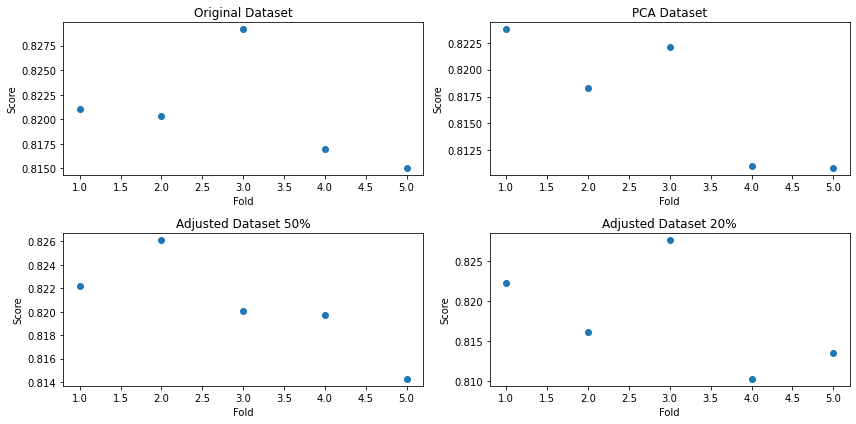

In [69]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(performance_og['Fold'], performance_og['Score'])
axs[0,0].set_title("Original Dataset")
axs[0,1].scatter(performance_PCA['Fold'], performance_PCA['Score'])
axs[0,1].set_title("PCA Dataset")
axs[1,0].scatter(performance_5['Fold'], performance_5['Score'])
axs[1,0].set_title("Adjusted Dataset 50%")
axs[1,1].scatter(performance_2['Fold'], performance_2['Score'])
axs[1,1].set_title("Adjusted Dataset 20%")


for ax in axs.flat:
    ax.set(xlabel = 'Fold', ylabel = 'Score')
    
fig.tight_layout()
plt.show()

### 6.2.3 GridSearch using Accuracy

In [70]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

In [71]:
###### PCA DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

In [72]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

In [73]:
###### ADJUSTED DATASET 20% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

In [74]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        DecisionTreeClassifier(max_depth=5, max_leaf_n...   
PCA (Original Dataset)  DecisionTreeClassifier(criterion='entropy', ma...   
Adjusted Dataset(50%)   DecisionTreeClassifier(max_depth=4, max_leaf_n...   
Adjusted Dataset(20%)   DecisionTreeClassifier(criterion='entropy', ma...   

                        Accuracy  F1 Score   TP    TN   FP   FN  
Original Dataset        0.817833  0.471725  488  4419  268  825  
PCA (Original Dataset)  0.808333  0.448177  467  4383  304  846  
Adjusted Dataset(50%)   0.887203  0.422265  220  4515  173  429  
Adjusted Dataset(20%)   0.946548       0.0    0  4675    0  264

#### Checking Feature Importance & Mutual Info

In [75]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [76]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

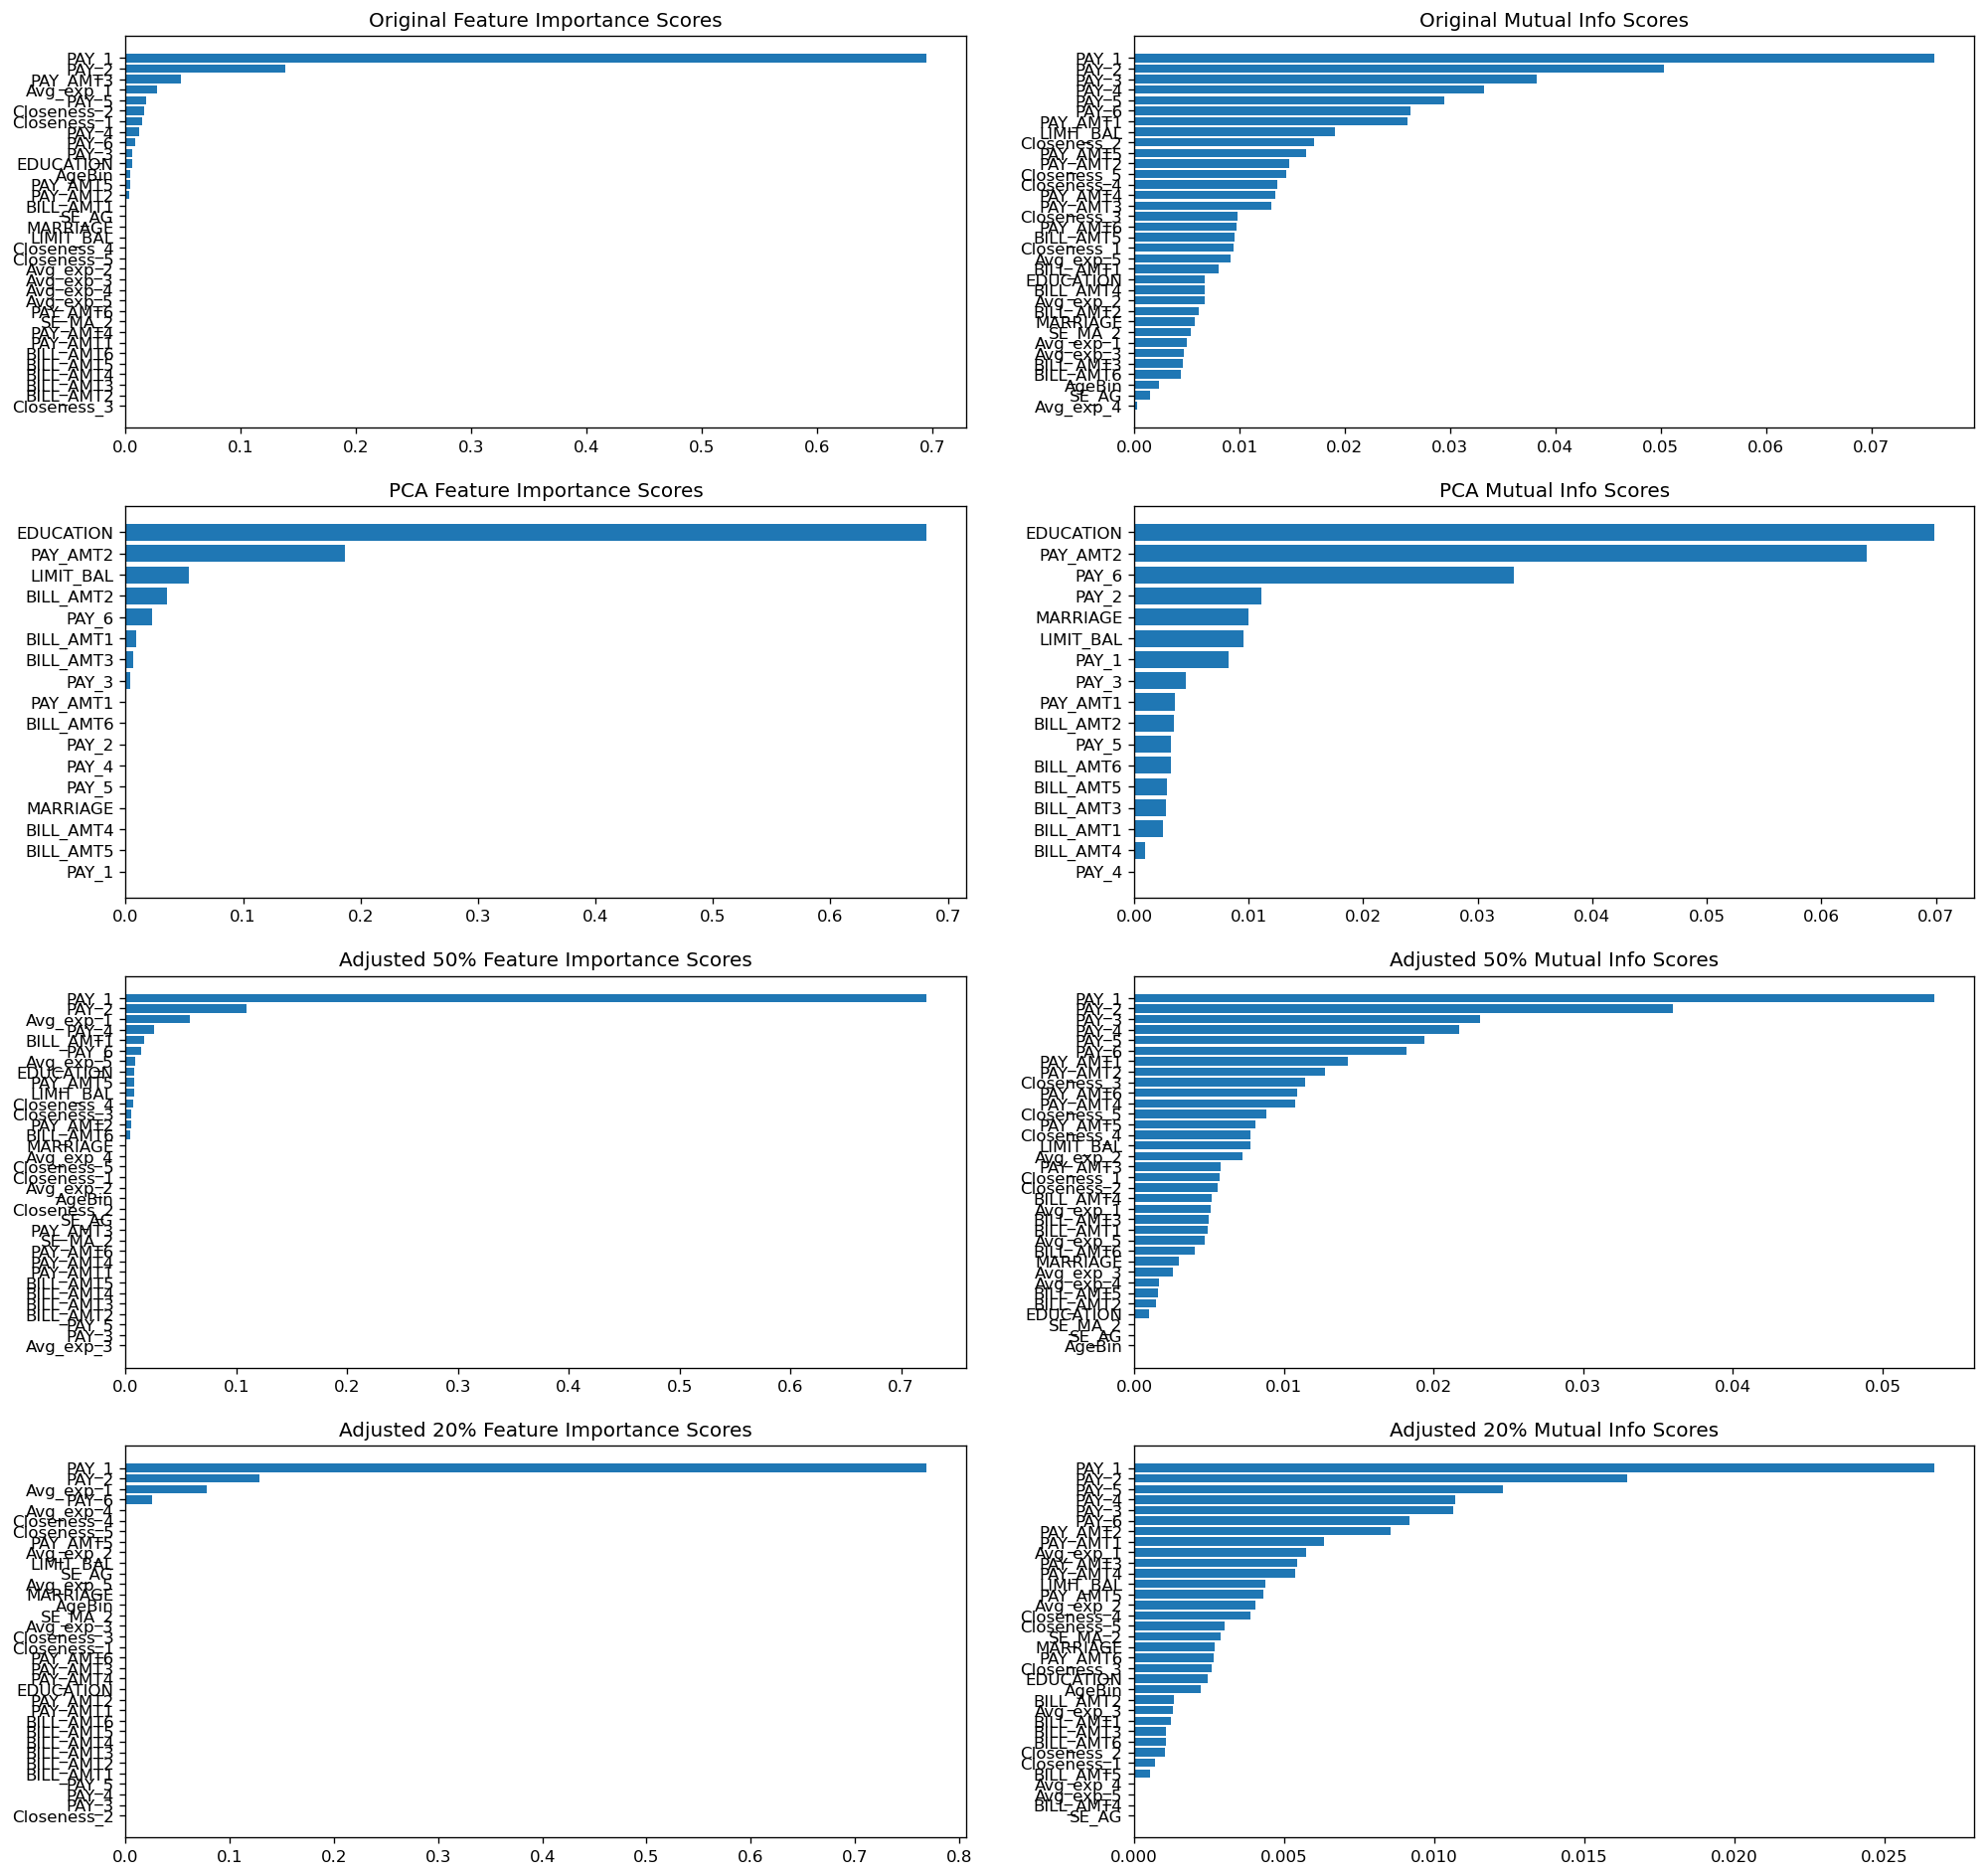

In [77]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

### 6.2.4 GridSearch using F1 Score

Retrying with different f1 metrics rather than accuracy:

In [78]:
###### ORIGINAL DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'f1')
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

In [79]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'f1')
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

In [108]:
###### ADJUSTED DATASET 50% #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 224 candidates, totalling 1120 fits
[CV 1/5; 1/224] START criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2
[CV 1/5; 1/224] END criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV 2/5; 1/224] START criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2
[CV 2/5; 1/224] END criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV 3/5; 1/224] START criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2
[CV 3/5; 1/224] END criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV 4/5; 1/224] START criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2
[CV 4/5; 1/224] END criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2; total time=   0.0s
[CV 5/5; 1/224] START criterion=gini, max_depth=3, max_leaf_nodes=5, min_samples_split=2
[CV 5/5; 1/224] END criterion=gini, max_depth=3, max_leaf_nodes

[CV 2/5; 9/224] END criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV 3/5; 9/224] START criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=2
[CV 3/5; 9/224] END criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV 4/5; 9/224] START criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=2
[CV 4/5; 9/224] END criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV 5/5; 9/224] START criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=2
[CV 5/5; 9/224] END criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=2; total time=   0.0s
[CV 1/5; 10/224] START criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=5
[CV 1/5; 10/224] END criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=5; total time=   0.0s
[CV 2/5; 10/224] START criterion=gini, max_depth=3, max_leaf_nodes=20, min_samples_split=5
[CV 2/5

[CV 4/5; 17/224] END criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=2; total time=   0.1s
[CV 5/5; 17/224] START criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=2
[CV 5/5; 17/224] END criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=2; total time=   0.1s
[CV 1/5; 18/224] START criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=5
[CV 1/5; 18/224] END criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV 2/5; 18/224] START criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=5
[CV 2/5; 18/224] END criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV 3/5; 18/224] START criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=5
[CV 3/5; 18/224] END criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 18/224] START criterion=gini, max_depth=4, max_leaf_nodes=5, min_samples_split=5
[CV 4/5; 1

[CV 5/5; 25/224] END criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=2; total time=   0.1s
[CV 1/5; 26/224] START criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5
[CV 1/5; 26/224] END criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5; total time=   0.1s
[CV 2/5; 26/224] START criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5
[CV 2/5; 26/224] END criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5; total time=   0.1s
[CV 3/5; 26/224] START criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5
[CV 3/5; 26/224] END criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5; total time=   0.1s
[CV 4/5; 26/224] START criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5
[CV 4/5; 26/224] END criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5; total time=   0.1s
[CV 5/5; 26/224] START criterion=gini, max_depth=4, max_leaf_nodes=20, min_samples_split=5


[CV 2/5; 34/224] END criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=5; total time=   0.1s
[CV 3/5; 34/224] START criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=5
[CV 3/5; 34/224] END criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=5; total time=   0.0s
[CV 4/5; 34/224] START criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=5
[CV 4/5; 34/224] END criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=5; total time=   0.1s
[CV 5/5; 34/224] START criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=5
[CV 5/5; 34/224] END criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=5; total time=   0.1s
[CV 1/5; 35/224] START criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=10
[CV 1/5; 35/224] END criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 2/5; 35/224] START criterion=gini, max_depth=5, max_leaf_nodes=5, min_samples_split=10
[CV 2/5

[CV 3/5; 42/224] END criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=5; total time=   0.1s
[CV 4/5; 42/224] START criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=5
[CV 4/5; 42/224] END criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=5; total time=   0.1s
[CV 5/5; 42/224] START criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=5
[CV 5/5; 42/224] END criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=5; total time=   0.1s
[CV 1/5; 43/224] START criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=10
[CV 1/5; 43/224] END criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=10; total time=   0.1s
[CV 2/5; 43/224] START criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=10
[CV 2/5; 43/224] END criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_split=10; total time=   0.1s
[CV 3/5; 43/224] START criterion=gini, max_depth=5, max_leaf_nodes=20, min_samples_spli

[CV 4/5; 50/224] END criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=5; total time=   0.1s
[CV 5/5; 50/224] START criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=5
[CV 5/5; 50/224] END criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=5; total time=   0.1s
[CV 1/5; 51/224] START criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=10
[CV 1/5; 51/224] END criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 2/5; 51/224] START criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=10
[CV 2/5; 51/224] END criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 3/5; 51/224] START criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=10
[CV 3/5; 51/224] END criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 4/5; 51/224] START criterion=gini, max_depth=6, max_leaf_nodes=5, min_samples_split=10
[CV

[CV 5/5; 58/224] END criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=5; total time=   0.1s
[CV 1/5; 59/224] START criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=10
[CV 1/5; 59/224] END criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=10; total time=   0.2s
[CV 2/5; 59/224] START criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=10
[CV 2/5; 59/224] END criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=10; total time=   0.1s
[CV 3/5; 59/224] START criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=10
[CV 3/5; 59/224] END criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=10; total time=   0.2s
[CV 4/5; 59/224] START criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=10
[CV 4/5; 59/224] END criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_split=10; total time=   0.1s
[CV 5/5; 59/224] START criterion=gini, max_depth=6, max_leaf_nodes=20, min_samples_

[CV 2/5; 67/224] END criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 3/5; 67/224] START criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=10
[CV 3/5; 67/224] END criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 4/5; 67/224] START criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=10
[CV 4/5; 67/224] END criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 5/5; 67/224] START criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=10
[CV 5/5; 67/224] END criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 1/5; 68/224] START criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=20
[CV 1/5; 68/224] END criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 2/5; 68/224] START criterion=gini, max_depth=7, max_leaf_nodes=5, min_samples_split=20


[CV 3/5; 75/224] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=10; total time=   0.1s
[CV 4/5; 75/224] START criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=10
[CV 4/5; 75/224] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=10; total time=   0.2s
[CV 5/5; 75/224] START criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=10
[CV 5/5; 75/224] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=10; total time=   0.1s
[CV 1/5; 76/224] START criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=20
[CV 1/5; 76/224] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 2/5; 76/224] START criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=20
[CV 2/5; 76/224] END criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 3/5; 76/224] START criterion=gini, max_depth=7, max_leaf_nodes=20, min_samples

[CV 4/5; 83/224] END criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 5/5; 83/224] START criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=10
[CV 5/5; 83/224] END criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=10; total time=   0.1s
[CV 1/5; 84/224] START criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=20
[CV 1/5; 84/224] END criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 2/5; 84/224] START criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=20
[CV 2/5; 84/224] END criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 3/5; 84/224] START criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 84/224] END criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 4/5; 84/224] START criterion=gini, max_depth=8, max_leaf_nodes=5, min_samples_split=20


[CV 5/5; 91/224] END criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=10; total time=   0.2s
[CV 1/5; 92/224] START criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=20
[CV 1/5; 92/224] END criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 2/5; 92/224] START criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=20
[CV 2/5; 92/224] END criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 3/5; 92/224] START criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 92/224] END criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 4/5; 92/224] START criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 92/224] END criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 5/5; 92/224] START criterion=gini, max_depth=8, max_leaf_nodes=20, min_samples

[CV 1/5; 100/224] END criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 2/5; 100/224] START criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20
[CV 2/5; 100/224] END criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 3/5; 100/224] START criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 100/224] END criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 4/5; 100/224] START criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20
[CV 4/5; 100/224] END criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 5/5; 100/224] START criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20
[CV 5/5; 100/224] END criterion=gini, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 1/5; 101/224] START criterion=gini, max_depth=9, max_leaf_nodes=10, min_sample

[CV 2/5; 108/224] END criterion=gini, max_depth=9, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 3/5; 108/224] START criterion=gini, max_depth=9, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 108/224] END criterion=gini, max_depth=9, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 4/5; 108/224] START criterion=gini, max_depth=9, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 108/224] END criterion=gini, max_depth=9, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 5/5; 108/224] START criterion=gini, max_depth=9, max_leaf_nodes=20, min_samples_split=20
[CV 5/5; 108/224] END criterion=gini, max_depth=9, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 1/5; 109/224] START criterion=gini, max_depth=9, max_leaf_nodes=100, min_samples_split=2
[CV 1/5; 109/224] END criterion=gini, max_depth=9, max_leaf_nodes=100, min_samples_split=2; total time=   0.2s
[CV 2/5; 109/224] START criterion=gini, max_depth=9, max_leaf_nodes=100, 

[CV 2/5; 116/224] END criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 3/5; 116/224] START criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 116/224] END criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 4/5; 116/224] START criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=20
[CV 4/5; 116/224] END criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 5/5; 116/224] START criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=20
[CV 5/5; 116/224] END criterion=entropy, max_depth=3, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 1/5; 117/224] START criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_split=2
[CV 1/5; 117/224] END criterion=entropy, max_depth=3, max_leaf_nodes=10, min_samples_split=2; total time=   0.1s
[CV 2/5; 117/224] START criterion=entropy, max_depth=3,

[CV 2/5; 124/224] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 3/5; 124/224] START criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 124/224] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 4/5; 124/224] START criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 124/224] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 5/5; 124/224] START criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_split=20
[CV 5/5; 124/224] END criterion=entropy, max_depth=3, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 1/5; 125/224] START criterion=entropy, max_depth=3, max_leaf_nodes=100, min_samples_split=2
[CV 1/5; 125/224] END criterion=entropy, max_depth=3, max_leaf_nodes=100, min_samples_split=2; total time=   0.1s
[CV 2/5; 125/224] START criterion=entropy, max

[CV 2/5; 132/224] END criterion=entropy, max_depth=4, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 3/5; 132/224] START criterion=entropy, max_depth=4, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 132/224] END criterion=entropy, max_depth=4, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 4/5; 132/224] START criterion=entropy, max_depth=4, max_leaf_nodes=5, min_samples_split=20
[CV 4/5; 132/224] END criterion=entropy, max_depth=4, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 5/5; 132/224] START criterion=entropy, max_depth=4, max_leaf_nodes=5, min_samples_split=20
[CV 5/5; 132/224] END criterion=entropy, max_depth=4, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 1/5; 133/224] START criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_split=2
[CV 1/5; 133/224] END criterion=entropy, max_depth=4, max_leaf_nodes=10, min_samples_split=2; total time=   0.1s
[CV 2/5; 133/224] START criterion=entropy, max_depth=4,

[CV 2/5; 140/224] END criterion=entropy, max_depth=4, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 3/5; 140/224] START criterion=entropy, max_depth=4, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 140/224] END criterion=entropy, max_depth=4, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 4/5; 140/224] START criterion=entropy, max_depth=4, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 140/224] END criterion=entropy, max_depth=4, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 5/5; 140/224] START criterion=entropy, max_depth=4, max_leaf_nodes=20, min_samples_split=20
[CV 5/5; 140/224] END criterion=entropy, max_depth=4, max_leaf_nodes=20, min_samples_split=20; total time=   0.1s
[CV 1/5; 141/224] START criterion=entropy, max_depth=4, max_leaf_nodes=100, min_samples_split=2
[CV 1/5; 141/224] END criterion=entropy, max_depth=4, max_leaf_nodes=100, min_samples_split=2; total time=   0.2s
[CV 2/5; 141/224] START criterion=entropy, max

[CV 2/5; 148/224] END criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 3/5; 148/224] START criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 148/224] END criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 4/5; 148/224] START criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=20
[CV 4/5; 148/224] END criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 5/5; 148/224] START criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=20
[CV 5/5; 148/224] END criterion=entropy, max_depth=5, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 1/5; 149/224] START criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_split=2
[CV 1/5; 149/224] END criterion=entropy, max_depth=5, max_leaf_nodes=10, min_samples_split=2; total time=   0.2s
[CV 2/5; 149/224] START criterion=entropy, max_depth=5,

[CV 2/5; 156/224] END criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 3/5; 156/224] START criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 156/224] END criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 4/5; 156/224] START criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 156/224] END criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 5/5; 156/224] START criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_split=20
[CV 5/5; 156/224] END criterion=entropy, max_depth=5, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 1/5; 157/224] START criterion=entropy, max_depth=5, max_leaf_nodes=100, min_samples_split=2
[CV 1/5; 157/224] END criterion=entropy, max_depth=5, max_leaf_nodes=100, min_samples_split=2; total time=   0.2s
[CV 2/5; 157/224] START criterion=entropy, max

[CV 2/5; 164/224] END criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 3/5; 164/224] START criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 164/224] END criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 4/5; 164/224] START criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=20
[CV 4/5; 164/224] END criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 5/5; 164/224] START criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=20
[CV 5/5; 164/224] END criterion=entropy, max_depth=6, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 1/5; 165/224] START criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_split=2
[CV 1/5; 165/224] END criterion=entropy, max_depth=6, max_leaf_nodes=10, min_samples_split=2; total time=   0.2s
[CV 2/5; 165/224] START criterion=entropy, max_depth=6,

[CV 2/5; 172/224] END criterion=entropy, max_depth=6, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 3/5; 172/224] START criterion=entropy, max_depth=6, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 172/224] END criterion=entropy, max_depth=6, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 4/5; 172/224] START criterion=entropy, max_depth=6, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 172/224] END criterion=entropy, max_depth=6, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 5/5; 172/224] START criterion=entropy, max_depth=6, max_leaf_nodes=20, min_samples_split=20
[CV 5/5; 172/224] END criterion=entropy, max_depth=6, max_leaf_nodes=20, min_samples_split=20; total time=   0.3s
[CV 1/5; 173/224] START criterion=entropy, max_depth=6, max_leaf_nodes=100, min_samples_split=2
[CV 1/5; 173/224] END criterion=entropy, max_depth=6, max_leaf_nodes=100, min_samples_split=2; total time=   0.3s
[CV 2/5; 173/224] START criterion=entropy, max

[CV 2/5; 180/224] END criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 3/5; 180/224] START criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 180/224] END criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 4/5; 180/224] START criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=20
[CV 4/5; 180/224] END criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 5/5; 180/224] START criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=20
[CV 5/5; 180/224] END criterion=entropy, max_depth=7, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 1/5; 181/224] START criterion=entropy, max_depth=7, max_leaf_nodes=10, min_samples_split=2
[CV 1/5; 181/224] END criterion=entropy, max_depth=7, max_leaf_nodes=10, min_samples_split=2; total time=   0.2s
[CV 2/5; 181/224] START criterion=entropy, max_depth=7,

[CV 2/5; 188/224] END criterion=entropy, max_depth=7, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 3/5; 188/224] START criterion=entropy, max_depth=7, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 188/224] END criterion=entropy, max_depth=7, max_leaf_nodes=20, min_samples_split=20; total time=   0.3s
[CV 4/5; 188/224] START criterion=entropy, max_depth=7, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 188/224] END criterion=entropy, max_depth=7, max_leaf_nodes=20, min_samples_split=20; total time=   0.3s
[CV 5/5; 188/224] START criterion=entropy, max_depth=7, max_leaf_nodes=20, min_samples_split=20
[CV 5/5; 188/224] END criterion=entropy, max_depth=7, max_leaf_nodes=20, min_samples_split=20; total time=   0.2s
[CV 1/5; 189/224] START criterion=entropy, max_depth=7, max_leaf_nodes=100, min_samples_split=2
[CV 1/5; 189/224] END criterion=entropy, max_depth=7, max_leaf_nodes=100, min_samples_split=2; total time=   0.3s
[CV 2/5; 189/224] START criterion=entropy, max

[CV 2/5; 196/224] END criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 3/5; 196/224] START criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 196/224] END criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 4/5; 196/224] START criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=20
[CV 4/5; 196/224] END criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 5/5; 196/224] START criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=20
[CV 5/5; 196/224] END criterion=entropy, max_depth=8, max_leaf_nodes=5, min_samples_split=20; total time=   0.1s
[CV 1/5; 197/224] START criterion=entropy, max_depth=8, max_leaf_nodes=10, min_samples_split=2
[CV 1/5; 197/224] END criterion=entropy, max_depth=8, max_leaf_nodes=10, min_samples_split=2; total time=   0.2s
[CV 2/5; 197/224] START criterion=entropy, max_depth=8,

[CV 2/5; 204/224] END criterion=entropy, max_depth=8, max_leaf_nodes=20, min_samples_split=20; total time=   0.4s
[CV 3/5; 204/224] START criterion=entropy, max_depth=8, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 204/224] END criterion=entropy, max_depth=8, max_leaf_nodes=20, min_samples_split=20; total time=   0.4s
[CV 4/5; 204/224] START criterion=entropy, max_depth=8, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 204/224] END criterion=entropy, max_depth=8, max_leaf_nodes=20, min_samples_split=20; total time=   0.4s
[CV 5/5; 204/224] START criterion=entropy, max_depth=8, max_leaf_nodes=20, min_samples_split=20
[CV 5/5; 204/224] END criterion=entropy, max_depth=8, max_leaf_nodes=20, min_samples_split=20; total time=   0.4s
[CV 1/5; 205/224] START criterion=entropy, max_depth=8, max_leaf_nodes=100, min_samples_split=2
[CV 1/5; 205/224] END criterion=entropy, max_depth=8, max_leaf_nodes=100, min_samples_split=2; total time=   0.5s
[CV 2/5; 205/224] START criterion=entropy, max

[CV 2/5; 212/224] END criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 3/5; 212/224] START criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=20
[CV 3/5; 212/224] END criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 4/5; 212/224] START criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=20
[CV 4/5; 212/224] END criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.2s
[CV 5/5; 212/224] START criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=20
[CV 5/5; 212/224] END criterion=entropy, max_depth=9, max_leaf_nodes=5, min_samples_split=20; total time=   0.3s
[CV 1/5; 213/224] START criterion=entropy, max_depth=9, max_leaf_nodes=10, min_samples_split=2
[CV 1/5; 213/224] END criterion=entropy, max_depth=9, max_leaf_nodes=10, min_samples_split=2; total time=   0.3s
[CV 2/5; 213/224] START criterion=entropy, max_depth=9,

[CV 2/5; 220/224] END criterion=entropy, max_depth=9, max_leaf_nodes=20, min_samples_split=20; total time=   0.4s
[CV 3/5; 220/224] START criterion=entropy, max_depth=9, max_leaf_nodes=20, min_samples_split=20
[CV 3/5; 220/224] END criterion=entropy, max_depth=9, max_leaf_nodes=20, min_samples_split=20; total time=   0.3s
[CV 4/5; 220/224] START criterion=entropy, max_depth=9, max_leaf_nodes=20, min_samples_split=20
[CV 4/5; 220/224] END criterion=entropy, max_depth=9, max_leaf_nodes=20, min_samples_split=20; total time=   0.4s
[CV 5/5; 220/224] START criterion=entropy, max_depth=9, max_leaf_nodes=20, min_samples_split=20
[CV 5/5; 220/224] END criterion=entropy, max_depth=9, max_leaf_nodes=20, min_samples_split=20; total time=   0.4s
[CV 1/5; 221/224] START criterion=entropy, max_depth=9, max_leaf_nodes=100, min_samples_split=2
[CV 1/5; 221/224] END criterion=entropy, max_depth=9, max_leaf_nodes=100, min_samples_split=2; total time=   0.5s
[CV 2/5; 221/224] START criterion=entropy, max

In [118]:
X_set = X_test_adj5.copy()
y_set = (pd.DataFrame(pred_5, columns = ['def_pay'])).copy()
set = X_set.join(y_set)
set['def_pay'] = set['def_pay'].fillna(0)

'''set_1 = set[set['PAY_1'] == 1.0]
pd.DataFrame(set_1['PAY_1'].describe())

set_0 = set[set['PAY_1'] == 0.0]
pd.DataFrame(set_0['PAY_1'].describe())'''

"set_1 = set[set['labels'] == 1.0]\nset_1[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()\n\nset_0 = set[set['labels'] == 0.0]\nset_0[['PctExtNullSelfRedirectHyperlinksRT','PctExtHyperlinks']].describe()"

In [123]:
set_1 = set[set['def_pay'] == 1.0]
pd.DataFrame(set_1['PAY_1'].describe())

PAY_1
count  81.000000
mean    0.283951
std     0.617142
min     0.000000
25%     0.000000
50%     0.000000
75%     0.000000
max     2.000000

In [125]:
set_0 = set[set['def_pay'] == 0.0]
pd.DataFrame(set_0['PAY_1'].describe())

PAY_1
count  5256.000000
mean      0.285008
std       0.662874
min       0.000000
25%       0.000000
50%       0.000000
75%       0.000000
max       8.000000

In [81]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             'max_leaf_nodes': [5,10,20,100],
             'min_samples_split': [2, 5, 10, 20]}
# create the grid
grid_tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5,
                         scoring= 'f1')
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

In [82]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        DecisionTreeClassifier(max_depth=5, max_leaf_n...   
PCA (Original Dataset)  DecisionTreeClassifier(max_depth=4, max_leaf_n...   
Adjusted Dataset(50%)   DecisionTreeClassifier(max_depth=4, max_leaf_n...   
Adjusted Dataset(20%)   DecisionTreeClassifier(max_depth=9, max_leaf_n...   

                        Accuracy  F1 Score   TP    TN   FP   FN  
Original Dataset        0.817833  0.471725  488  4419  268  825  
PCA (Original Dataset)  0.802167  0.471269  529  4284  403  784  
Adjusted Dataset(50%)   0.883642  0.424467  229  4487  201  420  
Adjusted Dataset(20%)   0.939056  0.137536   24  4614   61  240

#### Checking Feature Importance & Mutual Info

In [83]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [84]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

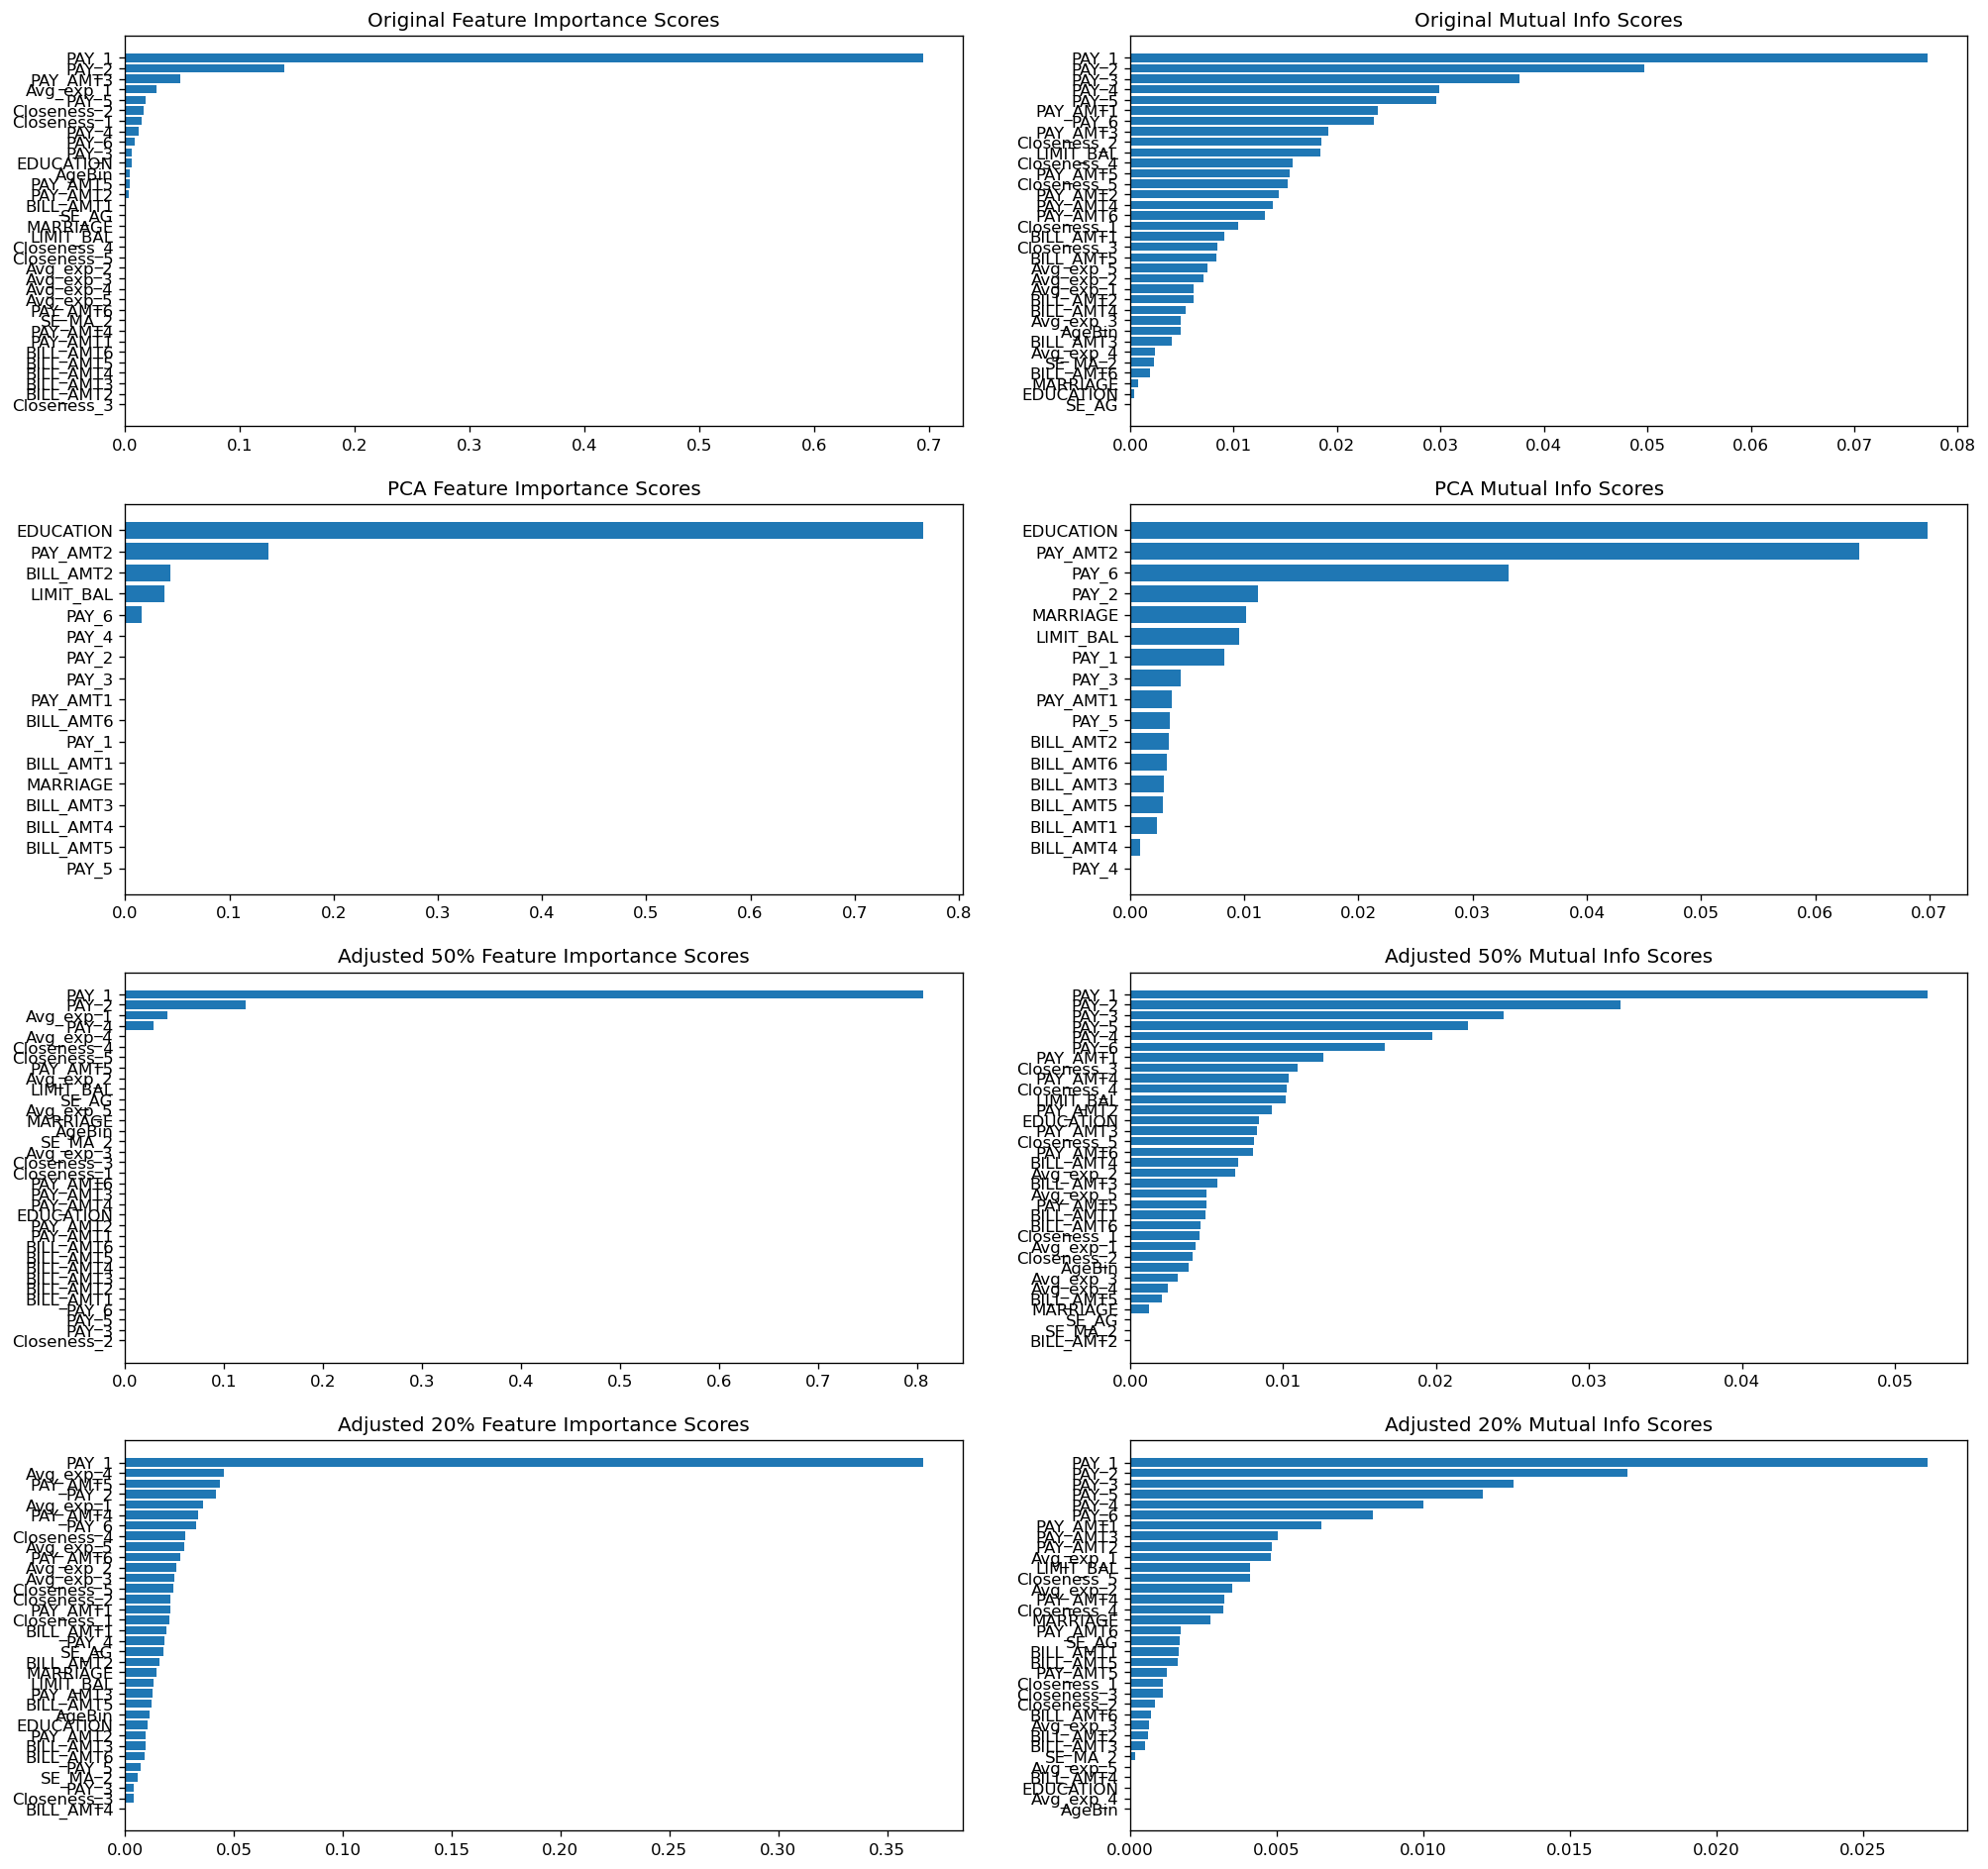

In [85]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

#### Exploring Statistical Distribution between the Classes

In [69]:
X_dt = X_test.copy()
y_dt = (pd.DataFrame(predictions, columns = ['def_pay'])).copy()
dt = X_dt.join(y_dt)
dt['def_pay'] = dt['def_pay'].fillna(0)
dt

LIMIT_BAL  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
2308     30000.0          2         2      0      0      0      0      0   
22404   150000.0          1         2      0      0      0      0      0   
23397    70000.0          3         1      0      0      0      0      0   
25058   130000.0          3         2      0      0      0      0      0   
2664     50000.0          2         2      0      0      0      0      0   
...          ...        ...       ...    ...    ...    ...    ...    ...   
2210    360000.0          1         2      1      0      0      0      0   
14144   500000.0          1         2      2      0      0      2      0   
23108    60000.0          1         1      0      0      0      0      0   
25703    20000.0          1         2      1      0      0      0      0   
29171   510000.0          3         1      0      0      0      2      0   

       PAY_6  BILL_AMT1  ...  Avg_exp_4  Avg_exp_3  Avg_exp_2  Avg_exp_1  \
2308       0     8864.0  ...   0.012533   0.013922   0.014450   0.013573   
22404      0   136736.0  ...   0.098777   0.106438   0.101832   0.102227   
23397      0    70122.0  ...   0.031993   0.029790   0.035421   0.038260   
25058      0    20678.0  ...   0.065354   0.059692   0.053600   0.048006   
2664       2    94228.0  ...   0.019350   0.171480   0.162480   0.324356   
...      ...        ...  ...        ...        ...        ...        ...   
2210       0        0.0  ...   0.001765   0.001945   0.001459   0.001167   
14144      0    98541.0  ...   0.005158   0.025852   0.021146   0.017912   
23108      2    46233.0  ...   0.015200   0.014639   0.015425   0.015907   
25703      0        0.0  ...   0.049100   0.098950   0.105387   0.084310   
29171      0   187070.0  ...   0.014911   0.017197   0.015755   0.018031   

       Closeness_5  Closeness_4  Closeness_3  Closeness_2  Closeness_1  \
2308      0.542800     0.580667     0.613967     0.664600     0.704533   
22404     0.481727     0.322793     0.222107     0.162327     0.088427   
23397    -0.001586     0.003529     0.021000     0.013143    -0.001743   
25058     0.913569     0.870015     0.875600     0.854185     0.840938   
2664      0.594100     0.608520     0.152780     0.047300    -0.884560   
...            ...          ...          ...          ...          ...   
2210      0.996469     1.000000     0.997694     1.000000     1.000000   
14144     0.843248     0.843860     0.776620     0.795896     0.802918   
23108     0.132583     0.160250     0.188400     0.212283     0.229450   
25703     0.970000     0.931800     0.801650     0.875300     1.000000   
29171     0.650629     0.643527     0.621759     0.643661     0.633196   

       def_pay  
2308       0.0  
22404      0.0  
23397      0.0  
25058      0.0  
2664       1.0  
...        ...  
2210       0.0  
14144      0.0  
23108      0.0  
25703      0.0  
29171      0.0  

[6000 rows x 35 columns]

In [70]:
dt_1 = dt[dt['def_pay'] == 1.0]
dt_1.describe()

LIMIT_BAL   EDUCATION    MARRIAGE       PAY_1       PAY_2  \
count     289.000000  289.000000  289.000000  289.000000  289.000000   
mean   160069.204152    1.775087    1.612457    0.429066    0.352941   
std    131021.608374    0.727392    0.488034    0.765570    0.790569   
min     10000.000000    1.000000    1.000000    0.000000    0.000000   
25%     50000.000000    1.000000    1.000000    0.000000    0.000000   
50%    130000.000000    2.000000    2.000000    0.000000    0.000000   
75%    210000.000000    2.000000    2.000000    1.000000    0.000000   
max    710000.000000    4.000000    2.000000    4.000000    3.000000   

            PAY_3       PAY_4       PAY_5       PAY_6      BILL_AMT1  ...  \
count  289.000000  289.000000  289.000000  289.000000     289.000000  ...   
mean     0.307958    0.224913    0.294118    0.301038   44565.283737  ...   
std      0.892857    0.825759    0.901388    0.887431   64811.965797  ...   
min      0.000000    0.000000    0.000000    0.000000   -2000.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    2343.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000   18590.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000   57171.000000  ...   
max      7.000000    7.000000    7.000000    7.000000  440474.000000  ...   

        Avg_exp_4   Avg_exp_3   Avg_exp_2   Avg_exp_1  Closeness_5  \
count  289.000000  289.000000  289.000000  289.000000   289.000000   
mean     0.060930    0.064807    0.064133    0.061563     0.649948   
std      0.111966    0.095865    0.087951    0.076520     0.351861   
min      0.000000    0.000000    0.000000    0.000000    -0.113250   
25%      0.005538    0.006367    0.007475    0.009469     0.361511   
50%      0.018050    0.025950    0.025589    0.028927     0.758482   
75%      0.052770    0.082823    0.089036    0.087640     0.993886   
max      0.812575    0.547917    0.478137    0.408470     1.011715   

       Closeness_4  Closeness_3  Closeness_2  Closeness_1  def_pay  
count   289.000000   289.000000   289.000000   289.000000    289.0  
mean      0.640317     0.601539     0.581030     0.575704      1.0  
std       0.359396     0.378201     0.392377     0.407638      0.0  
min      -0.085306    -0.084969    -0.074315    -0.884560      1.0  
25%       0.322511     0.258080     0.184280     0.158300      1.0  
50%       0.734811     0.674060     0.638012     0.690667      1.0  
75%       0.992477     0.993050     0.991919     0.983494      1.0  
max       1.011715     1.016856     1.005500     1.020000      1.0  

[8 rows x 35 columns]

In [71]:
dt_0 = dt[dt['def_pay'] == 0.0]
dt_0.describe()

LIMIT_BAL    EDUCATION     MARRIAGE        PAY_1        PAY_2  \
count    5711.000000  5711.000000  5711.000000  5711.000000  5711.000000   
mean   168942.391875     1.843635     1.555419     0.349676     0.312905   
std    129739.204962     0.740541     0.519701     0.746820     0.793564   
min     10000.000000     1.000000     1.000000     0.000000     0.000000   
25%     50000.000000     1.000000     1.000000     0.000000     0.000000   
50%    140000.000000     2.000000     2.000000     0.000000     0.000000   
75%    240000.000000     2.000000     2.000000     0.000000     0.000000   
max    800000.000000     4.000000     3.000000     8.000000     7.000000   

             PAY_3        PAY_4        PAY_5        PAY_6      BILL_AMT1  ...  \
count  5711.000000  5711.000000  5711.000000  5711.000000    5711.000000  ...   
mean      0.313780     0.261250     0.217475     0.213623   52803.592716  ...   
std       0.806682     0.766439     0.710183     0.693651   75005.919115  ...   
min       0.000000     0.000000     0.000000     0.000000  -14386.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000    3822.500000  ...   
50%       0.000000     0.000000     0.000000     0.000000   22954.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000   70466.500000  ...   
max       8.000000     7.000000     7.000000     7.000000  653062.000000  ...   

         Avg_exp_4    Avg_exp_3    Avg_exp_2    Avg_exp_1  Closeness_5  \
count  5711.000000  5711.000000  5711.000000  5711.000000  5711.000000   
mean      0.056431     0.061203     0.061370     0.060837     0.667354   
std       0.102682     0.090876     0.079986     0.074088     0.346474   
min      -0.478475    -0.308550    -0.224100    -0.173410    -1.095400   
25%       0.006127     0.008061     0.009688     0.010643     0.398693   
50%       0.018800     0.023987     0.028638     0.031546     0.782608   
75%       0.055841     0.075154     0.084207     0.087255     0.989569   
max       1.562500     1.054667     0.827875     0.717800     1.876743   

       Closeness_4  Closeness_3  Closeness_2  Closeness_1  def_pay  
count  5711.000000  5711.000000  5711.000000  5711.000000   5711.0  
mean      0.638584     0.606204     0.587733     0.574657      0.0  
std       0.364578     0.391663     0.399896     0.406523      0.0  
min      -1.127690    -2.476050    -2.362950    -2.329950      0.0  
25%       0.330615     0.244137     0.192075     0.163656      0.0  
50%       0.749326     0.721040     0.701147     0.683252      0.0  
75%       0.985964     0.985030     0.981439     0.976876      0.0  
max       1.106700     1.119250     1.067715     1.071930      0.0  

[8 rows x 35 columns]

## 6.3 Random Forest

### 6.3.1 Blind Run

In [86]:
rf_classifier = RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

# Original Dataset
clf_og = rf_classifier.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

# PCA (Original Dataset)
clf_PCA = rf_classifier.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

# Adjusted Dataset(50%)
clf_5 = rf_classifier.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

# Adjusted Dataset(20%)
clf_2 = rf_classifier.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

In [87]:
pd.DataFrame(np.array([[acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Accuracy  F1 Score     TP      TN     FP     FN
Original Dataset        0.815167  0.453964  461.0  4430.0  257.0  852.0
PCA (Original Dataset)  0.810833  0.444988  455.0  4410.0  277.0  858.0
Adjusted Dataset(50%)   0.881956  0.285714  126.0  4581.0  107.0  523.0
Adjusted Dataset(20%)   0.942498  0.071895   11.0  4644.0   31.0  253.0

### 6.3.2 Cross Validating

In [88]:
###### Original Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    rf_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = rf_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_og = pd.DataFrame({'Score':scr,'Fold':fold})


###### PCA Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_PCA)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    rf_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = rf_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_PCA = pd.DataFrame({'Score':scr,'Fold':fold})


###### Adjusted Dataset 50% ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj5)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    rf_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = rf_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_5 = pd.DataFrame({'Score':scr,'Fold':fold})


##### Adjusted Dataset 20% #####
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj2)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    rf_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = rf_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_2 = pd.DataFrame({'Score':scr,'Fold':fold})

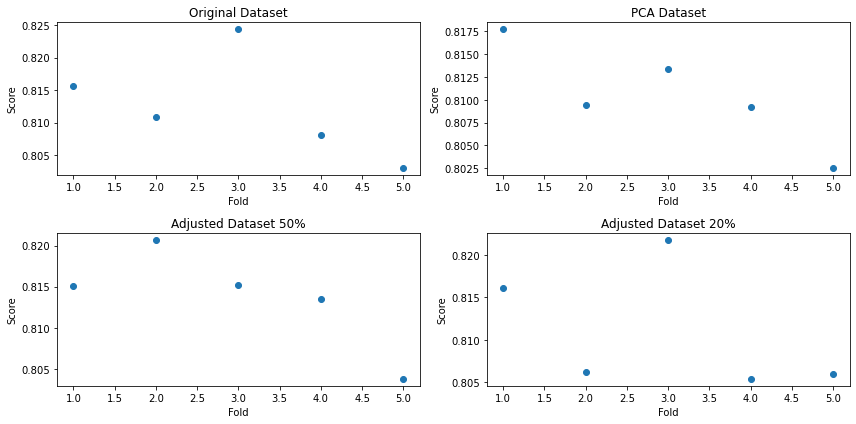

In [89]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(performance_og['Fold'], performance_og['Score'])
axs[0,0].set_title("Original Dataset")
axs[0,1].scatter(performance_PCA['Fold'], performance_PCA['Score'])
axs[0,1].set_title("PCA Dataset")
axs[1,0].scatter(performance_5['Fold'], performance_5['Score'])
axs[1,0].set_title("Adjusted Dataset 50%")
axs[1,1].scatter(performance_2['Fold'], performance_2['Score'])
axs[1,1].set_title("Adjusted Dataset 20%")


for ax in axs.flat:
    ax.set(xlabel = 'Fold', ylabel = 'Score')
    
fig.tight_layout()
plt.show()

### 6.3.3 GridSearch using Accuracy

In [92]:
###### ORIGINAL DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': np.arange(100,500, 100),
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.6s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.6s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.7s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.6s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.6s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   2.9s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.9s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.9s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.0s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.1s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.0s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   3.8s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   3.5s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.5s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.5s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.4s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.4s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.8s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.9s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.9s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.3s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.6s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.2s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.7s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.5s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.5s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.5s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.4s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   4.6s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [94]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': np.arange(100,500, 100),
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   2.0s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   2.0s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   2.0s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   2.1s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   2.1s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   2.9s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.0s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.9s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.0s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.0s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.1s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   5.2s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   5.4s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   5.3s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   5.4s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   5.4s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   5.4s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   5.0s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   4.9s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   5.0s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   6.0s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   5.9s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   5.9s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   8.6s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   8.6s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   8.6s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   8.4s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   8.8s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   8.4s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [95]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': np.arange(100,500, 100),
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.6s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.5s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.3s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.4s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.4s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   2.0s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.0s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.0s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.0s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.0s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.0s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   2.8s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   2.8s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.7s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.8s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.8s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.8s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.3s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.4s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.3s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.7s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.8s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   2.7s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.1s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.9s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.0s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.1s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.9s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   4.0s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [96]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': np.arange(100,500, 100),
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.1s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.0s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.0s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.1s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.1s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   1.9s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.8s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.9s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.8s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.8s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.8s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   2.6s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   2.5s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.6s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.6s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.5s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   2.6s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.0s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.9s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   2.8s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.4s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.2s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.3s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.7s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.8s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.6s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   5.1s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.7s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   4.7s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [98]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]], dtype=object),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        (DecisionTreeClassifier(max_depth=8, max_featu...   
PCA (Original Dataset)  (DecisionTreeClassifier(criterion='entropy', m...   
Adjusted Dataset(50%)   (DecisionTreeClassifier(criterion='entropy', m...   
Adjusted Dataset(20%)   (DecisionTreeClassifier(max_depth=9, max_featu...   

                        Accuracy  F1 Score   TP    TN   FP   FN  
Original Dataset          0.8205  0.446841  435  4488  199  878  
PCA (Original Dataset)  0.815333  0.449851  453  4439  248  860  
Adjusted Dataset(50%)   0.887203  0.265854  109  4626   62  540  
Adjusted Dataset(20%)   0.945738  0.042857    6  4665   10  258

#### Checking Feature Importance & Mutual Info

In [99]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [100]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

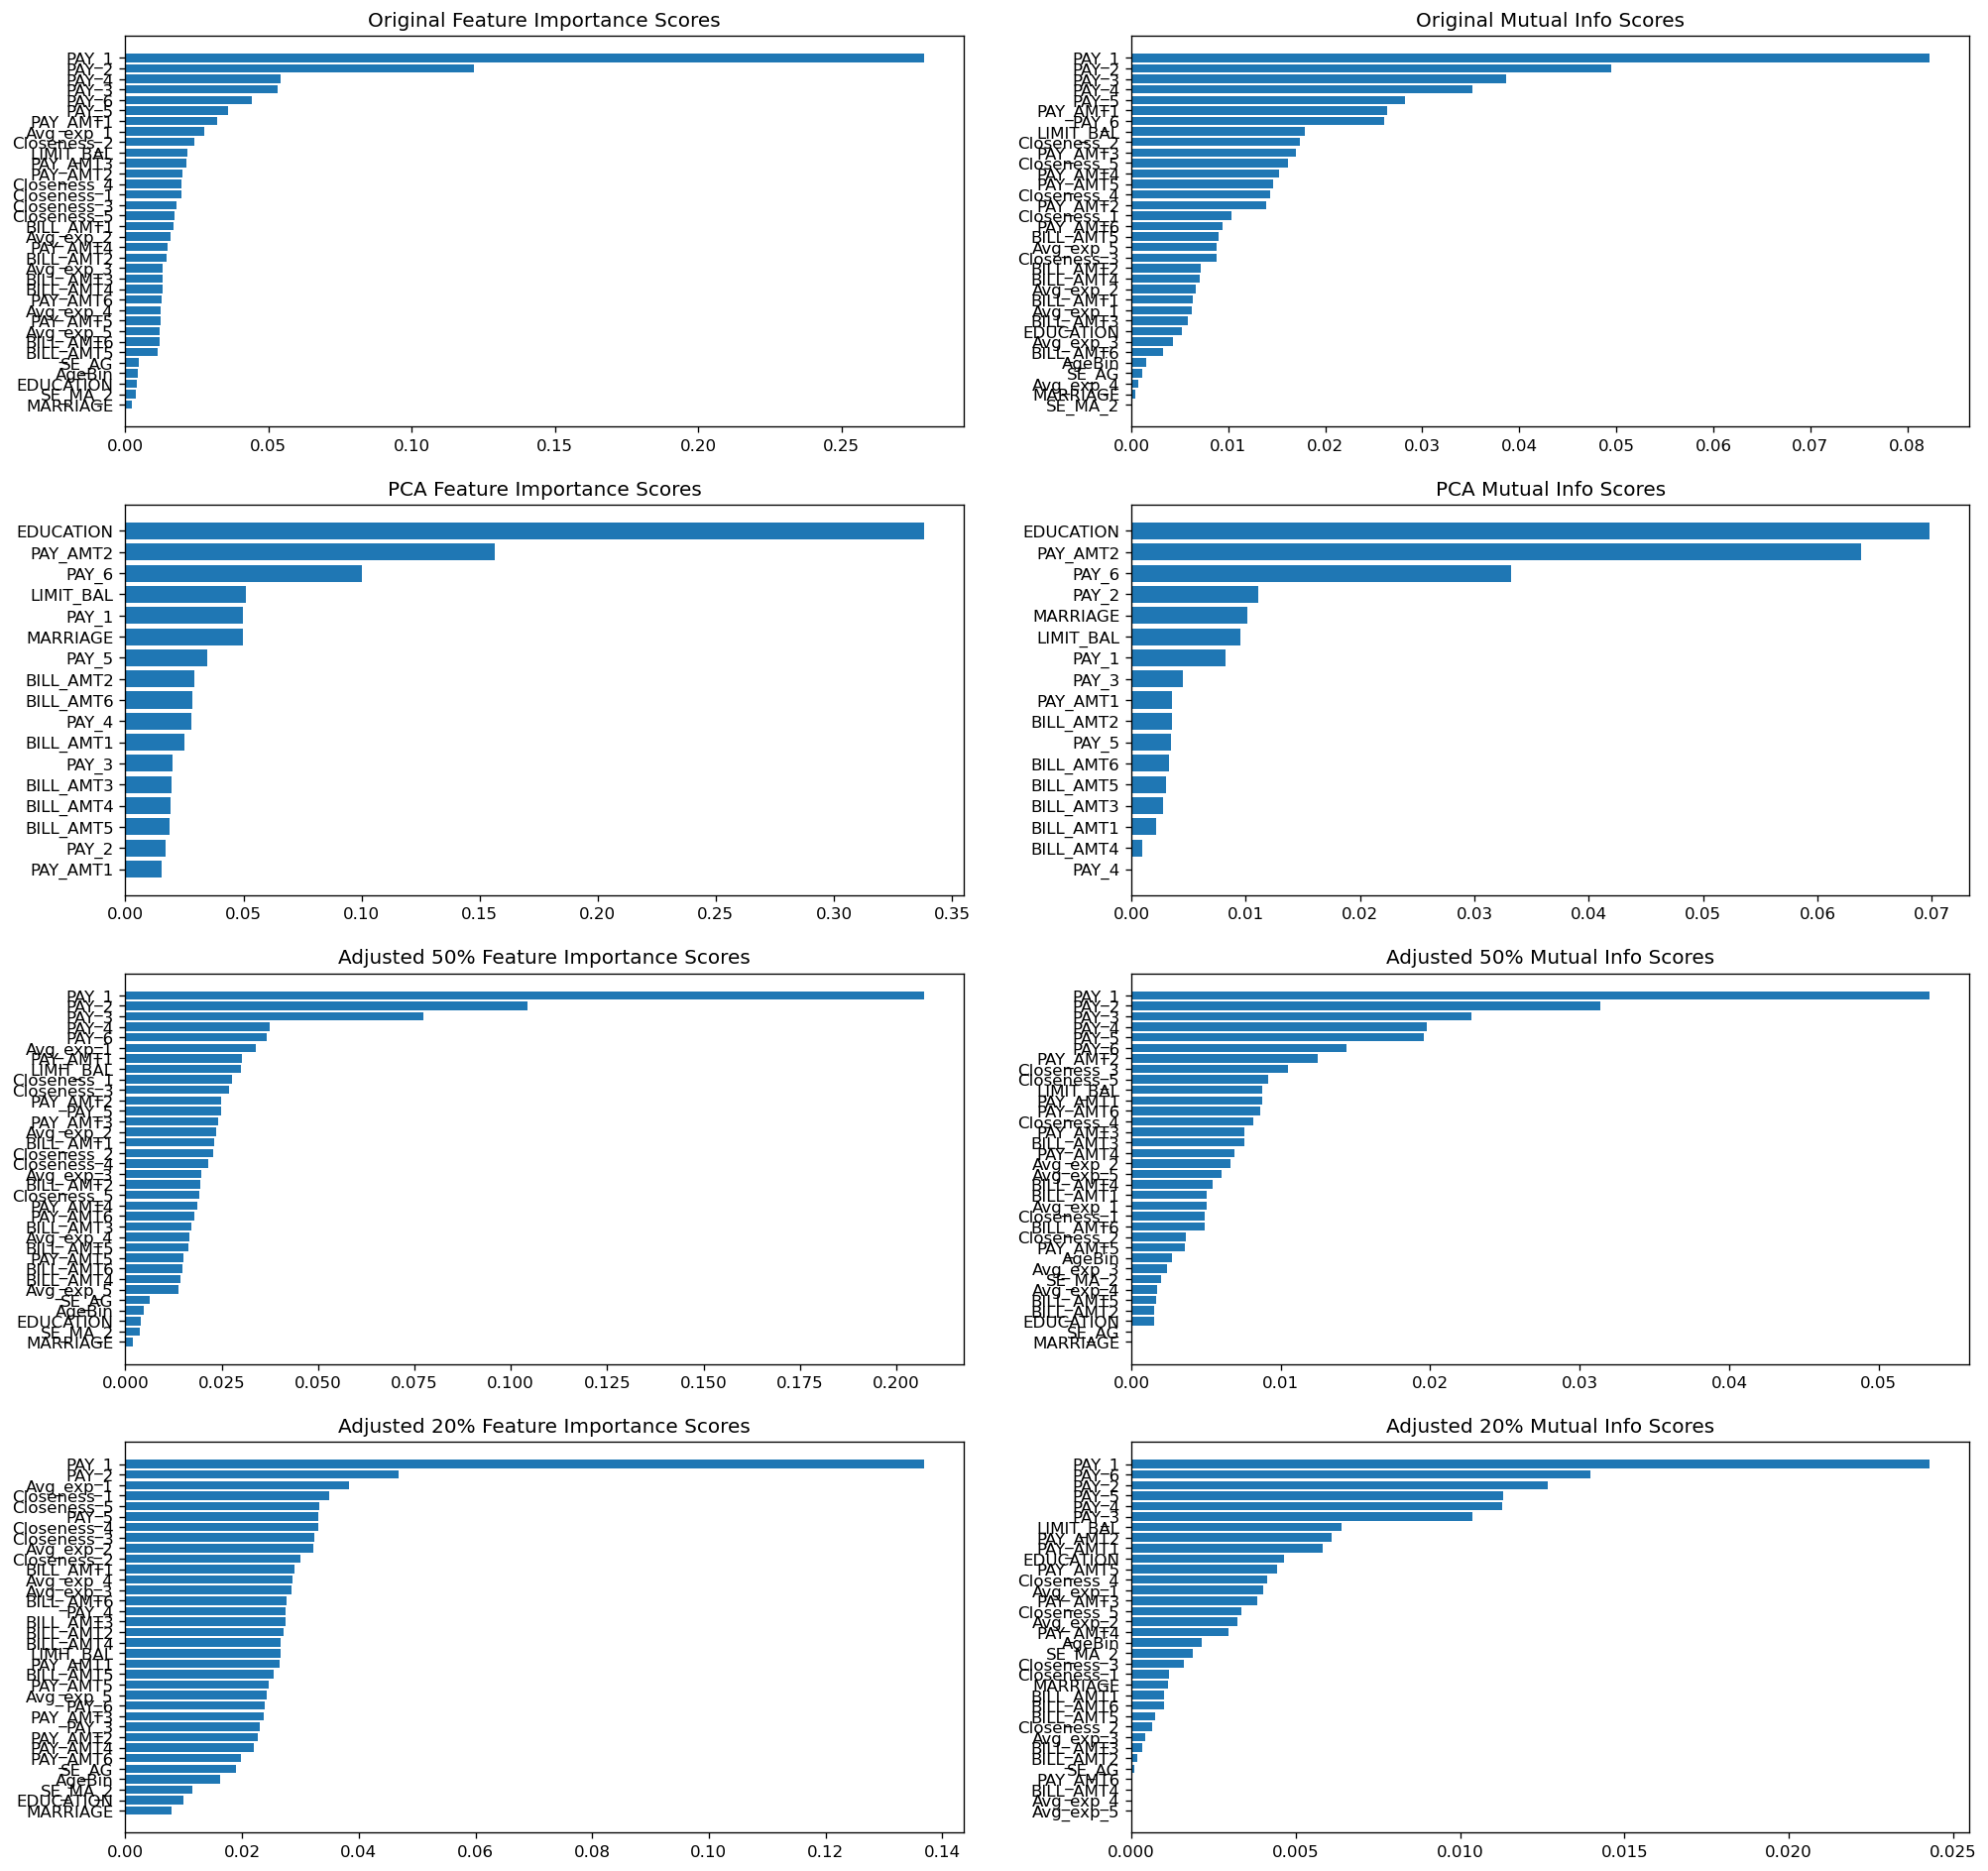

In [101]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

### 6.3.4 GridSearch using F1 Score

In [126]:
###### ORIGINAL DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': np.arange(100,500, 100),
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.5s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.4s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.5s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.4s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.5s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   3.3s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.0s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.0s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.2s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.3s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.5s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   3.7s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   3.8s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.6s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.5s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.6s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.5s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.0s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.1s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.0s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.6s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.5s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.7s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   5.5s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   5.2s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   5.6s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   5.3s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   5.5s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   5.8s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [127]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': np.arange(100,500, 100),
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.9s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.9s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.9s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   2.0s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.9s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   3.4s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.4s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.5s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.4s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.4s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.6s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   6.9s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   6.8s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   6.3s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   6.4s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   6.5s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   6.1s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   5.8s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   5.5s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   5.7s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   6.7s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   6.3s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   6.3s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   8.3s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=  10.2s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   9.5s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   8.9s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   9.3s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   8.7s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [128]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': np.arange(100,500, 100),
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.8s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.9s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.7s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.7s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.8s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   3.1s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.2s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.8s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.1s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.0s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   3.1s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   4.3s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   4.5s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   4.3s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   4.5s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   4.6s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   5.3s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.5s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.5s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.4s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   4.5s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   4.3s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.8s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.6s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.7s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.6s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.4s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   4.4s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   4.8s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [129]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             'criterion' : ['gini','entropy'],
             #'n_estimators': np.arange(100,500, 100),
             'max_features': ['auto', 'sqrt', 'log2']}
# create the grid
grid_tree = GridSearchCV(RandomForestClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV 1/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 1/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.2s
[CV 2/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 2/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.1s
[CV 3/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 3/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.2s
[CV 4/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 4/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.1s
[CV 5/5; 1/42] START criterion=gini, max_depth=3, max_features=auto.............
[CV 5/5; 1/42] END criterion=gini, max_depth=3, max_features=auto; total time=   1.1s
[CV 1/5; 2/42] START criterion=gini, max_depth=3, max_features=sqrt.............
[CV 1/5; 2/42] END cri

[CV 5/5; 10/42] END criterion=gini, max_depth=6, max_features=auto; total time=   2.2s
[CV 1/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 1/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   1.9s
[CV 2/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 2/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.0s
[CV 3/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 3/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.6s
[CV 4/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 4/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.9s
[CV 5/5; 11/42] START criterion=gini, max_depth=6, max_features=sqrt............
[CV 5/5; 11/42] END criterion=gini, max_depth=6, max_features=sqrt; total time=   2.8s
[CV 1/5; 12/42] START criterion=gini, max_depth=6, max_features=log2.....

[CV 4/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   4.2s
[CV 5/5; 20/42] START criterion=gini, max_depth=9, max_features=sqrt............
[CV 5/5; 20/42] END criterion=gini, max_depth=9, max_features=sqrt; total time=   3.7s
[CV 1/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 1/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.7s
[CV 2/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 2/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   4.1s
[CV 3/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 3/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.8s
[CV 4/5; 21/42] START criterion=gini, max_depth=9, max_features=log2............
[CV 4/5; 21/42] END criterion=gini, max_depth=9, max_features=log2; total time=   3.8s
[CV 5/5; 21/42] START criterion=gini, max_depth=9, max_features=log2.....

[CV 3/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.1s
[CV 4/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 4/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.0s
[CV 5/5; 30/42] START criterion=entropy, max_depth=5, max_features=log2.........
[CV 5/5; 30/42] END criterion=entropy, max_depth=5, max_features=log2; total time=   3.3s
[CV 1/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 1/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.4s
[CV 2/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 2/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   3.7s
[CV 3/5; 31/42] START criterion=entropy, max_depth=6, max_features=auto.........
[CV 3/5; 31/42] END criterion=entropy, max_depth=6, max_features=auto; total time=   4.0s
[CV 4/5; 31/42] START criterion=entropy, max_depth=6, m

[CV 1/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.7s
[CV 2/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 2/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.8s
[CV 3/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 3/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.9s
[CV 4/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 4/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.6s
[CV 5/5; 40/42] START criterion=entropy, max_depth=9, max_features=auto.........
[CV 5/5; 40/42] END criterion=entropy, max_depth=9, max_features=auto; total time=   3.6s
[CV 1/5; 41/42] START criterion=entropy, max_depth=9, max_features=sqrt.........
[CV 1/5; 41/42] END criterion=entropy, max_depth=9, max_features=sqrt; total time=   3.6s
[CV 2/5; 41/42] START criterion=entropy, max_depth=9, m

In [135]:
X_set = X_test_adj2.copy()
y_set = (pd.DataFrame(pred_2, columns = ['def_pay'])).copy()
set = X_set.join(y_set)
set['def_pay'] = set['def_pay'].fillna(0)

'''set_1 = set[set['PAY_1'] == 1.0]
pd.DataFrame(set_1['PAY_1'].describe())

set_0 = set[set['PAY_1'] == 0.0]
pd.DataFrame(set_0['PAY_1'].describe())'''

"set_1 = set[set['PAY_1'] == 1.0]\npd.DataFrame(set_1['PAY_1'].describe())\n\nset_0 = set[set['PAY_1'] == 0.0]\npd.DataFrame(set_0['PAY_1'].describe())"

In [136]:
set_1 = set[set['PAY_1'] == 1.0]
pd.DataFrame(set_1['PAY_1'].describe())

PAY_1
count  571.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0

In [137]:
set_0 = set[set['PAY_1'] == 0.0]
pd.DataFrame(set_0['PAY_1'].describe())

PAY_1
count  4043.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0

In [130]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        (DecisionTreeClassifier(max_depth=9, max_featu...   
PCA (Original Dataset)  (DecisionTreeClassifier(max_depth=9, max_featu...   
Adjusted Dataset(50%)   (DecisionTreeClassifier(max_depth=9, max_featu...   
Adjusted Dataset(20%)   (DecisionTreeClassifier(max_depth=9, max_featu...   

                        Accuracy  F1 Score   TP    TN   FP   FN  
Original Dataset        0.821667  0.458502  453  4477  210  860  
PCA (Original Dataset)  0.815333  0.449304  452  4440  247  861  
Adjusted Dataset(50%)   0.883455  0.237745   97  4618   70  552  
Adjusted Dataset(20%)   0.946548  0.029412    4  4671    4  260

#### Checking Feature Importance & Mutual Info

In [106]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [107]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

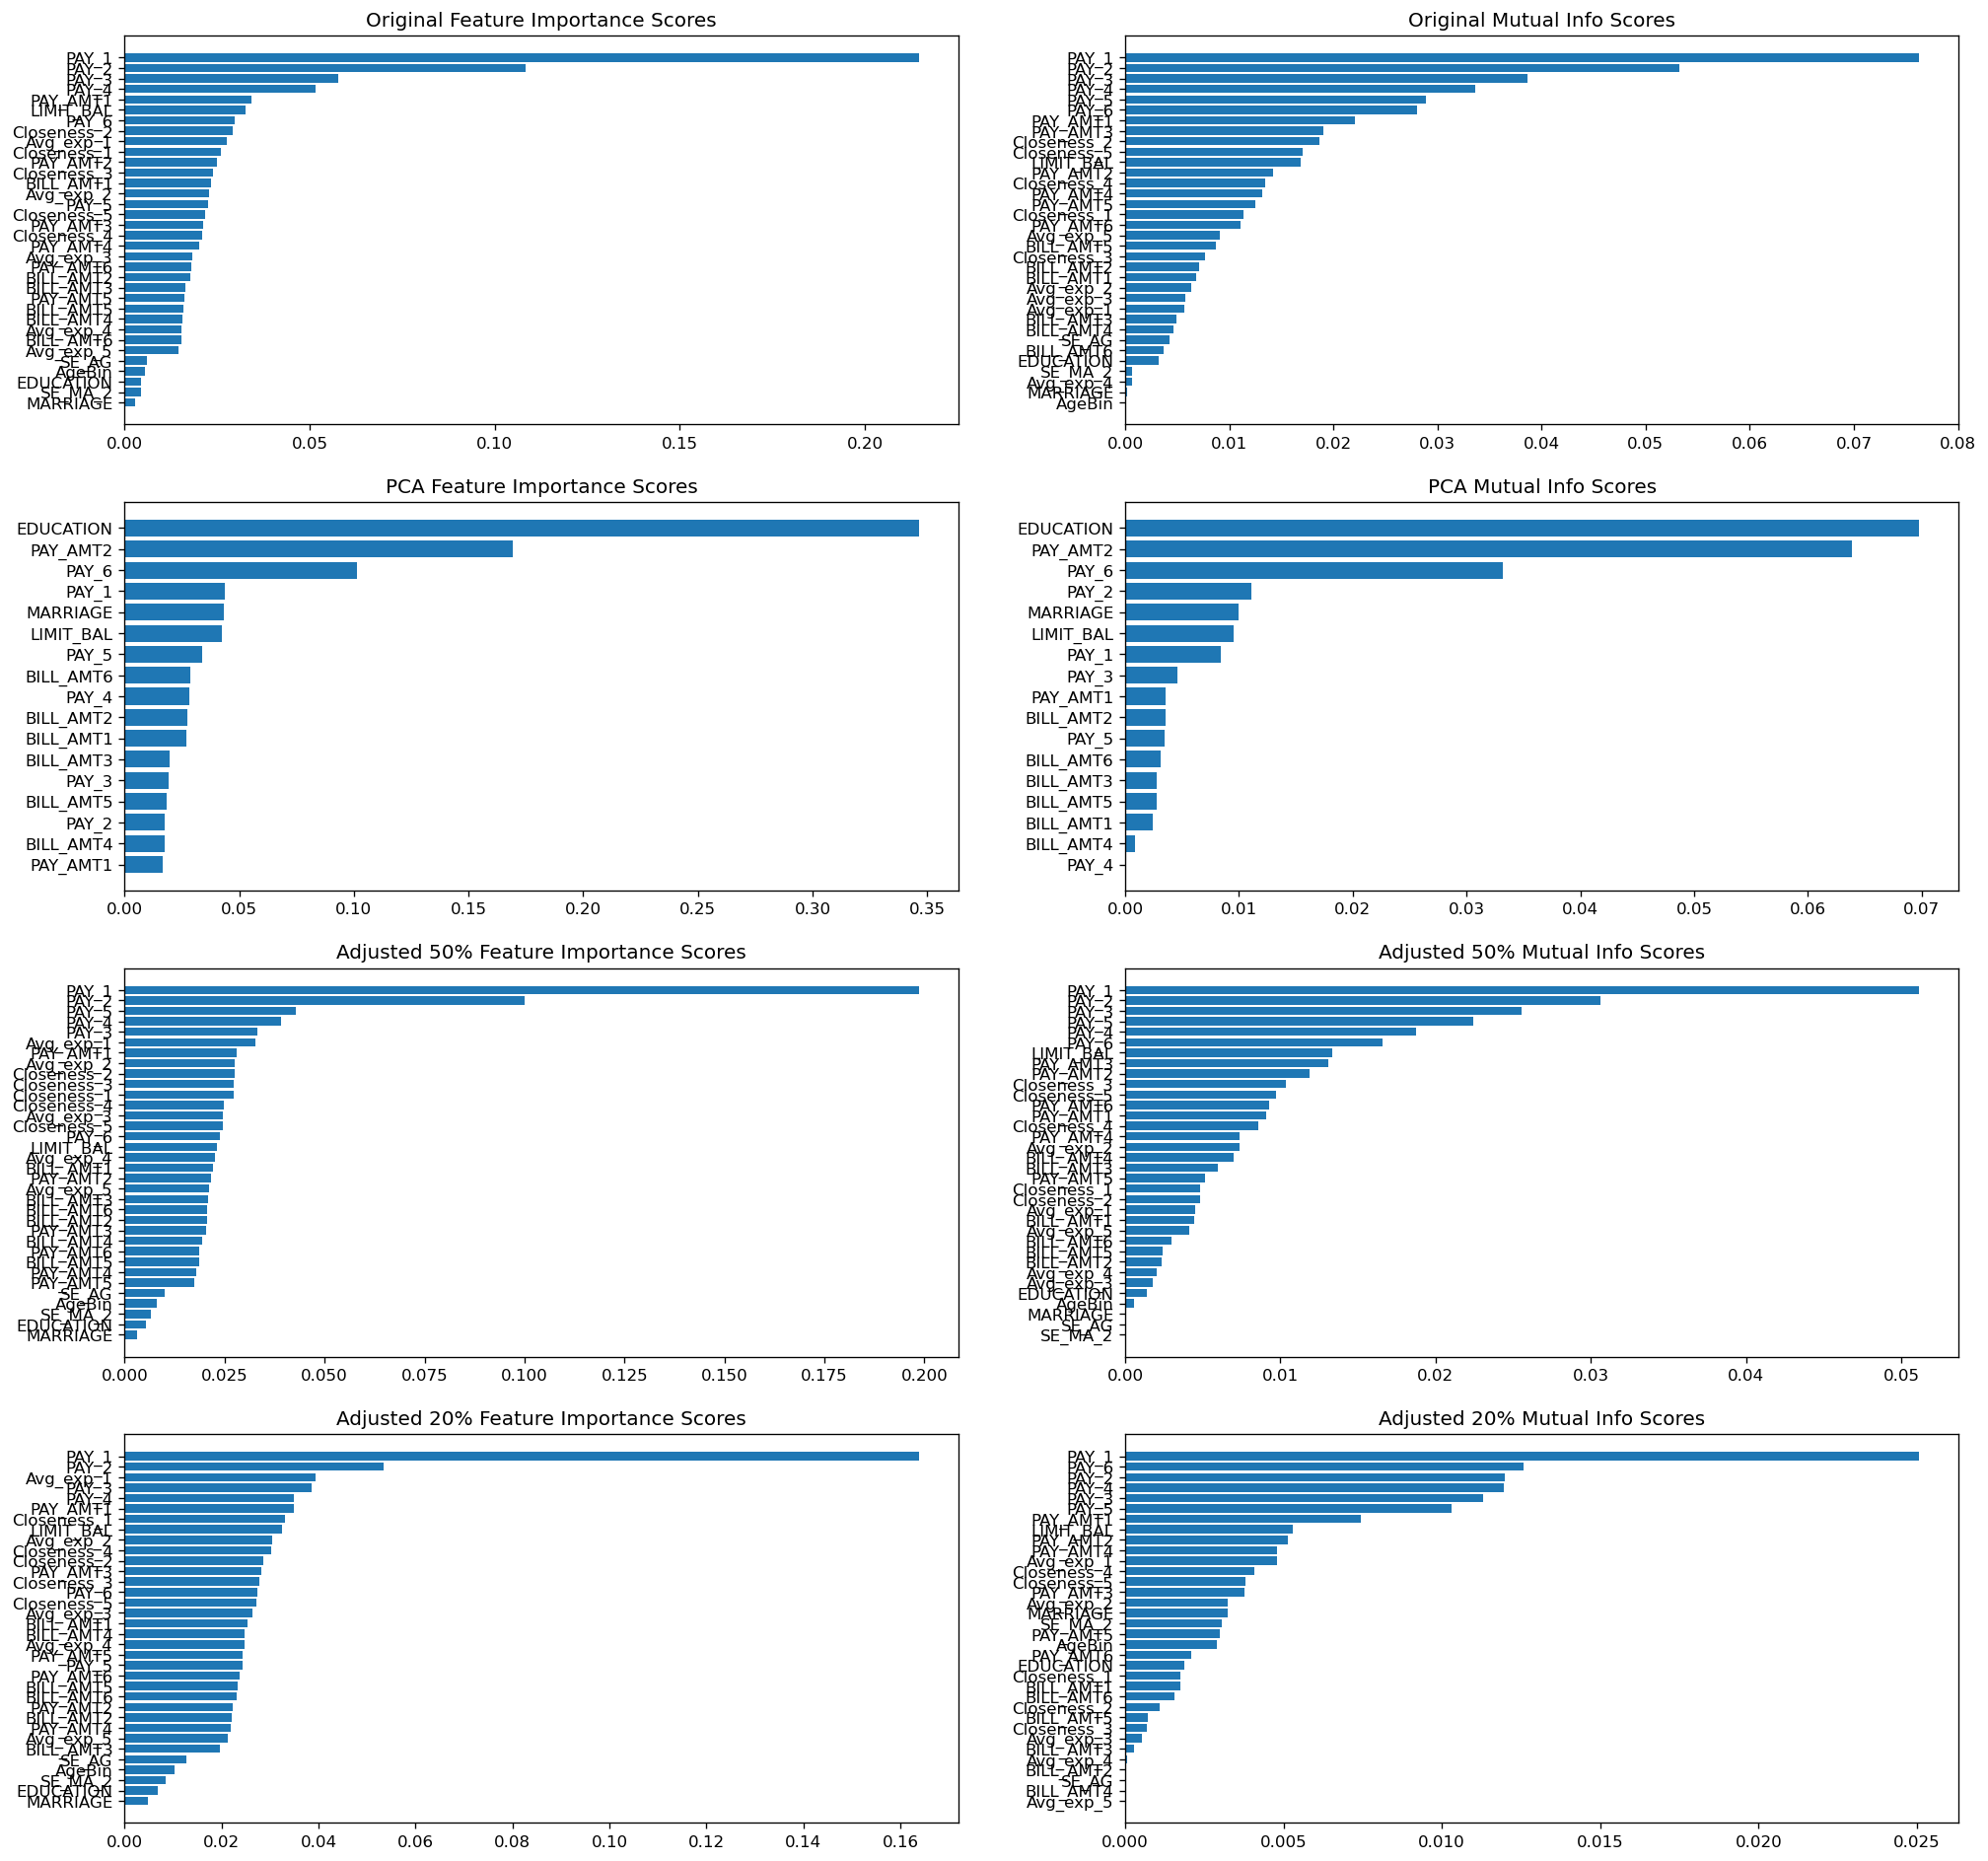

In [108]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

#### Exploring Statistical Distribution between the Classes

In [68]:
X_dt = X_test.copy()
y_dt = (pd.DataFrame(predictions, columns = ['def_pay'])).copy()
dt = X_dt.join(y_dt)
dt['def_pay'] = dt['def_pay'].fillna(0)
dt

LIMIT_BAL  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
2308     30000.0          2         2      0      0      0      0      0   
22404   150000.0          1         2      0      0      0      0      0   
23397    70000.0          3         1      0      0      0      0      0   
25058   130000.0          3         2      0      0      0      0      0   
2664     50000.0          2         2      0      0      0      0      0   
...          ...        ...       ...    ...    ...    ...    ...    ...   
2210    360000.0          1         2      1      0      0      0      0   
14144   500000.0          1         2      2      0      0      2      0   
23108    60000.0          1         1      0      0      0      0      0   
25703    20000.0          1         2      1      0      0      0      0   
29171   510000.0          3         1      0      0      0      2      0   

       PAY_6  BILL_AMT1  ...  Avg_exp_4  Avg_exp_3  Avg_exp_2  Avg_exp_1  \
2308       0     8864.0  ...   0.012533   0.013922   0.014450   0.013573   
22404      0   136736.0  ...   0.098777   0.106438   0.101832   0.102227   
23397      0    70122.0  ...   0.031993   0.029790   0.035421   0.038260   
25058      0    20678.0  ...   0.065354   0.059692   0.053600   0.048006   
2664       2    94228.0  ...   0.019350   0.171480   0.162480   0.324356   
...      ...        ...  ...        ...        ...        ...        ...   
2210       0        0.0  ...   0.001765   0.001945   0.001459   0.001167   
14144      0    98541.0  ...   0.005158   0.025852   0.021146   0.017912   
23108      2    46233.0  ...   0.015200   0.014639   0.015425   0.015907   
25703      0        0.0  ...   0.049100   0.098950   0.105387   0.084310   
29171      0   187070.0  ...   0.014911   0.017197   0.015755   0.018031   

       Closeness_5  Closeness_4  Closeness_3  Closeness_2  Closeness_1  \
2308      0.542800     0.580667     0.613967     0.664600     0.704533   
22404     0.481727     0.322793     0.222107     0.162327     0.088427   
23397    -0.001586     0.003529     0.021000     0.013143    -0.001743   
25058     0.913569     0.870015     0.875600     0.854185     0.840938   
2664      0.594100     0.608520     0.152780     0.047300    -0.884560   
...            ...          ...          ...          ...          ...   
2210      0.996469     1.000000     0.997694     1.000000     1.000000   
14144     0.843248     0.843860     0.776620     0.795896     0.802918   
23108     0.132583     0.160250     0.188400     0.212283     0.229450   
25703     0.970000     0.931800     0.801650     0.875300     1.000000   
29171     0.650629     0.643527     0.621759     0.643661     0.633196   

       def_pay  
2308       0.0  
22404      0.0  
23397      0.0  
25058      0.0  
2664       0.0  
...        ...  
2210       0.0  
14144      0.0  
23108      0.0  
25703      0.0  
29171      0.0  

[6000 rows x 35 columns]

In [69]:
dt_1 = dt[dt['def_pay'] == 1.0]
dt_1.describe()

LIMIT_BAL   EDUCATION    MARRIAGE       PAY_1       PAY_2  \
count     134.000000  134.000000  134.000000  134.000000  134.000000   
mean   154328.358209    1.738806    1.634328    0.380597    0.328358   
std    131597.745263    0.703686    0.483425    0.783234    0.802029   
min     10000.000000    1.000000    1.000000    0.000000    0.000000   
25%     50000.000000    1.000000    1.000000    0.000000    0.000000   
50%    120000.000000    2.000000    2.000000    0.000000    0.000000   
75%    200000.000000    2.000000    2.000000    0.000000    0.000000   
max    710000.000000    4.000000    2.000000    4.000000    3.000000   

            PAY_3       PAY_4       PAY_5       PAY_6      BILL_AMT1  ...  \
count  134.000000  134.000000  134.000000  134.000000     134.000000  ...   
mean     0.283582    0.164179    0.208955    0.253731   40385.656716  ...   
std      0.700289    0.551062    0.614054    0.668143   50472.457507  ...   
min      0.000000    0.000000    0.000000    0.000000    -946.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    3120.750000  ...   
50%      0.000000    0.000000    0.000000    0.000000   19656.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000   59207.250000  ...   
max      2.000000    2.000000    2.000000    2.000000  251486.000000  ...   

        Avg_exp_4   Avg_exp_3   Avg_exp_2   Avg_exp_1  Closeness_5  \
count  134.000000  134.000000  134.000000  134.000000   134.000000   
mean     0.056931    0.060933    0.061705    0.060814     0.627393   
std      0.091541    0.086307    0.075951    0.066335     0.366416   
min      0.000000    0.000000    0.000000    0.000000    -0.023450   
25%      0.005542    0.006401    0.007137    0.009449     0.302006   
50%      0.021780    0.027570    0.034070    0.039928     0.730354   
75%      0.055621    0.073309    0.085233    0.085993     0.993860   
max      0.529220    0.547917    0.419488    0.341030     1.011715   

       Closeness_4  Closeness_3  Closeness_2  Closeness_1  def_pay  
count   134.000000   134.000000   134.000000   134.000000    134.0  
mean      0.617735     0.584562     0.555990     0.555717      1.0  
std       0.366870     0.383090     0.391682     0.402698      0.0  
min      -0.035733    -0.014240    -0.052140    -0.040467      1.0  
25%       0.281435     0.204887     0.176700     0.153875      1.0  
50%       0.716805     0.701129     0.592100     0.677394      1.0  
75%       0.989144     0.988696     0.987420     0.982662      1.0  
max       1.011715     1.011715     1.004857     1.003942      1.0  

[8 rows x 35 columns]

In [70]:
dt_0 = dt[dt['def_pay'] == 0.0]
dt_0.describe()

LIMIT_BAL    EDUCATION     MARRIAGE        PAY_1        PAY_2  \
count    5866.000000  5866.000000  5866.000000  5866.000000  5866.000000   
mean   168839.072622     1.842653     1.556427     0.352881     0.314524   
std    129756.144875     0.740702     0.519003     0.747093     0.793269   
min     10000.000000     1.000000     1.000000     0.000000     0.000000   
25%     50000.000000     1.000000     1.000000     0.000000     0.000000   
50%    140000.000000     2.000000     2.000000     0.000000     0.000000   
75%    240000.000000     2.000000     2.000000     0.000000     0.000000   
max    800000.000000     4.000000     3.000000     8.000000     7.000000   

             PAY_3        PAY_4        PAY_5        PAY_6      BILL_AMT1  ...  \
count  5866.000000  5866.000000  5866.000000  5866.000000    5866.000000  ...   
mean      0.314183     0.261677     0.221446     0.217013   52681.385442  ...   
std       0.813354     0.773531     0.722945     0.705204   75003.427021  ...   
min       0.000000     0.000000     0.000000     0.000000  -14386.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000    3723.250000  ...   
50%       0.000000     0.000000     0.000000     0.000000   22787.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000   70194.750000  ...   
max       8.000000     7.000000     7.000000     7.000000  653062.000000  ...   

         Avg_exp_4    Avg_exp_3    Avg_exp_2    Avg_exp_1  Closeness_5  \
count  5866.000000  5866.000000  5866.000000  5866.000000  5866.000000   
mean      0.056641     0.061386     0.061498     0.060873     0.667409   
std       0.103400     0.091231     0.080487     0.074375     0.346244   
min      -0.478475    -0.308550    -0.224100    -0.173410    -1.095400   
25%       0.006103     0.008006     0.009620     0.010569     0.399045   
50%       0.018647     0.023986     0.028329     0.031303     0.782329   
75%       0.055767     0.075910     0.084507     0.087416     0.989638   
max       1.562500     1.054667     0.827875     0.717800     1.876743   

       Closeness_4  Closeness_3  Closeness_2  Closeness_1  def_pay  
count  5866.000000  5866.000000  5866.000000  5866.000000   5866.0  
mean      0.639145     0.606468     0.588128     0.575141      0.0  
std       0.364259     0.391193     0.399689     0.406654      0.0  
min      -1.127690    -2.476050    -2.362950    -2.329950      0.0  
25%       0.333030     0.247274     0.192377     0.163453      0.0  
50%       0.749784     0.720880     0.700638     0.683326      0.0  
75%       0.986388     0.985209     0.981969     0.977375      0.0  
max       1.106700     1.119250     1.067715     1.071930      0.0  

[8 rows x 35 columns]

## 6.4 Gradient Boosting

### 6.4.1 Blind Run

In [109]:
gb_classifier = GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.5, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

# Original Dataset
clf_og = gb_classifier.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

# PCA (Original Dataset)
clf_PCA = gb_classifier.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

# Adjusted Dataset(50%)
clf_5 = gb_classifier.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

# Adjusted Dataset(20%)
clf_2 = gb_classifier.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

In [110]:
pd.DataFrame(np.array([[acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Accuracy  F1 Score     TP      TN     FP     FN
Original Dataset        0.811333  0.473978  510.0  4358.0  329.0  803.0
PCA (Original Dataset)  0.797833  0.423205  445.0  4342.0  345.0  868.0
Adjusted Dataset(50%)   0.875398  0.340932  172.0  4500.0  188.0  477.0
Adjusted Dataset(20%)   0.933792  0.155039   30.0  4582.0   93.0  234.0

### 6.4.2 Cross Validating

In [111]:
###### Original Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    gb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = gb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_og = pd.DataFrame({'Score':scr,'Fold':fold})

In [113]:
###### PCA Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_PCA)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    gb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = gb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_PCA = pd.DataFrame({'Score':scr,'Fold':fold})

In [114]:
###### Adjusted Dataset 50% ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj5)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    gb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = gb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_5 = pd.DataFrame({'Score':scr,'Fold':fold})

In [115]:
##### Adjusted Dataset 20% #####
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj2)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    gb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = gb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_2 = pd.DataFrame({'Score':scr,'Fold':fold})

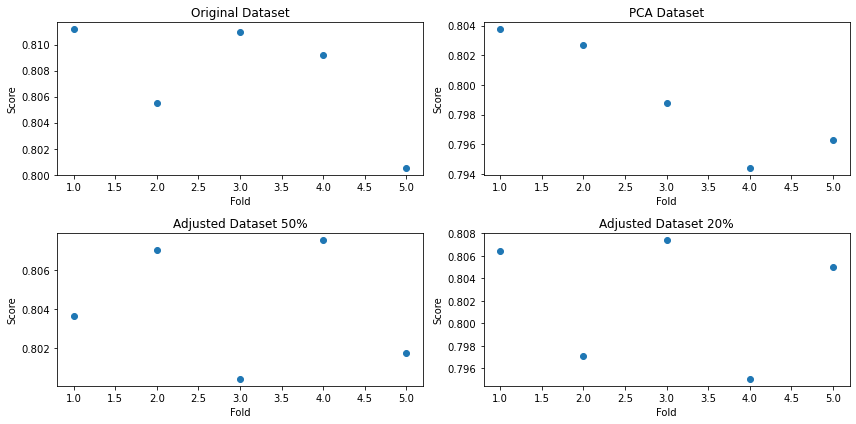

In [116]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(performance_og['Fold'], performance_og['Score'])
axs[0,0].set_title("Original Dataset")
axs[0,1].scatter(performance_PCA['Fold'], performance_PCA['Score'])
axs[0,1].set_title("PCA Dataset")
axs[1,0].scatter(performance_5['Fold'], performance_5['Score'])
axs[1,0].set_title("Adjusted Dataset 50%")
axs[1,1].scatter(performance_2['Fold'], performance_2['Score'])
axs[1,1].set_title("Adjusted Dataset 20%")


for ax in axs.flat:
    ax.set(xlabel = 'Fold', ylabel = 'Score')
    
fig.tight_layout()
plt.show()

### 6.4.3 GridSearch using Accuracy

In [121]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  13.6s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  14.2s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  14.0s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  14.3s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  14.3s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  31.0s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  27.3s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  27.3s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  27.2s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  30.5s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  36.4s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  52.7s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  53.1s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  52.7s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  53.4s


In [122]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  15.9s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  16.5s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  15.9s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  15.6s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  16.2s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  28.5s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  25.5s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  25.2s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  25.4s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  28.2s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  29.1s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  33.3s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  34.0s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  32.5s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  34.5s


In [123]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  10.7s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  10.5s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  10.5s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  10.8s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.0s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  26.9s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  26.6s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  25.5s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  22.6s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  24.1s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  29.0s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  38.2s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  37.7s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  37.5s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  38.3s


In [124]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.2s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.1s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.0s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.8s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.0s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  17.4s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  17.1s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  17.4s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  19.1s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  18.8s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  19.9s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  25.6s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  25.5s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  26.0s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  26.2s


In [125]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

C:\Users\Ren\anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Best Estimator  \
Original Dataset        ([DecisionTreeRegressor(criterion='friedman_ms...   
PCA (Original Dataset)  ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(50%)   ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(20%)   ([DecisionTreeRegressor(criterion='friedman_ms...   

                        Accuracy  F1 Score   TP    TN   FP   FN  
Original Dataset           0.821  0.464606  466  4460  227  847  
PCA (Original Dataset)  0.813333  0.457364  472  4408  279  841  
Adjusted Dataset(50%)   0.889264  0.359697  166  4580  108  483  
Adjusted Dataset(20%)   0.945333  0.014599    2  4667    8  262

#### Checking Feature Importance & Mutual Info

In [126]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [127]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

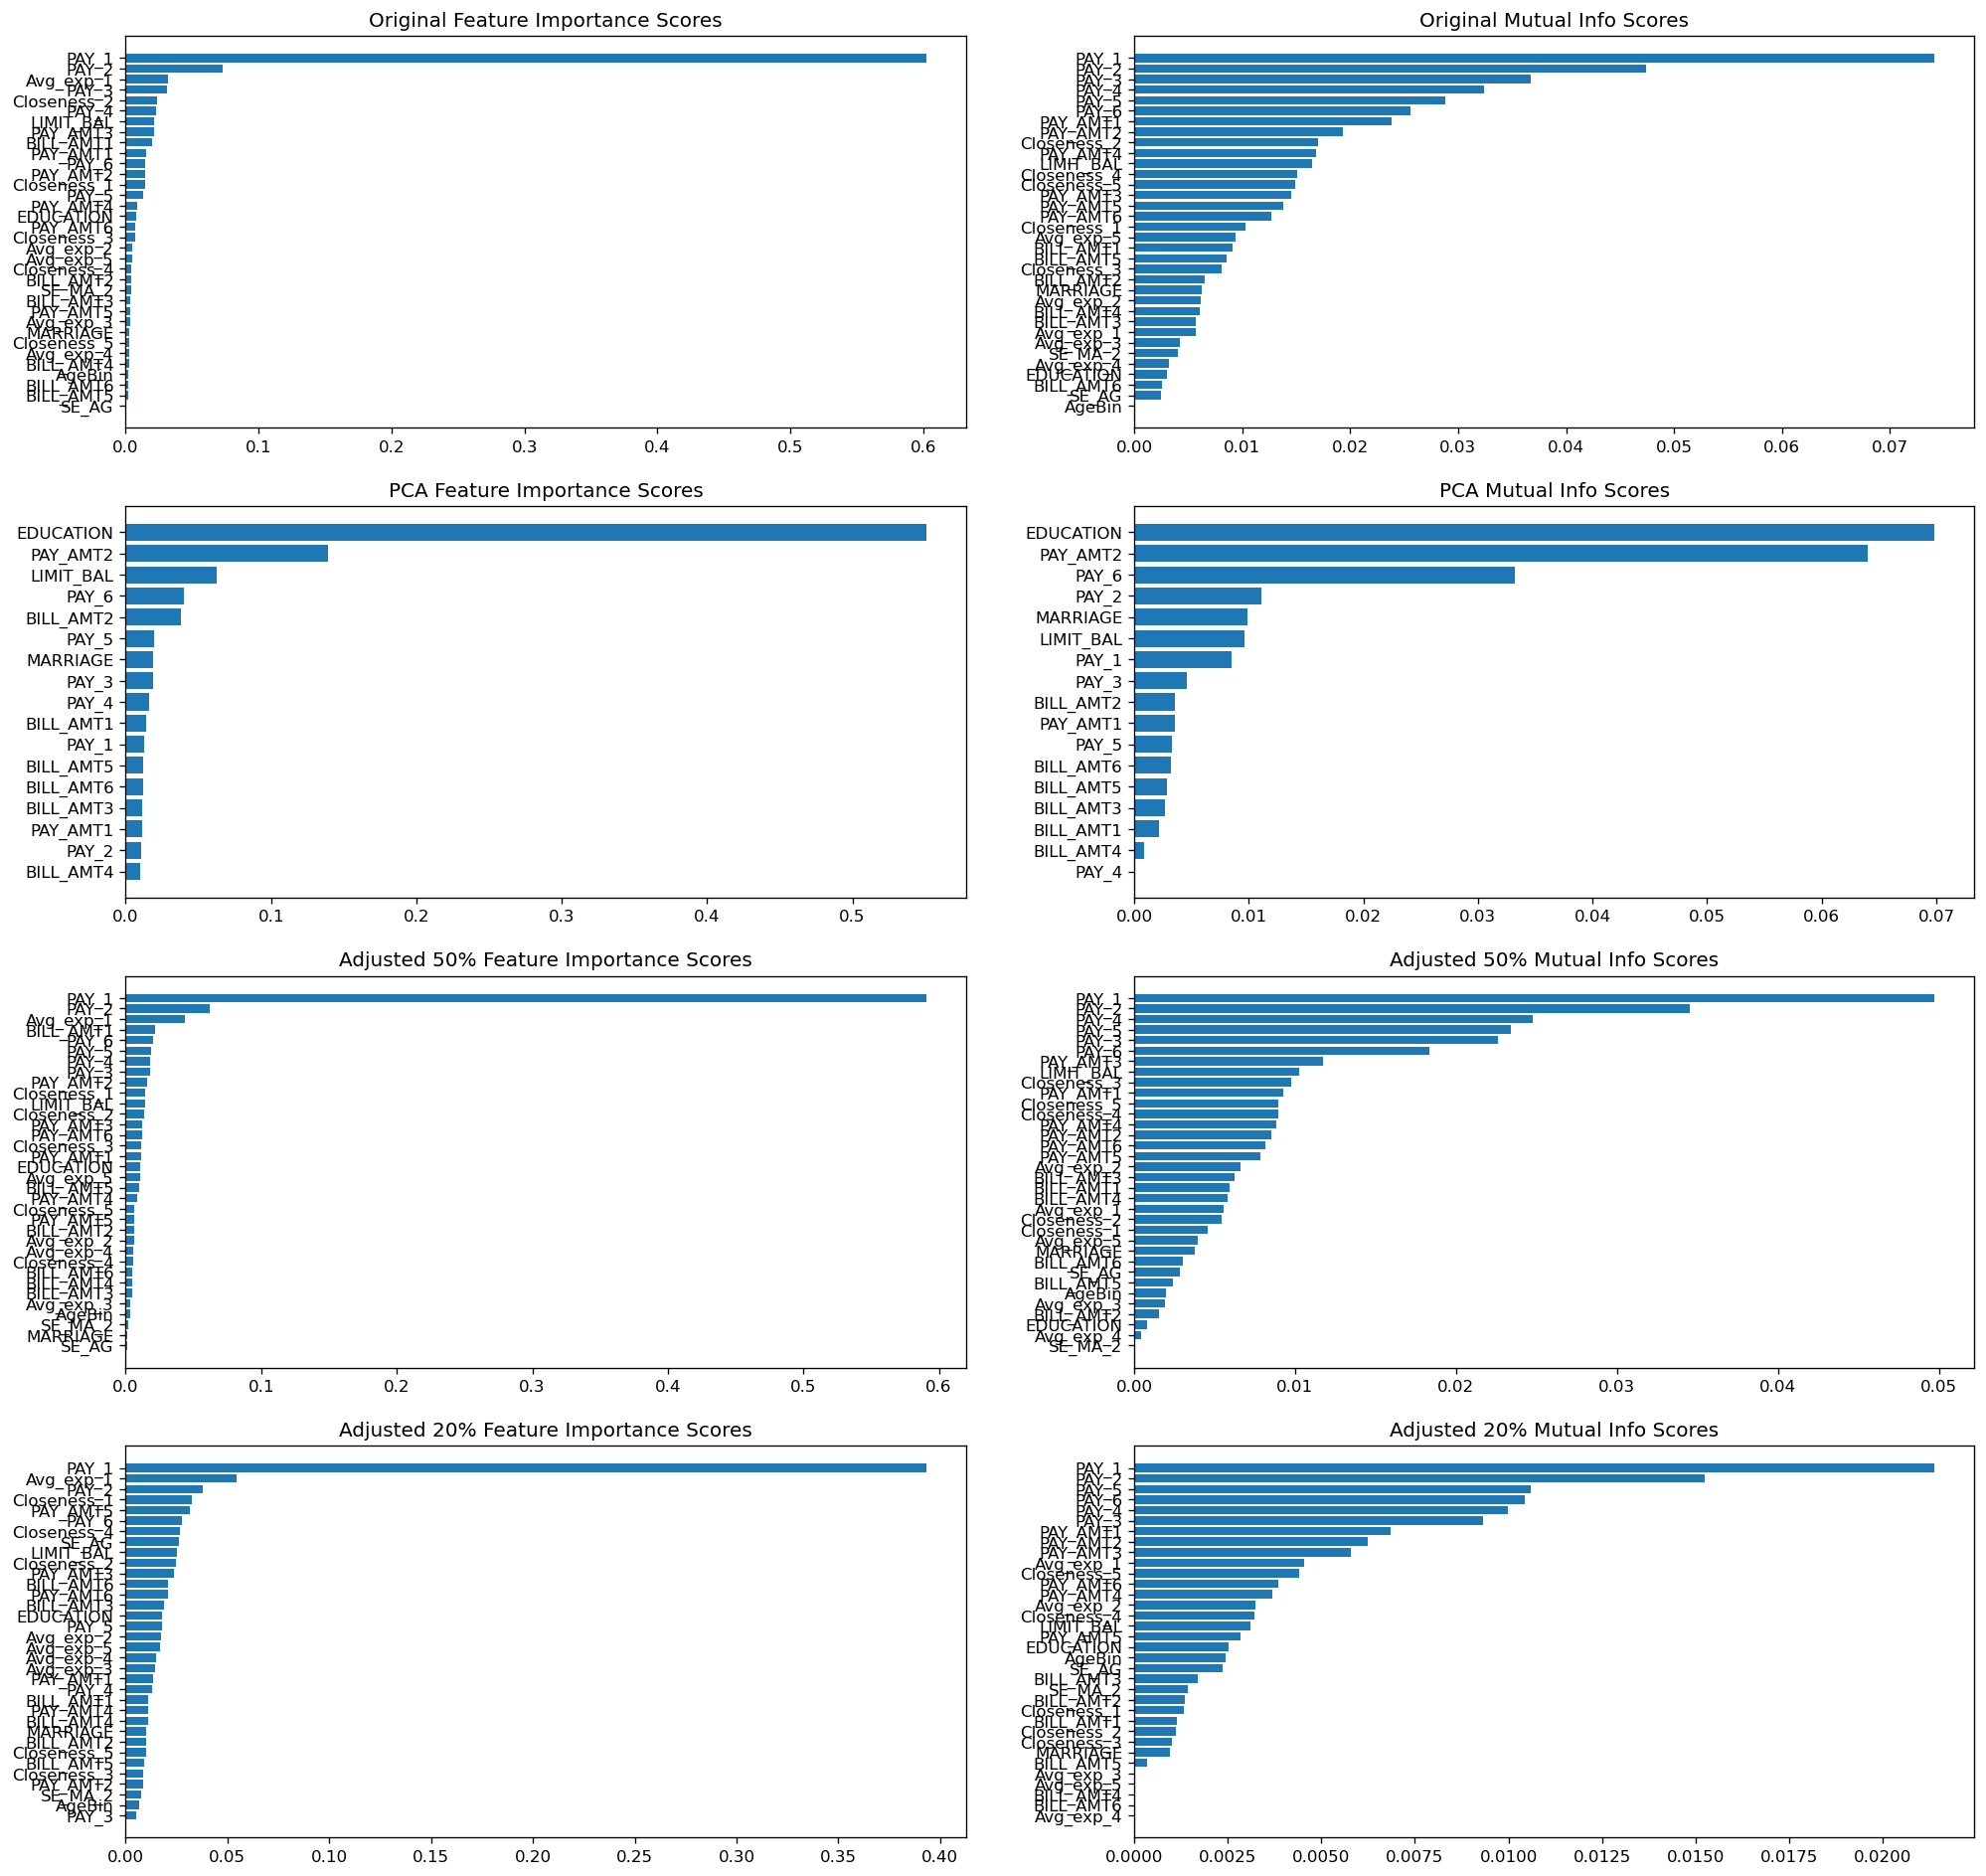

In [128]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

### 6.3.4 GridSearch using F1 Score

In [130]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  13.2s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.4s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.3s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  15.0s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  13.9s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  26.5s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  26.6s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  26.4s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  26.3s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  26.2s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  30.4s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  42.4s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  41.9s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  40.2s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  39.4s


In [131]:
###### PCA DATASET #######
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.3s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.6s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.3s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.3s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  12.3s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  22.8s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  23.0s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  22.9s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  22.6s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  22.6s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  26.3s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  35.1s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  37.1s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  36.0s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  35.7s


In [138]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.6s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  10.8s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.0s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  10.7s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  10.2s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  18.8s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  18.8s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  18.9s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  19.0s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  18.7s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  22.2s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  27.7s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  28.1s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  28.8s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  28.6s


In [139]:
X_set = X_test_adj5.copy()
y_set = (pd.DataFrame(pred_5, columns = ['def_pay'])).copy()
set = X_set.join(y_set)
set['def_pay'] = set['def_pay'].fillna(0)

'''set_1 = set[set['PAY_1'] == 1.0]
pd.DataFrame(set_1['PAY_1'].describe())

set_0 = set[set['PAY_1'] == 0.0]
pd.DataFrame(set_0['PAY_1'].describe())'''

"set_1 = set[set['PAY_1'] == 1.0]\npd.DataFrame(set_1['PAY_1'].describe())\n\nset_0 = set[set['PAY_1'] == 0.0]\npd.DataFrame(set_0['PAY_1'].describe())"

In [140]:
set_1 = set[set['PAY_1'] == 1.0]
pd.DataFrame(set_1['PAY_1'].describe())

PAY_1
count  631.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0

In [141]:
set_0 = set[set['PAY_1'] == 0.0]
pd.DataFrame(set_0['PAY_1'].describe())

PAY_1
count  4299.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0

In [133]:
###### ADJUSTED DATASET 20% #######
param_grid = {'max_depth': np.arange(3, 10),
             #'criterion' : ['gini','entropy'],
             #'n_estimators': [np.arange(100,500, 100)],
             #'max_features': ['auto', 'sqrt', 'log2']
             'learning_rate': [0.005, 0.01, 0.1]}
# create the grid
grid_tree = GridSearchCV(GradientBoostingClassifier(), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
[CV 1/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 1/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.3s
[CV 2/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 2/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.0s
[CV 3/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 3/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.0s
[CV 4/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 4/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.0s
[CV 5/5; 1/21] START learning_rate=0.005, max_depth=3...........................
[CV 5/5; 1/21] END .........learning_rate=0.005, max_depth=3; total time=  11.2s
[CV 1/5; 2/21] START learning_rate=0.005, max_depth=4...........................
[CV 1/5; 2/21] END .........learning_rate=0.005

[CV 1/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  18.9s
[CV 2/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 2/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  17.7s
[CV 3/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 3/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  18.8s
[CV 4/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 4/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  17.9s
[CV 5/5; 11/21] START learning_rate=0.01, max_depth=6...........................
[CV 5/5; 11/21] END .........learning_rate=0.01, max_depth=6; total time=  18.3s
[CV 1/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 1/5; 12/21] END .........learning_rate=0.01, max_depth=7; total time=  21.0s
[CV 2/5; 12/21] START learning_rate=0.01, max_depth=7...........................
[CV 2/5; 12/21] END ........

[CV 2/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  26.7s
[CV 3/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 3/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  25.6s
[CV 4/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 4/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  26.0s
[CV 5/5; 21/21] START learning_rate=0.1, max_depth=9............................
[CV 5/5; 21/21] END ..........learning_rate=0.1, max_depth=9; total time=  25.5s


In [134]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

C:\Users\Ren\anaconda3\lib\site-packages\ipykernel_launcher.py:4: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  after removing the cwd from sys.path.


Best Estimator  \
Original Dataset        ([DecisionTreeRegressor(criterion='friedman_ms...   
PCA (Original Dataset)  ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(50%)   ([DecisionTreeRegressor(criterion='friedman_ms...   
Adjusted Dataset(20%)   ([DecisionTreeRegressor(criterion='friedman_ms...   

                        Accuracy  F1 Score   TP    TN   FP   FN  
Original Dataset        0.819333  0.462834  467  4449  238  846  
PCA (Original Dataset)  0.811167  0.448125  460  4407  280  853  
Adjusted Dataset(50%)   0.887577  0.365751  173  4564  124  476  
Adjusted Dataset(20%)   0.943308  0.166667   28  4631   44  236

#### Checking Feature Importance & Mutual Info

In [135]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [136]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

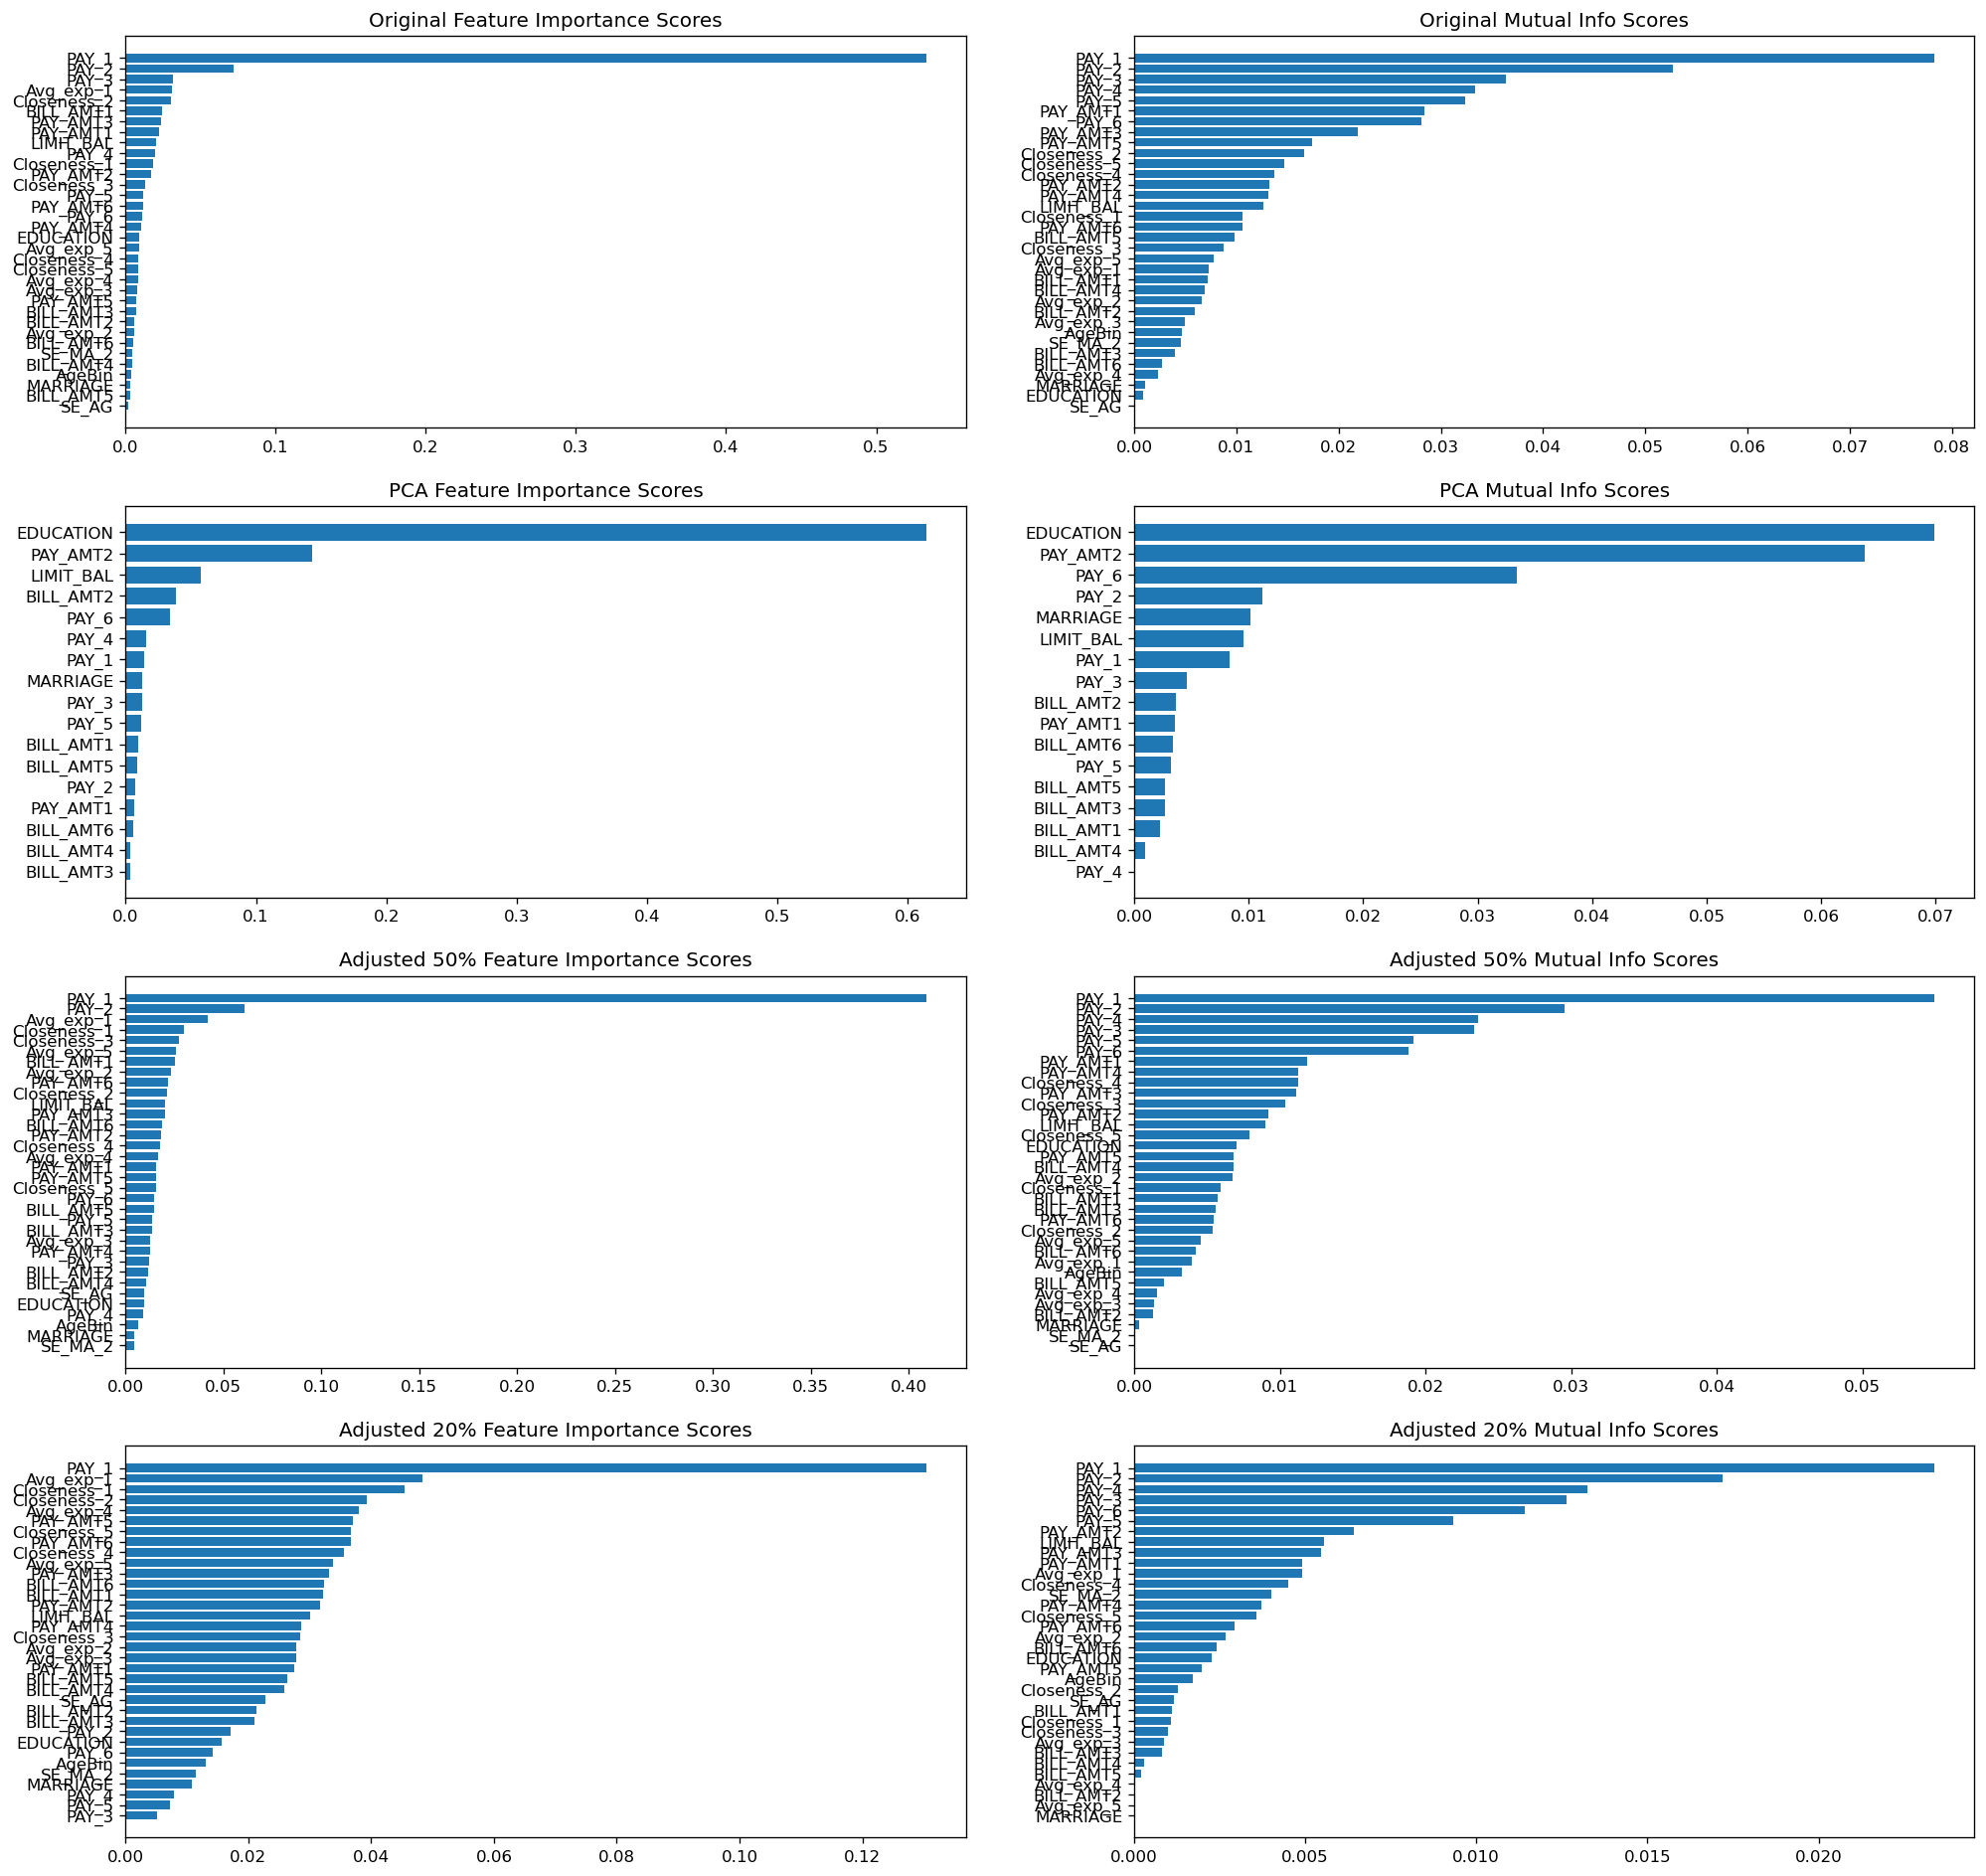

In [137]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

In [73]:
X_dt = X_test.copy()
y_dt = (pd.DataFrame(predictions, columns = ['def_pay'])).copy()
dt = X_dt.join(y_dt)
dt['def_pay'] = dt['def_pay'].fillna(0)
dt

LIMIT_BAL  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
2308     30000.0          2         2      0      0      0      0      0   
22404   150000.0          1         2      0      0      0      0      0   
23397    70000.0          3         1      0      0      0      0      0   
25058   130000.0          3         2      0      0      0      0      0   
2664     50000.0          2         2      0      0      0      0      0   
...          ...        ...       ...    ...    ...    ...    ...    ...   
2210    360000.0          1         2      1      0      0      0      0   
14144   500000.0          1         2      2      0      0      2      0   
23108    60000.0          1         1      0      0      0      0      0   
25703    20000.0          1         2      1      0      0      0      0   
29171   510000.0          3         1      0      0      0      2      0   

       PAY_6  BILL_AMT1  ...  Avg_exp_4  Avg_exp_3  Avg_exp_2  Avg_exp_1  \
2308       0     8864.0  ...   0.012533   0.013922   0.014450   0.013573   
22404      0   136736.0  ...   0.098777   0.106438   0.101832   0.102227   
23397      0    70122.0  ...   0.031993   0.029790   0.035421   0.038260   
25058      0    20678.0  ...   0.065354   0.059692   0.053600   0.048006   
2664       2    94228.0  ...   0.019350   0.171480   0.162480   0.324356   
...      ...        ...  ...        ...        ...        ...        ...   
2210       0        0.0  ...   0.001765   0.001945   0.001459   0.001167   
14144      0    98541.0  ...   0.005158   0.025852   0.021146   0.017912   
23108      2    46233.0  ...   0.015200   0.014639   0.015425   0.015907   
25703      0        0.0  ...   0.049100   0.098950   0.105387   0.084310   
29171      0   187070.0  ...   0.014911   0.017197   0.015755   0.018031   

       Closeness_5  Closeness_4  Closeness_3  Closeness_2  Closeness_1  \
2308      0.542800     0.580667     0.613967     0.664600     0.704533   
22404     0.481727     0.322793     0.222107     0.162327     0.088427   
23397    -0.001586     0.003529     0.021000     0.013143    -0.001743   
25058     0.913569     0.870015     0.875600     0.854185     0.840938   
2664      0.594100     0.608520     0.152780     0.047300    -0.884560   
...            ...          ...          ...          ...          ...   
2210      0.996469     1.000000     0.997694     1.000000     1.000000   
14144     0.843248     0.843860     0.776620     0.795896     0.802918   
23108     0.132583     0.160250     0.188400     0.212283     0.229450   
25703     0.970000     0.931800     0.801650     0.875300     1.000000   
29171     0.650629     0.643527     0.621759     0.643661     0.633196   

       def_pay  
2308       0.0  
22404      0.0  
23397      0.0  
25058      0.0  
2664       0.0  
...        ...  
2210       0.0  
14144      0.0  
23108      0.0  
25703      0.0  
29171      0.0  

[6000 rows x 35 columns]

In [74]:
dt_1 = dt[dt['def_pay'] == 1.0]
dt_1.describe()

LIMIT_BAL   EDUCATION    MARRIAGE       PAY_1       PAY_2  \
count     157.000000  157.000000  157.000000  157.000000  157.000000   
mean   147643.312102    1.751592    1.630573    0.407643    0.312102   
std    132689.825936    0.703982    0.484194    0.800284    0.766724   
min     10000.000000    1.000000    1.000000    0.000000    0.000000   
25%     50000.000000    1.000000    1.000000    0.000000    0.000000   
50%    100000.000000    2.000000    2.000000    0.000000    0.000000   
75%    200000.000000    2.000000    2.000000    1.000000    0.000000   
max    710000.000000    4.000000    2.000000    4.000000    3.000000   

            PAY_3       PAY_4       PAY_5       PAY_6      BILL_AMT1  ...  \
count  157.000000  157.000000  157.000000  157.000000     157.000000  ...   
mean     0.273885    0.184713    0.273885    0.318471   46240.777070  ...   
std      0.836748    0.749544    0.836748    0.884614   62025.024794  ...   
min      0.000000    0.000000    0.000000    0.000000   -2000.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    3114.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000   24114.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000   67670.000000  ...   
max      7.000000    7.000000    7.000000    7.000000  440474.000000  ...   

        Avg_exp_4   Avg_exp_3   Avg_exp_2   Avg_exp_1  Closeness_5  \
count  157.000000  157.000000  157.000000  157.000000   157.000000   
mean     0.064433    0.069701    0.069315    0.065437     0.588084   
std      0.108939    0.115913    0.097351    0.084089     0.372884   
min      0.000000    0.000000    0.000000    0.000000    -0.023450   
25%      0.005604    0.006853    0.008354    0.008474     0.239250   
50%      0.018711    0.026807    0.034546    0.037439     0.666520   
75%      0.069617    0.080394    0.089036    0.083246     0.991142   
max      0.535933    0.895267    0.675412    0.556900     1.011715   

       Closeness_4  Closeness_3  Closeness_2  Closeness_1  def_pay  
count   157.000000   157.000000   157.000000   157.000000    157.0  
mean      0.580754     0.535335     0.499923     0.502992      1.0  
std       0.372300     0.453921     0.454746     0.460704      0.0  
min      -0.035733    -2.476050    -2.362950    -2.329950      1.0  
25%       0.234405     0.189533     0.140200     0.105100      1.0  
50%       0.672193     0.535800     0.449190     0.457980      1.0  
75%       0.980406     0.977867     0.972222     0.972222      1.0  
max       1.011715     1.011715     1.004857     1.020000      1.0  

[8 rows x 35 columns]

In [75]:
dt_0 = dt[dt['def_pay'] == 0.0]
dt_0.describe()

LIMIT_BAL    EDUCATION     MARRIAGE        PAY_1        PAY_2  \
count    5843.000000  5843.000000  5843.000000  5843.000000  5843.000000   
mean   169075.817217     1.842718     1.556221     0.352045     0.314907   
std    129690.998610     0.740853     0.519111     0.746422     0.794169   
min     10000.000000     1.000000     1.000000     0.000000     0.000000   
25%     50000.000000     1.000000     1.000000     0.000000     0.000000   
50%    140000.000000     2.000000     2.000000     0.000000     0.000000   
75%    240000.000000     2.000000     2.000000     0.000000     0.000000   
max    800000.000000     4.000000     3.000000     8.000000     7.000000   

             PAY_3        PAY_4        PAY_5        PAY_6      BILL_AMT1  ...  \
count  5843.000000  5843.000000  5843.000000  5843.000000    5843.000000  ...   
mean      0.314564     0.261509     0.219750     0.215129   52572.459867  ...   
std       0.810306     0.769855     0.717302     0.698777   74868.345084  ...   
min       0.000000     0.000000     0.000000     0.000000  -14386.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000    3726.500000  ...   
50%       0.000000     0.000000     0.000000     0.000000   22658.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000   69986.500000  ...   
max       8.000000     7.000000     7.000000     7.000000  653062.000000  ...   

         Avg_exp_4    Avg_exp_3    Avg_exp_2    Avg_exp_1  Closeness_5  \
count  5843.000000  5843.000000  5843.000000  5843.000000  5843.000000   
mean      0.056439     0.061152     0.061293     0.060749     0.668623   
std       0.102985     0.090359     0.079876     0.073921     0.345784   
min      -0.478475    -0.308550    -0.224100    -0.173410    -1.095400   
25%       0.006101     0.007999     0.009627     0.010592     0.401970   
50%       0.018720     0.023987     0.028201     0.031307     0.783900   
75%       0.055661     0.075629     0.084419     0.087455     0.989701   
max       1.562500     1.054667     0.827875     0.717800     1.876743   

       Closeness_4  Closeness_3  Closeness_2  Closeness_1  def_pay  
count  5843.000000  5843.000000  5843.000000  5843.000000   5843.0  
mean      0.640223     0.607877     0.589761     0.576635      0.0  
std       0.363988     0.389033     0.397696     0.404857      0.0  
min      -1.127690    -2.384340    -2.341720    -2.257300      0.0  
25%       0.336148     0.249312     0.195278     0.165365      0.0  
50%       0.751284     0.722200     0.703433     0.685908      0.0  
75%       0.986462     0.985489     0.982223     0.977602      0.0  
max       1.106700     1.119250     1.067715     1.071930      0.0  

[8 rows x 35 columns]

## 6.5 XGB

### 6.5.1 Blind Run

In [141]:
#create the classifier
xgb_classifier = XGBClassifier(use_label_encoder =False, eval_metric='mlogloss')

# Original Dataset
clf_og = xgb_classifier.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

# PCA (Original Dataset)
clf_PCA = xgb_classifier.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

# Adjusted Dataset(50%)
clf_5 = xgb_classifier.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

# Adjusted Dataset(20%)
clf_2 = xgb_classifier.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)


In [139]:
pd.DataFrame(np.array([[acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Accuracy  F1 Score     TP      TN     FP     FN
Original Dataset        0.815500  0.465476  482.0  4411.0  276.0  831.0
PCA (Original Dataset)  0.809667  0.441292  451.0  4407.0  280.0  862.0
Adjusted Dataset(50%)   0.883642  0.334405  156.0  4560.0  128.0  493.0
Adjusted Dataset(20%)   0.943713  0.136646   22.0  4639.0   36.0  242.0

### 6.5.1 Cross Validating

In [143]:
###### Original Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    xgb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = xgb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_og = pd.DataFrame({'Score':scr,'Fold':fold})

In [144]:
###### PCA Dataset ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_PCA)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    xgb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = xgb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_PCA = pd.DataFrame({'Score':scr,'Fold':fold})

In [145]:
###### Adjusted Dataset 50% ######
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj5)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    xgb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = xgb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_5 = pd.DataFrame({'Score':scr,'Fold':fold})

In [146]:
##### Adjusted Dataset 20% #####
kf = KFold(n_splits=5,random_state=42,shuffle=True)

fold = []
scr = []

for i,(train_index, test_index) in enumerate(kf.split(df_adj2)):
    training = df.iloc[train_index,:]
    valid = df.iloc[test_index,:]
    feats = training[features] #defined above
    label = training['def_pay']
    valid_feats = valid[features]
    valid_label = valid['def_pay']
    xgb_classifier.fit(feats,label) #it is the last one we run, the best one
    pred = xgb_classifier.predict(valid_feats)
    score = accuracy_score(y_true = valid_label, y_pred = pred)
    fold.append(i+1)
    scr.append(score)
    
#create a small df with the scores
performance_2 = pd.DataFrame({'Score':scr,'Fold':fold})

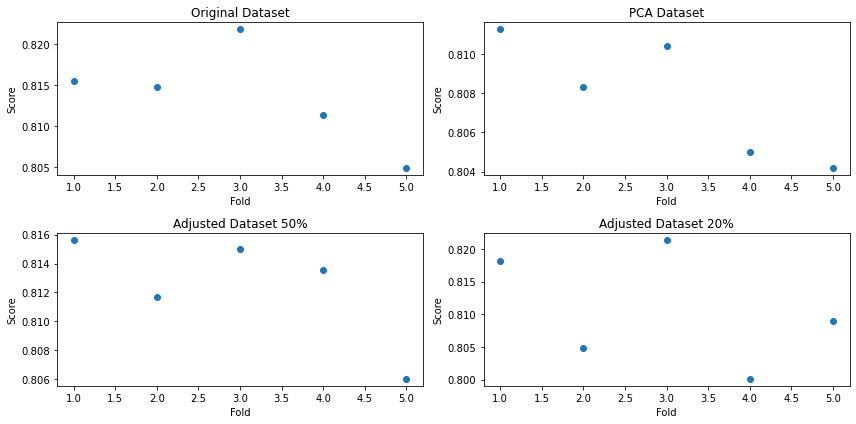

In [147]:
fig, axs = plt.subplots(2,2)
axs[0,0].scatter(performance_og['Fold'], performance_og['Score'])
axs[0,0].set_title("Original Dataset")
axs[0,1].scatter(performance_PCA['Fold'], performance_PCA['Score'])
axs[0,1].set_title("PCA Dataset")
axs[1,0].scatter(performance_5['Fold'], performance_5['Score'])
axs[1,0].set_title("Adjusted Dataset 50%")
axs[1,1].scatter(performance_2['Fold'], performance_2['Score'])
axs[1,1].set_title("Adjusted Dataset 20%")


for ax in axs.flat:
    ax.set(xlabel = 'Fold', ylabel = 'Score')
    
fig.tight_layout()
plt.show()

### 6.5.3 GridSearch using Accuracy

In [150]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.4s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.4s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.5s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.5s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.5s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.6s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.5s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.8s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.7s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.5s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.4s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.6s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.5s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.6s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.7s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.7s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   2.6s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.8s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.9s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.8s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.9s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   3.1s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   3.0s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.8s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.8s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.8s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   4.2s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   4.1s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   4.0s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [151]:
###### PCA DATASET #######
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(), param_grid, cv = 5,
                         scoring= 'accuracy')
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

[18:49:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:49:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:50:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:50:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:51:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:52:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:53:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:53:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:53:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:54:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:54:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:55:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:56:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:56:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:58:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[18:59:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:59:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:59:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:59:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [152]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   3.0s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   3.0s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.9s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.7s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.5s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.6s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   4.7s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   4.5s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   4.6s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   5.6s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   5.1s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   4.9s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   3.3s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   3.2s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   3.3s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   3.3s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   3.1s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   3.1s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   4.0s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   4.1s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   4.5s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   4.3s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   4.8s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   4.5s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [153]:
###### ADJUSTED DATASET 20% #######
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'accuracy', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   3.4s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   3.0s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   3.1s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   3.0s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   3.1s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.7s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.6s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.7s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.5s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.6s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.6s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.3s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.3s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.3s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.3s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.3s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   2.2s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.3s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.5s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.4s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.5s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.4s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.5s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.6s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.8s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.6s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.7s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   2.8s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   2.8s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [154]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        XGBClassifier(base_score=0.5, booster='gbtree'...   
PCA (Original Dataset)  XGBClassifier(base_score=0.5, booster='gbtree'...   
Adjusted Dataset(50%)   XGBClassifier(base_score=0.5, booster='gbtree'...   
Adjusted Dataset(20%)   XGBClassifier(base_score=0.5, booster='gbtree'...   

                        Accuracy  F1 Score   TP    TN   FP   FN  
Original Dataset        0.817667  0.457879  462  4444  243  851  
PCA (Original Dataset)  0.808167  0.428784  432  4417  270  881  
Adjusted Dataset(50%)   0.887203  0.326622  146  4589   99  503  
Adjusted Dataset(20%)   0.944321  0.098361   15  4649   26  249

#### Checking Feature Importance & Mutual Info

In [155]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [156]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

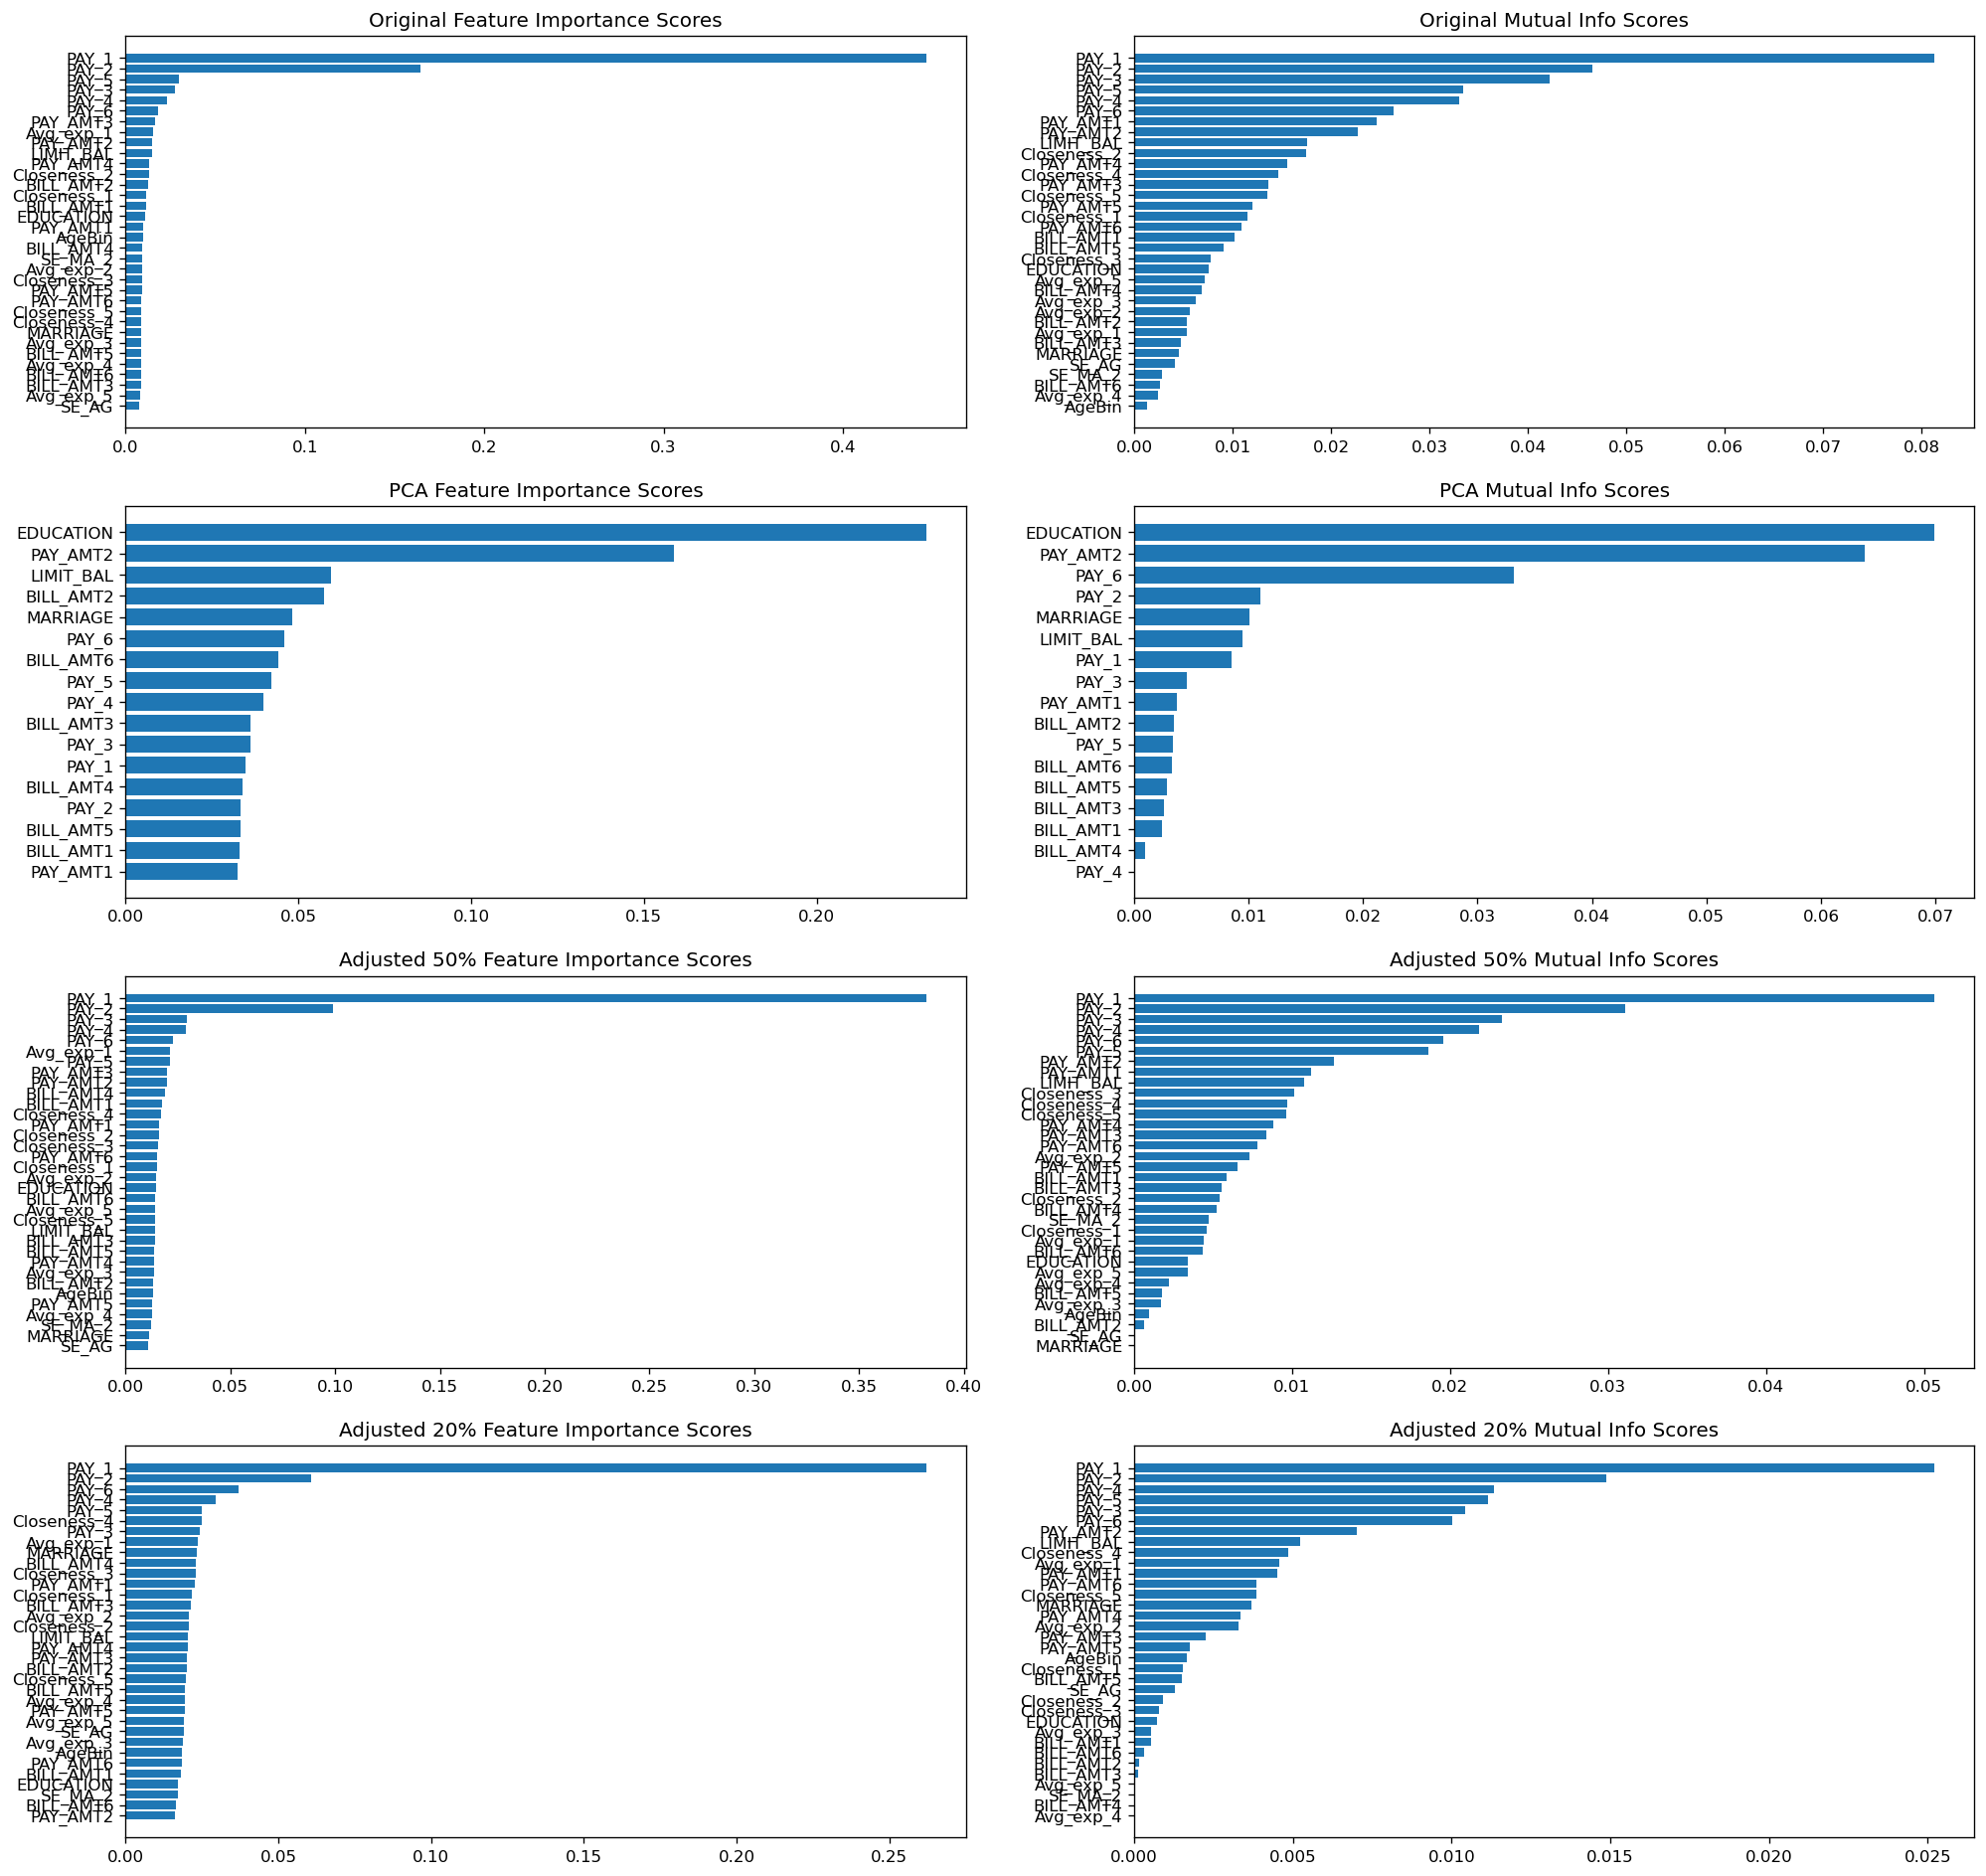

In [157]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

### 6.5.4 GridSearch using F1 Score

In [158]:
###### ORIGINAL DATASET #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train, y_train)
#let's see the best estimator
best_og = grid_tree.best_estimator_
clf_og = best_og
clf_og.fit(X_train, y_train)
pred_og = clf_og.predict(X_test)
acc_clf_og = accuracy_score(y_true = y_test, y_pred = pred_og)
f1_clf_og = f1_score(y_true = y_test, y_pred = pred_og)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.7s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.7s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.3s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.9s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.9s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.4s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.4s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.4s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.4s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.6s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.5s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   3.3s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   3.2s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.9s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.9s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   3.1s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   2.1s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.8s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.8s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.7s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   3.1s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.9s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.7s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.4s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.5s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.6s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.7s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   3.5s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   3.6s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [159]:
###### PCA DATASET #######
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_PCA, y_train)
#let's see the best estimator
best_PCA = grid_tree.best_estimator_
clf_PCA = best_PCA
clf_PCA.fit(X_train_PCA, y_train)
pred_PCA = clf_PCA.predict(X_test_PCA)
acc_clf_PCA = accuracy_score(y_true = y_test, y_pred = pred_PCA)
f1_clf_PCA = f1_score(y_true = y_test, y_pred = pred_PCA)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.4s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.4s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.3s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   2.3s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.2s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.2s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   2.3s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.7s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.6s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.6s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.6s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   2.6s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   2.6s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.5s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   2.6s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.6s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.6s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.5s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.5s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.1s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.2s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.2s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   3.3s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   3.3s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   3.3s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [142]:
###### ADJUSTED DATASET 50% #######
# define the parameters grid with 'accuracy' scoring
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj5, y_train_adj5)
#let's see the best estimator
best_5 = grid_tree.best_estimator_
clf_adj5 = best_5
clf_adj5.fit(X_train_adj5, y_train_adj5)
pred_5 = clf_adj5.predict(X_test_adj5)
acc_clf_5 = accuracy_score(y_true = y_test_adj5, y_pred = pred_5)
f1_clf_5 = f1_score(y_true = y_test_adj5, y_pred = pred_5)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   2.1s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.2s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.3s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.3s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.5s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.8s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.5s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.5s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.5s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.4s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.5s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   1.8s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.8s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.9s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.7s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.7s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.7s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.7s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.2s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.2s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.2s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.2s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   2.4s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   2.3s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [143]:
X_set = X_test_adj5.copy()
y_set = (pd.DataFrame(pred_5, columns = ['def_pay'])).copy()
set = X_set.join(y_set)
set['def_pay'] = set['def_pay'].fillna(0)

In [144]:
set_1 = set[set['PAY_1'] == 1.0]
pd.DataFrame(set_1['PAY_1'].describe())

PAY_1
count  631.0
mean     1.0
std      0.0
min      1.0
25%      1.0
50%      1.0
75%      1.0
max      1.0

In [145]:
set_0 = set[set['PAY_1'] == 0.0]
pd.DataFrame(set_0['PAY_1'].describe())

PAY_1
count  4299.0
mean      0.0
std       0.0
min       0.0
25%       0.0
50%       0.0
75%       0.0
max       0.0

In [161]:
###### ADJUSTED DATASET 20% #######
param_grid = {'min_child_weight': [1, 5, 10],
            'gamma': [0.5, 1, 1.5, 2, 5],
            'colsample_bytree': [0.6, 0.8, 1.0]}
# create the grid
grid_tree = GridSearchCV(XGBClassifier(eval_metric='mlogloss'), param_grid, cv = 5,
                         scoring= 'f1', verbose = 10)
#training
grid_tree.fit(X_train_adj2, y_train_adj2)
#let's see the best estimator
best_2 = grid_tree.best_estimator_
clf_adj2 = best_2
clf_adj2.fit(X_train_adj2, y_train_adj2)
pred_2 = clf_adj2.predict(X_test_adj2)
acc_clf_2 = accuracy_score(y_true = y_test_adj2, y_pred = pred_2)
f1_clf_2 = f1_score(y_true = y_test_adj2, y_pred = pred_2)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[CV 1/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 1/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.6s
[CV 2/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 2/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.8s
[CV 3/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 3/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.8s
[CV 4/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 4/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.6s
[CV 5/5; 1/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=1........
[CV 5/5; 1/45] END colsample_bytree=0.6, gamma=0.5, min_child_weight=1; total time=   1.7s
[CV 1/5; 2/45] START colsample_bytree=0.6, gamma=0.5, min_child_weight=5......

[CV 3/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.5s
[CV 4/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 4/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.4s
[CV 5/5; 10/45] START colsample_bytree=0.6, gamma=2, min_child_weight=1.........
[CV 5/5; 10/45] END colsample_bytree=0.6, gamma=2, min_child_weight=1; total time=   1.6s
[CV 1/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 1/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.4s
[CV 2/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 2/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.4s
[CV 3/5; 11/45] START colsample_bytree=0.6, gamma=2, min_child_weight=5.........
[CV 3/5; 11/45] END colsample_bytree=0.6, gamma=2, min_child_weight=5; total time=   1.3s
[CV 4/5; 11/45] START colsample_bytree=0.6, gamma=2, mi

[CV 1/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.7s
[CV 2/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 2/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 3/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 3/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.7s
[CV 4/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 4/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.7s
[CV 5/5; 20/45] START colsample_bytree=0.8, gamma=1, min_child_weight=5.........
[CV 5/5; 20/45] END colsample_bytree=0.8, gamma=1, min_child_weight=5; total time=   1.8s
[CV 1/5; 21/45] START colsample_bytree=0.8, gamma=1, min_child_weight=10........
[CV 1/5; 21/45] END colsample_bytree=0.8, gamma=1, min_child_weight=10; total time=   1.7s
[CV 2/5; 21/45] START colsample_bytree=0.8, gamma=1, m

[CV 4/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.7s
[CV 5/5; 29/45] START colsample_bytree=0.8, gamma=5, min_child_weight=5.........
[CV 5/5; 29/45] END colsample_bytree=0.8, gamma=5, min_child_weight=5; total time=   1.9s
[CV 1/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 1/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.9s
[CV 2/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 2/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   2.0s
[CV 3/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 3/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.6s
[CV 4/5; 30/45] START colsample_bytree=0.8, gamma=5, min_child_weight=10........
[CV 4/5; 30/45] END colsample_bytree=0.8, gamma=5, min_child_weight=10; total time=   1.8s
[CV 5/5; 30/45] START colsample_bytree=0.8, gamma=5

[CV 2/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.4s
[CV 3/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 3/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.1s
[CV 4/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 4/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.1s
[CV 5/5; 39/45] START colsample_bytree=1.0, gamma=1.5, min_child_weight=10......
[CV 5/5; 39/45] END colsample_bytree=1.0, gamma=1.5, min_child_weight=10; total time=   2.0s
[CV 1/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 1/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   2.1s
[CV 2/5; 40/45] START colsample_bytree=1.0, gamma=2, min_child_weight=1.........
[CV 2/5; 40/45] END colsample_bytree=1.0, gamma=2, min_child_weight=1; total time=   2.2s
[CV 3/5; 40/45] START colsample_bytree=1.0,

In [162]:
pd.DataFrame(np.array([[best_og, acc_clf_og, f1_clf_og, np.sum(np.logical_and(pred_og == 1, y_test == 1)), np.sum(np.logical_and(pred_og == 0, y_test == 0)), np.sum(np.logical_and(pred_og == 1, y_test == 0)), np.sum(np.logical_and(pred_og == 0, y_test == 1))],
                       [best_PCA, acc_clf_PCA, f1_clf_PCA, np.sum(np.logical_and(pred_PCA == 1, y_test == 1)), np.sum(np.logical_and(pred_PCA == 0, y_test == 0)), np.sum(np.logical_and(pred_PCA == 1, y_test == 0)), np.sum(np.logical_and(pred_PCA == 0, y_test == 1))],
                       [best_5, acc_clf_5, f1_clf_5, np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 1)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 1, y_test_adj5 == 0)), np.sum(np.logical_and(pred_5 == 0, y_test_adj5 == 1))],
                       [best_2, acc_clf_2, f1_clf_2, np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 1)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 1, y_test_adj2 == 0)), np.sum(np.logical_and(pred_2 == 0, y_test_adj2 == 1))]]),
             index = ['Original Dataset', 'PCA (Original Dataset)', 'Adjusted Dataset(50%)', 'Adjusted Dataset(20%)'],
             columns = ['Best Estimator', 'Accuracy', 'F1 Score', 'TP', 'TN', 'FP', 'FN'])

Best Estimator  \
Original Dataset        XGBClassifier(base_score=0.5, booster='gbtree'...   
PCA (Original Dataset)  XGBClassifier(base_score=0.5, booster='gbtree'...   
Adjusted Dataset(50%)   XGBClassifier(base_score=0.5, booster='gbtree'...   
Adjusted Dataset(20%)   XGBClassifier(base_score=0.5, booster='gbtree'...   

                        Accuracy  F1 Score   TP    TN   FP   FN  
Original Dataset        0.817667  0.457879  462  4444  243  851  
PCA (Original Dataset)  0.812667  0.444115  449  4427  260  864  
Adjusted Dataset(50%)   0.887015  0.349515  162  4572  116  487  
Adjusted Dataset(20%)   0.945131  0.181269   30  4638   37  234

#### Checking Feature Importance & Mutual Info

In [163]:
# Original Dataset
fi_og = pd.Series(clf_og.feature_importances_, index = X_train.columns).sort_values(ascending = False)
# PCA Dataset
fi_pca = pd.Series(clf_PCA.feature_importances_, index = X_train_PCA.columns).sort_values(ascending = False)
fi_adj5 = pd.Series(clf_adj5.feature_importances_, index = X_train_adj5.columns).sort_values(ascending = False)
fi_adj2 = pd.Series(clf_adj2.feature_importances_, index = X_train_adj2.columns).sort_values(ascending = False)

In [164]:
# Original Dataset
mi_og = mutual_info_classif(X_train, y_train, discrete_features=X_train.dtypes == int)
mi_og = pd.Series(mi_og, name='MI Scores', index=X_train.columns).sort_values(ascending = False)
# PCA Dataset
mi_pca = mutual_info_classif(X_train_PCA, y_train, discrete_features=X_train_PCA.dtypes == int)
mi_pca = pd.Series(mi_pca, name='MI Scores', index=X_train_PCA.columns).sort_values(ascending = False)
# Adjusted Dataset 50%
mi_adj5 = mutual_info_classif(X_train_adj5, y_train_adj5, discrete_features=X_train_adj5.dtypes == int)
mi_adj5 = pd.Series(mi_adj5, name='MI Scores', index=X_train_adj5.columns).sort_values(ascending = False)
# Adjusted Dataset 20%
mi_adj2 = mutual_info_classif(X_train_adj2, y_train_adj2, discrete_features=X_train_adj2.dtypes == int)
mi_adj2 = pd.Series(mi_adj2, name='MI Scores', index=X_train_adj2.columns).sort_values(ascending = False)

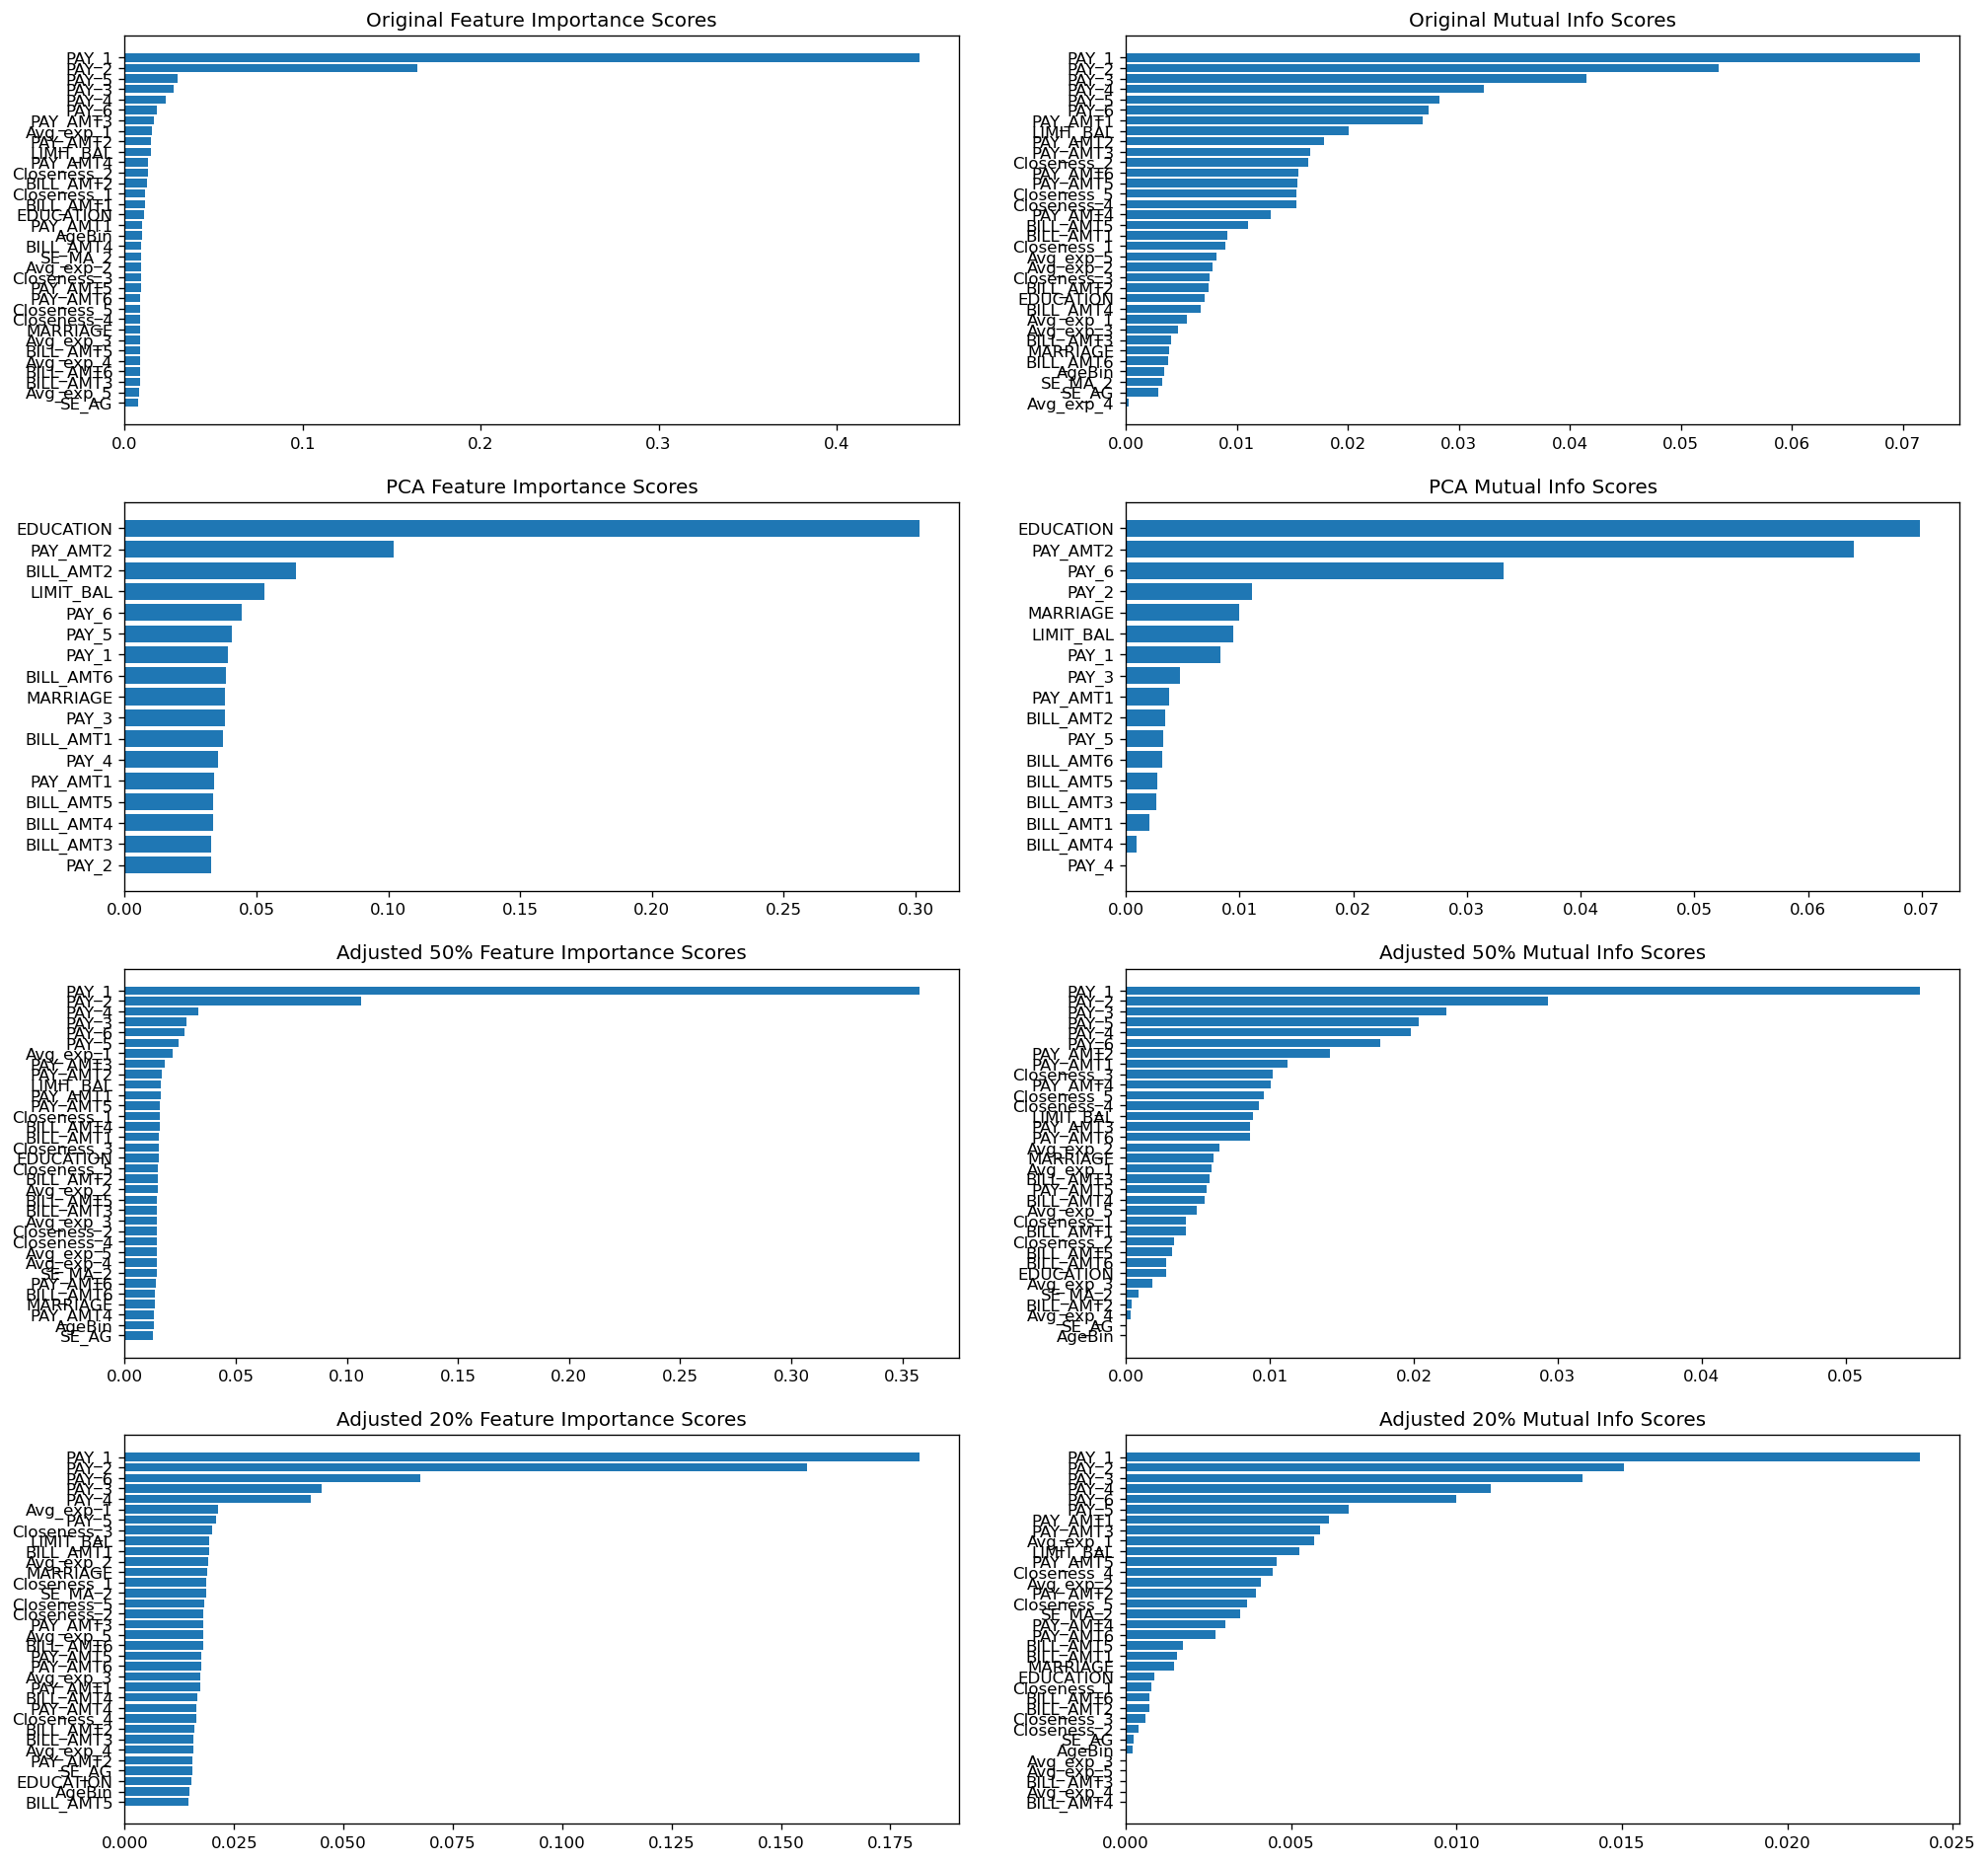

In [165]:
#plt.subplots(2,2,figsize = (40,40), dpi = 100)
figure(figsize=(20,20), dpi = 120)

plt.subplot(4,2,1)
plt.title("Original Feature Importance Scores")
plot_scores(fi_og)

plt.subplot(4,2,2)
plt.title("Original Mutual Info Scores")
plot_scores(mi_og)

plt.subplot(4,2,3)
plt.title("PCA Feature Importance Scores")
plot_scores(fi_pca)

plt.subplot(4,2,4)
plt.title("PCA Mutual Info Scores")
plot_scores(mi_pca)

plt.subplot(4,2,5)
plt.title("Adjusted 50% Feature Importance Scores")
plot_scores(fi_adj5)

plt.subplot(4,2,6)
plt.title("Adjusted 50% Mutual Info Scores")
plot_scores(mi_adj5)

plt.subplot(4,2,7)
plt.title("Adjusted 20% Feature Importance Scores")
plot_scores(fi_adj2)

plt.subplot(4,2,8)
plt.title("Adjusted 20% Mutual Info Scores")
plot_scores(mi_adj2)   

plt.show()

In [79]:
X_dt = X_test.copy()
y_dt = (pd.DataFrame(predictions, columns = ['def_pay'])).copy()
dt = X_dt.join(y_dt)
dt['def_pay'] = dt['def_pay'].fillna(0)
dt

LIMIT_BAL  EDUCATION  MARRIAGE  PAY_1  PAY_2  PAY_3  PAY_4  PAY_5  \
2308     30000.0          2         2      0      0      0      0      0   
22404   150000.0          1         2      0      0      0      0      0   
23397    70000.0          3         1      0      0      0      0      0   
25058   130000.0          3         2      0      0      0      0      0   
2664     50000.0          2         2      0      0      0      0      0   
...          ...        ...       ...    ...    ...    ...    ...    ...   
2210    360000.0          1         2      1      0      0      0      0   
14144   500000.0          1         2      2      0      0      2      0   
23108    60000.0          1         1      0      0      0      0      0   
25703    20000.0          1         2      1      0      0      0      0   
29171   510000.0          3         1      0      0      0      2      0   

       PAY_6  BILL_AMT1  ...  Avg_exp_4  Avg_exp_3  Avg_exp_2  Avg_exp_1  \
2308       0     8864.0  ...   0.012533   0.013922   0.014450   0.013573   
22404      0   136736.0  ...   0.098777   0.106438   0.101832   0.102227   
23397      0    70122.0  ...   0.031993   0.029790   0.035421   0.038260   
25058      0    20678.0  ...   0.065354   0.059692   0.053600   0.048006   
2664       2    94228.0  ...   0.019350   0.171480   0.162480   0.324356   
...      ...        ...  ...        ...        ...        ...        ...   
2210       0        0.0  ...   0.001765   0.001945   0.001459   0.001167   
14144      0    98541.0  ...   0.005158   0.025852   0.021146   0.017912   
23108      2    46233.0  ...   0.015200   0.014639   0.015425   0.015907   
25703      0        0.0  ...   0.049100   0.098950   0.105387   0.084310   
29171      0   187070.0  ...   0.014911   0.017197   0.015755   0.018031   

       Closeness_5  Closeness_4  Closeness_3  Closeness_2  Closeness_1  \
2308      0.542800     0.580667     0.613967     0.664600     0.704533   
22404     0.481727     0.322793     0.222107     0.162327     0.088427   
23397    -0.001586     0.003529     0.021000     0.013143    -0.001743   
25058     0.913569     0.870015     0.875600     0.854185     0.840938   
2664      0.594100     0.608520     0.152780     0.047300    -0.884560   
...            ...          ...          ...          ...          ...   
2210      0.996469     1.000000     0.997694     1.000000     1.000000   
14144     0.843248     0.843860     0.776620     0.795896     0.802918   
23108     0.132583     0.160250     0.188400     0.212283     0.229450   
25703     0.970000     0.931800     0.801650     0.875300     1.000000   
29171     0.650629     0.643527     0.621759     0.643661     0.633196   

       def_pay  
2308       0.0  
22404      0.0  
23397      0.0  
25058      0.0  
2664       0.0  
...        ...  
2210       0.0  
14144      0.0  
23108      0.0  
25703      0.0  
29171      0.0  

[6000 rows x 35 columns]

In [81]:
dt_1 = dt[dt['def_pay'] == 1.0]
dt_1.describe()

LIMIT_BAL   EDUCATION    MARRIAGE       PAY_1       PAY_2  \
count     141.000000  141.000000  141.000000  141.000000  141.000000   
mean   152269.503546    1.687943    1.673759    0.382979    0.340426   
std    125387.221919    0.698312    0.470508    0.743155    0.782211   
min     10000.000000    1.000000    1.000000    0.000000    0.000000   
25%     50000.000000    1.000000    1.000000    0.000000    0.000000   
50%    130000.000000    2.000000    2.000000    0.000000    0.000000   
75%    200000.000000    2.000000    2.000000    1.000000    0.000000   
max    500000.000000    4.000000    2.000000    4.000000    3.000000   

            PAY_3       PAY_4       PAY_5       PAY_6      BILL_AMT1  ...  \
count  141.000000  141.000000  141.000000  141.000000     141.000000  ...   
mean     0.290780    0.177305    0.248227    0.304965   40058.078014  ...   
std      0.866347    0.758605    0.829423    0.877849   50334.899798  ...   
min      0.000000    0.000000    0.000000    0.000000   -2000.000000  ...   
25%      0.000000    0.000000    0.000000    0.000000    2500.000000  ...   
50%      0.000000    0.000000    0.000000    0.000000   19911.000000  ...   
75%      0.000000    0.000000    0.000000    0.000000   57693.000000  ...   
max      7.000000    7.000000    7.000000    7.000000  251486.000000  ...   

        Avg_exp_4   Avg_exp_3   Avg_exp_2   Avg_exp_1  Closeness_5  \
count  141.000000  141.000000  141.000000  141.000000   141.000000   
mean     0.060501    0.067346    0.065240    0.061257     0.619511   
std      0.096866    0.111710    0.092197    0.078334     0.370974   
min      0.000000    0.000000    0.000000    0.000000    -0.023450   
25%      0.005320    0.005564    0.006710    0.007734     0.301850   
50%      0.022160    0.026807    0.027925    0.032077     0.728880   
75%      0.058476    0.083949    0.089036    0.084293     0.994760   
max      0.529220    0.895267    0.675412    0.556900     1.011715   

       Closeness_4  Closeness_3  Closeness_2  Closeness_1  def_pay  
count   141.000000   141.000000   141.000000   141.000000    141.0  
mean      0.604773     0.558139     0.533884     0.541141      1.0  
std       0.374641     0.466399     0.467393     0.467808      0.0  
min      -0.035733    -2.476050    -2.362950    -2.329950      1.0  
25%       0.256900     0.203183     0.153050     0.158300      1.0  
50%       0.710013     0.701050     0.573470     0.591900      1.0  
75%       0.990411     0.987957     0.989862     0.982912      1.0  
max       1.011715     1.011715     1.004857     1.020000      1.0  

[8 rows x 35 columns]

In [82]:
dt_0 = dt[dt['def_pay'] == 0.0]
dt_0.describe()

LIMIT_BAL    EDUCATION     MARRIAGE        PAY_1        PAY_2  \
count    5859.000000  5859.000000  5859.000000  5859.000000  5859.000000   
mean   168905.956648     1.844001     1.555385     0.352791     0.314217   
std    129893.913159     0.740643     0.519142     0.748024     0.793724   
min     10000.000000     1.000000     1.000000     0.000000     0.000000   
25%     50000.000000     1.000000     1.000000     0.000000     0.000000   
50%    140000.000000     2.000000     2.000000     0.000000     0.000000   
75%    240000.000000     2.000000     2.000000     0.000000     0.000000   
max    800000.000000     4.000000     3.000000     8.000000     7.000000   

             PAY_3        PAY_4        PAY_5        PAY_6      BILL_AMT1  ...  \
count  5859.000000  5859.000000  5859.000000  5859.000000    5859.000000  ...   
mean      0.314047     0.261478     0.220515     0.215736   52703.959037  ...   
std       0.809654     0.769579     0.717899     0.699621   75027.634386  ...   
min       0.000000     0.000000     0.000000     0.000000  -14386.000000  ...   
25%       0.000000     0.000000     0.000000     0.000000    3751.500000  ...   
50%       0.000000     0.000000     0.000000     0.000000   22821.000000  ...   
75%       0.000000     0.000000     0.000000     0.000000   70272.500000  ...   
max       8.000000     7.000000     7.000000     7.000000  653062.000000  ...   

         Avg_exp_4    Avg_exp_3    Avg_exp_2    Avg_exp_1  Closeness_5  \
count  5859.000000  5859.000000  5859.000000  5859.000000  5859.000000   
mean      0.056555     0.061233     0.061413     0.060863     0.667646   
std       0.103296     0.090571     0.080083     0.074105     0.346076   
min      -0.478475    -0.308550    -0.224100    -0.173410    -1.095400   
25%       0.006118     0.008006     0.009676     0.010613     0.400607   
50%       0.018667     0.023989     0.028399     0.031467     0.782500   
75%       0.055661     0.075364     0.084419     0.087414     0.989569   
max       1.562500     1.054667     0.827875     0.717800     1.876743   

       Closeness_4  Closeness_3  Closeness_2  Closeness_1  def_pay  
count  5859.000000  5859.000000  5859.000000  5859.000000   5859.0  
mean      0.639483     0.607130     0.588698     0.575515      0.0  
std       0.364042     0.388976     0.397689     0.404966      0.0  
min      -1.127690    -2.384340    -2.341720    -2.257300      0.0  
25%       0.333917     0.248105     0.193333     0.163225      0.0  
50%       0.750000     0.720820     0.700860     0.683900      0.0  
75%       0.986207     0.985204     0.981881     0.977394      0.0  
max       1.106700     1.119250     1.067715     1.071930      0.0  

[8 rows x 35 columns]